In [5]:
import cv2
import numpy as np
import os
import pytesseract
import re
image_frames = 'image_frames/'
pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract-OCR\tesseract.exe'
from PIL import Image
import time

## Below is the safe working code of frame extraction

In [4]:
# import cv2
# st = time.time()
# # Open the video file
# video_file = 'meeting sample.mp4'  # Replace with the path to your video file
# cap = cv2.VideoCapture(video_file)

# if not cap.isOpened():
#     print("Error: Could not open video file.")
#     exit()

    
# frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate (frames per second)
# frame_interval = int(frame_rate)

# # frame_rate = cap.get(5)  # Get the frame rate (frames per second)
# print(frame_rate)
# # frame_interval = int(1 / frame_rate)
# print(frame_interval)

# frame_count = 0
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     if frame_count % frame_interval == 0:
#         # Grayscale conversion
#         gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        

#         # Noise reduction
#         kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

#         # Sharpening
#         sharpened_frame = cv2.filter2D(gray_frame, -1, kernel)
#         # Save the frame as an image
#         frame_filename = './image_frames/'+str(int(frame_count / frame_rate)) +'.png'
#         cv2.imwrite(frame_filename, gray_frame)

#     frame_count += 1
# et = time.time()
# print(et-st)
# # Release the video capture object and close the window
# cap.release()
# cv2.destroyAllWindows()


## Below code is frame extraction code for command prompt or powershell frame only based on matching conditions using the ORB (Oriented FAST and Rotated BRIEF) feature detector and descriptor

In [48]:
import cv2

# Open the video
video_file = 'meeting sample.mp4'
cap = cv2.VideoCapture(video_file)
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

    
frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate (frames per second)
frame_interval = int(frame_rate)

# frame_rate = cap.get(5)  # Get the frame rate (frames per second)
print(frame_rate)
# frame_interval = int(1 / frame_rate)
print(frame_interval)

# Load the template image (screenshot of command prompt or PowerShell)
template = cv2.imread('command prompt sample.JPG')
template = cv2.resize(template, (1920, 1080))  # Replace 'width' and 'height' with the desired size
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2.imwrite('todelete.jpg',template)

# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(template, None)
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    if frame_count % frame_interval == 0:
#         print("inside if")

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Find the keypoints and descriptors with ORB in the frame
        kp2, des2 = orb.detectAndCompute(gray_frame, None)

        # BFMatcher (Brute Force Matcher) with default params
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        # If enough good matches are found, consider the frame as a match
        if len(good_matches) > 10:
            # Frame contains the command prompt or PowerShell
    #         cv2.imshow('Frame with Command Prompt', frame)
                # Noise reduction
#             kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

            # Sharpening
#             sharpened_frame = cv2.filter2D(gray_frame, -1, kernel)
#             frame = cv2.threshold(frame, 80, 255, cv2.THRESH_BINARY)[1]
            
            frame_filename = './image_frames/'+str(int(frame_count / frame_rate)) +'.png'
            cv2.imwrite(frame_filename, frame)
    #         cv2.waitKey(0)  # Press any key to see the next frame
    frame_count += 1

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


16.0
16


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [43]:
import cv2

# Open the video
video_file = 'meeting sample.mp4'
cap = cv2.VideoCapture(video_file)

# Load the template image (screenshot of command prompt or PowerShell)
template = cv2.imread('command prompt sample.JPG')
template = cv2.resize(template, (1920, 1080))  # Replace 'width' and 'height' with the desired size
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2.imwrite('todelete.jpg',template)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform template matching
    print('comparing frame')
    result = cv2.matchTemplate(gray_frame, template, cv2.TM_CCOEFF_NORMED)
    print('frame compared')

    # Set a threshold for matches
    threshold = 0.2
    locations = (result >= threshold).nonzero()

    if locations[0].any():
        # Frame contains the command prompt or PowerShell
        frame_filename = './image_frames/'+str(int(frame_count / frame_rate)) +'.png'
        cv2.imwrite(frame_filename, frame)

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparin

comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparin

frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame compared
comparing frame
frame co

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [36]:
img = cv2.imread('combined_frames/9_10.png')

In [37]:
def ocr_core(img):
    text = pytesseract.image_to_string(img)
    print(text)
    return text

def get_grayscale(image):
    if len(image.shape) == 2 or image.shape[2] == 1:
        return image
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image, 5)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [38]:
st = time.time()
ocr_core(img)
et = time.time()
print(et-st)

Microsoft Windows [Version 10.0.19045. 3693]
(c) Microsoft Corporation. All rights reserved.

D: \self_projects\DSA-Practice>git add .

D:\self_projects\DSA-Practice>git commit -m "Prime Number Code"
[main 4e66662] Prime Number Code
1 file changed, 17 insertions(+), 1 deletion(-)

D:\self_projects\DSA-Practice>git push origin main
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 579 bytes | 579.00 KiB/s, done.
Total 3 (delta 1), reused @ (delta @), pack-reused @
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/manindersingh120996/DSA-Practice. git
e5482b9. .4e66662 main -> main

Maninder Singh

D:\self_projects\DSA-Practice>git push
Everything up-to-date

D:\self_projects\DSA-Practice>_

Maninder Singh

2.235520839691162


In [9]:
# img = get_grayscale(img)
# img = thresholding(img)
# img = remove_noise(img)

# print(ocr_core(img))

# def longest_common_subsequence(X, Y):
#     m, n = len(X), len(Y)
#     dp = [[0] * (n + 1) for _ in range(m + 1)]

#     for i in range(1, m + 1):
#         for j in range(1, n + 1):
#             if X[i - 1] == Y[j - 1]:
#                 dp[i][j] = dp[i - 1][j - 1] + 1
#             else:
#                 dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

#     i, j = m, n
#     lcs = []
#     while i > 0 and j > 0:
#         if X[i - 1] == Y[j - 1]:
#             lcs.append(X[i - 1])
#             i -= 1
#             j -= 1
#         elif dp[i - 1][j] > dp[i][j - 1]:
#             i -= 1
#         else:
#             j -= 1

#     return " ".join(reversed(lcs))


# # main_sentence = """ """
# # other_sentence = """You Dat Unc Atte Unc Mir Lar Nat Unt ash ccr < > C 0 amazon in/s?k=rain+water&crid= ZPROALJK3C2O9&sprefix=rain+water"2Caps%2C258&ref-nb_sb_noss Relaunch to updlate Favorites Fowdo steppern_ Raspperry Pi Tutori_ DealeXtreme Cccl; https;/www,course Water Leve Control Projects Working principle Simple Prcximity Se_ Welcomel Welcom  Career Ropotics AIl Bookmarks amazon Deliver to Annu rain water Hello, Maninder Retums Subtotal Sirsa 125055 EN Account & Lists & Orders Cart 7549.00 prime Cart =Al Car & Motorbike Amazon miniTV Sell Baby Health; Household & Personal Care Gift Cards Pet Supplies Subscribe & Save Browsing History Customer Service at Indian Festival SHOP NOW Finale days polDf BOLDRT ZEXEL Snuggling Cloud Rain NeeRain SS 304 Rooftop Rainwater Rainy FL 500 Self-Cleaning Dual RainGain Rainwater Harvesting Filter SPIRY FI ENGINEERS Aqua 5 Micron {549.00 Diffuser; Snuggle Cloud; Raindrop Harvesting Filter; Pack of Intensity Rainwater Harvesting Filter (Stainless Steel Filter Mesh; 75 mm) Dia & 20" Length Bag Bore Water prime Humidifier; Mushroom Waterfall Suitable for Area 5400 Square Filter Lamp, Anxiety and Stress Relief; Feet; Black Installation Kit Great Indian Festival 463 '6,500 300+ bought in month Save extra with No Cost EMI {3,250MRP:43958 (18% off) '2,099 MRP: 42,999 (30%/ off) prime FREE Delivery by Saturday; 11 '26,500 Save extra with No Cost EMI '280MRP: #599 (53% off) Save <35 with coupon November Save extra with No Cost EMI Save 5% with coupon FREE Delivery by Monday, 13 November prime FREE Delivery by Saturday, 11 FREE Delivery by Monday; 13 November for (prime FREE Delivery by Sunday, 12 Prime members November for Prime members November Rain Water Collection By Blake Holliday K FITG18 Mens Raincoat with Hood Rain Cloud Humidifier Water Drip, 2 Rain Water Collection (Foxhole KOHLER Rain Shower Round 203mm UJEAVETTE@ Rain Cloud Humidifier Water Fighter-Rain Coat for Men Humidifier with Essential Oil Homestead Book 11) (Rain Duet); with Katalyst Air- Water Drip Colors Night Light Waterproof Pant and Carrying Diffuser;45Oml Cloud Humidifier by Blake Holliday induction Spray Technology Mushroom Lamp Diffuser Grain Pouch; Navy Blue Rain Drop, Mushroom Humidifier_ (Polished Chrome) Green Kindle Edition *8,099 MRP: 213498 (39% off) {415MRP: =699 (41% otf) 11,124 *0 kindle unlimited Great Indian Festival Save extra with No Cost EMI Free with Kindle Unlimited membership prime Save extra with No Cost EMI "6,450MRP: #8-688 (25% off) Get it Tuesday, 21 November Friday, 24 Learn More https:/ /www amazon in/events greatindianfestivaV&ref_=ine_gw_j23_03_swm/?_encoding-UTF8Rref_=nav_swm_SK= Fridav 24 Movember - Tuesdav 28 ith Ao Cost FM November 10.40 06-11-2023 New? Upto Past Geip"""

# # lcs = longest_common_subsequence(main_sentence.split(), other_sentence.split())
# # unique_content = " ".join(word for word in other_sentence.split() if word not in lcs)

# # print("Longest Common Subsequence:", lcs)
# # print("Unique content:", unique_content)

In [7]:
frame_list = os.listdir(image_frames)

frame_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
frame_list = [file for file in frame_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

In [11]:
# current_frame = 0
# final_string = ''
# for image in temp_list[:10]:

#     if len(final_string) == 9999999:
#         final_string = ''
#     image_path = os.path.join(image_frames,image)
#     print(image_path)
#     result = pytesseract.image_to_string(Image.open(image_path))
# #     result = reader.readtext(image_path)
# #     result = np.take(np.array(result), indices=[1], axis=1)
# #     result =  '\n'.join(item[0] for item in result)
#     print(result)
#     lcs = longest_common_subsequence(final_string.split(), result.split())
#     unique_content = " ".join(word for word in result.split() if word not in lcs)
# #     print(unique_content)
#     unique_content = unique_content.lower()
# #     unique_content = remove_non_text(unique_content, keep_symbols=symbols_to_keep)
# #     unique_content = correct_ocr_errors(unique_content)

# #     print(unique_content,end='\n')
#     if unique_content in final_string:
#         continue
#     else:
#         final_string = final_string + ' '+ unique_content
#         with open('test_storage.txt','a',encoding='utf8') as f:
#             f.write(unique_content+'\n')
    
# #     print(result)
#     print('-_'*30)

In [12]:
current_frame = 0
final_string = ''
image_path ='sample_image_cmd4.JPG'
def break_tesseract_output_into_lines(tesseract_output):
    lines = tesseract_output.split('\n')
    cleaned_lines = [line.strip() for line in lines if line.strip()]
    return cleaned_lines

for image in frame_list:

#     if len(final_string) == 9999999:
#         final_string = ''
    image_path = os.path.join(image_frames,image)
    print(image_path)
    img = cv2.imread(image_path)
    img = get_grayscale(img)
    img = thresholding(img)
    img = remove_noise(img)
    result = pytesseract.image_to_string(Image.open(image_path))


    # Use regular expression to find the command
    text_lines = break_tesseract_output_into_lines(result)

    for x in text_lines:
        command_match = re.search(r'>\s*([^\n]+)', x)

        if command_match:
            command = command_match.group(1)
            print("Command entered:", command)
        else:
            print("No command found.")


image_frames/0.png
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/1.png
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/2.png
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/3.png
No command found.
image_frames/4.png
No command found.
image_frames/5.png
No command found.
No command found.
Command entered: git add .
Command entered: git commit -m “Prime Number Code"
No command found.
No command found.
Command entered: git push origin main
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: main
Command entered: git ,
No command found.
image_frames/6.png
No command found.
No command found.
Command entered: git add .
Command entered: git commit -m “Prime Number Code"
No command found.
No command found.
Command entered:

Command entered: git commit -m "Prime Number Code" A
No command found.
No command found.
Command entered: git push origin main
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: main
Command entered: git push
No command found.
No command found.
Command entered: git status
No command found.
No command found.
No command found.
Command entered: ,
No command found.
image_frames/23.png
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
Command entered: main
Command entered: git push
No command found.
Command entered: git status
No command found.
No command found.
No command found.
No command found.
No command found.
No command found.
image_frames/24.png
No command found.
Command entered: git status
No command found.
No command found.
No command found.
Command entered: ,,
No command found.
No command found.
image_frames/25.png


In [ ]:
dffgsdfgs >

In [9]:
print(text)

NameError: name 'text' is not defined

In [ ]:
import re

# Use regular expression to find the command
text_lines = break_tesseract_output_into_lines(text)

for x in text_lines:
    command_match = re.search(r'>\s*([^\n]+)', x)

    if command_match:
        command = command_match.group(1)
        print("Command entered:", command)
    else:
        print("No command found.")


4.093894675925926


True

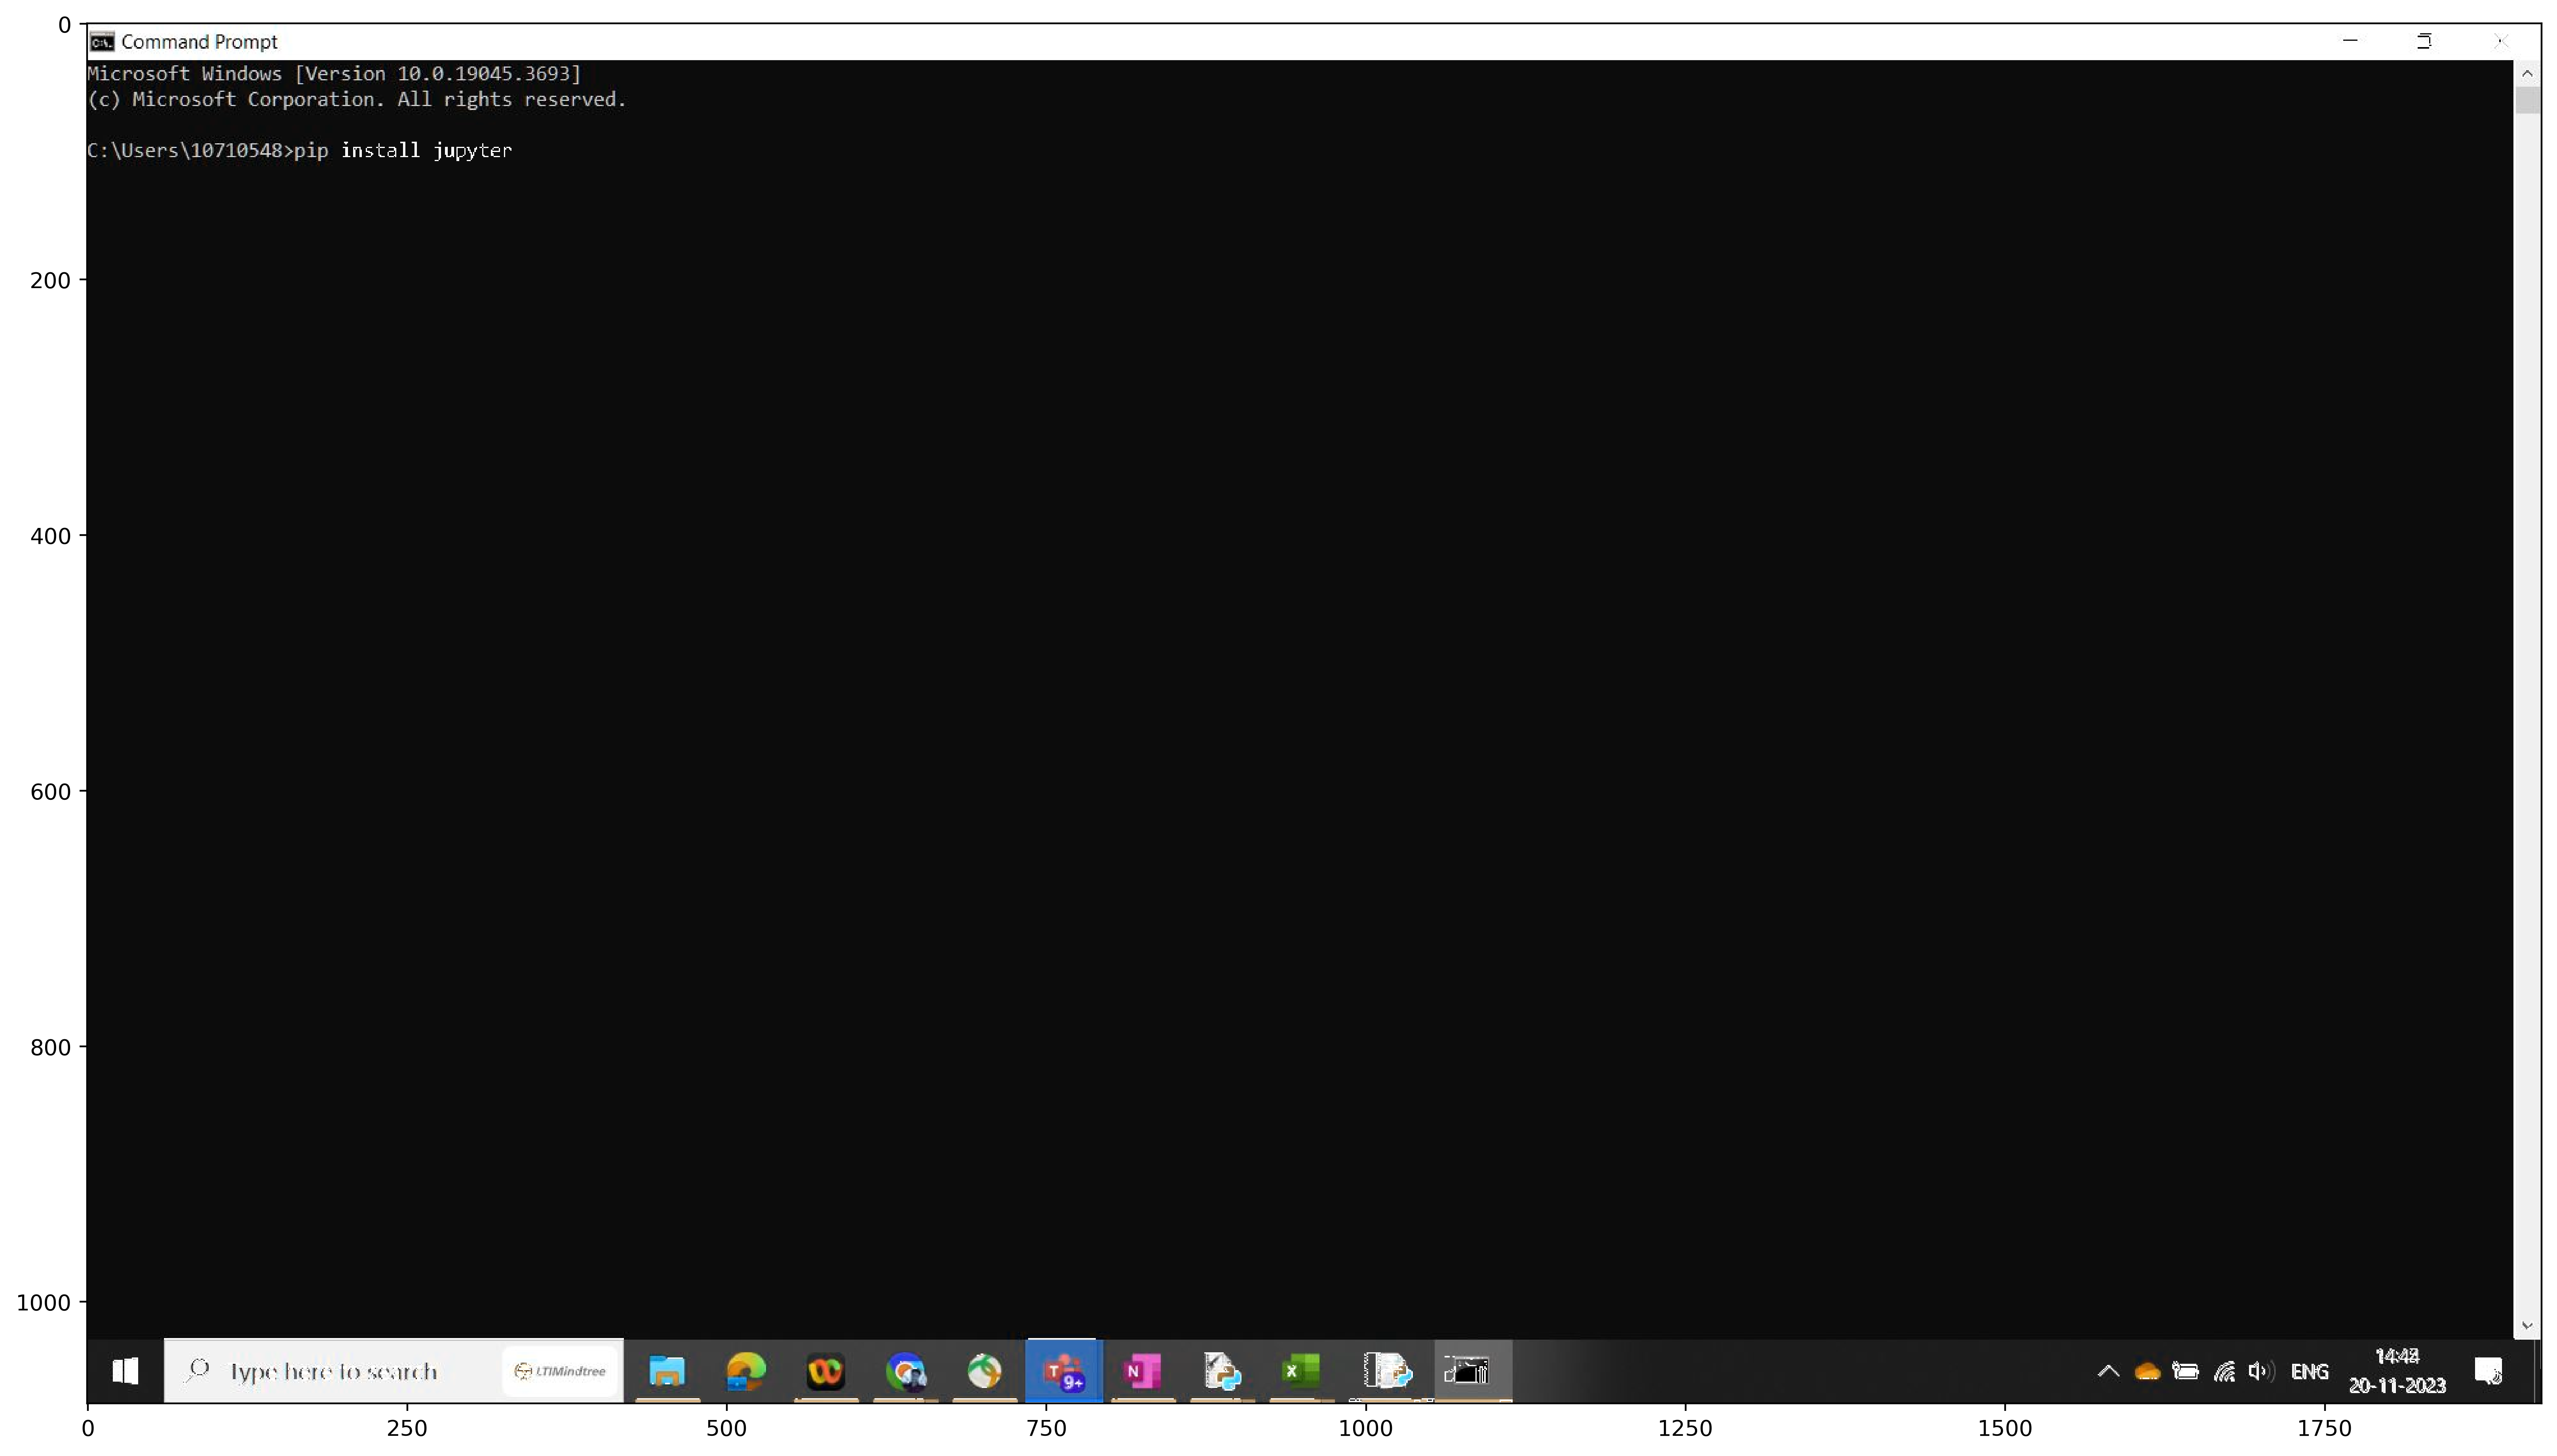

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlap_and_add(frame1, frame2):
    frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    #--- take the absolute difference of the images ---
    diff = cv2.absdiff(gray1, gray2)
    
    """
    below code for calculating absolute differnece
    """

#     res = cv2.absdiff(img1, img2)

    #--- convert the result to integer type ---
    res = diff.astype(np.uint8)

    #--- find percentage difference based on number of pixels that are not zero ---
    percentage = (np.count_nonzero(res) * 100)/ res.size
    
    print(percentage)

    # Threshold the difference to get a binary mask
    _, thresholded = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the region of interest (ROI) from frame2
    roi = frame2.copy()
    cv2.drawContours(roi, contours, -1, (0, 0, 255), 2)

    # Append the ROI to the existing frame
#     result = np.concatenate((frame1, roi), axis=0)
    mask = np.zeros_like(frame1)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255))#,thickness=cv2.FILLED)

    # Combine the frames using the mask
    result_frame = cv2.addWeighted(frame1, 1, mask, 1.0, 0)

    return result_frame

# Example frames
frame1 = cv2.imread('sample_image_cmd.JPG')
frame2 = cv2.imread('sample_image_cmd1.JPG')

# Overlap frames and append new content
result_frame = overlap_and_add(frame1, frame2)

# Display the result
plt.figure(figsize=(20,20),dpi=400)
plt.imshow(result_frame)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('saved_image.jpg',result_frame)

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def overlap_and_append(frame1, frame2):
#     frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))
#     # Convert frames to grayscale
#     gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
#     gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

#     #--- take the absolute difference of the images ---
#     diff = cv2.absdiff(gray1, gray2)
    
#     """
#     below code for calculating absolute differnece
#     """

# #     res = cv2.absdiff(img1, img2)

#     #--- convert the result to integer type ---
#     res = diff.astype(np.uint8)

#     #--- find percentage difference based on number of pixels that are not zero ---
#     percentage = (np.count_nonzero(res) * 100)/ res.size
    
#     print(percentage)

#     # Threshold the difference to get a binary mask
#     _, thresholded = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

#     # Find contours in the thresholded image
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Extract the region of interest (ROI) from frame2
#     roi = frame2.copy()
#     cv2.drawContours(roi, contours, -1, (0, 0, 255), 2)

#     # Append the ROI to the existing frame
# #     result = np.concatenate((frame1, roi), axis=0)
#     mask = np.zeros_like(frame1)

#     # Draw the contours on the mask
#     cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

#     # Combine the frames using the mask
#     result_frame = cv2.addWeighted(frame1, 1, mask, 0.5, 0)

#     return result_frame

# # Example frames
# frame1 = cv2.imread('sample_image_cmd.JPG')
# frame2 = cv2.imread('sample_image_cmd1.JPG')

# # Overlap frames and append new content
# result_frame = overlap_and_append(frame1, frame2)

# # Display the result
# plt.figure(figsize=(10,10),dpi=400)
# plt.imshow(result_frame)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()
# cv2.imwrite('saved_image.jpg',result_frame)

## Below is the code to merge all above algorithms of :
- Frame Extraction using ORB
- Keeping Consecutive information of frames into single frame and discarding repeating frames
- extracting Commands from merged frames in above

#### frame extraction will stay same as above

In [81]:
# combined_frame_dir = './combined_frames/'
# for index in range(len(frame_list)-1):
#     current_frame = frame_list[index]
#     current_image_path = os.path.join(image_frames,current_frame)
#     next_frame = frame_list[index+1]
#     next_image_path = os.path.join(image_frames,next_frame)
#     print(current_image_path)
#     print(next_image_path)

#     current_img = cv2.imread(current_image_path)
#     current_img = cv2.cvtColor(current_img, cv2.COLOR_BGR2GRAY)
#     current_img_bw = cv2.threshold(current_img, 80, 255, cv2.THRESH_BINARY)[1]
#     next_image = cv2.imread(next_image_path)
#     next_image = cv2.cvtColor(next_image, cv2.COLOR_BGR2GRAY)
#     next_image_bw = cv2.threshold(next_image, 80, 255, cv2.THRESH_BINARY)[1]
#     diff = cv2.absdiff(current_img_bw, next_image_bw)
#     diff_for_overlapping = cv2.absdiff(current_img, next_image)
    
#     """
#     below code for calculating absolute differnece
#     """

# #     res = cv2.absdiff(img1, img2)

#     #--- convert the result to integer type ---
#     res = diff.astype(np.uint8)

#     #--- find percentage difference based on number of pixels that are not zero ---
#     percentage = (np.count_nonzero(res) * 100)/ res.size
    
#     print(percentage)
#     print(diff)
    

#     #####################################
#     if percentage <= 1.00:
#         print('into saving code')
#         saving_name = str(index) + '_'+str(index+1)
#         # Threshold the difference to get a binary mask
#         _, thresholded = cv2.threshold(diff_for_overlapping, 105, 255, cv2.THRESH_BINARY)
# #         _,thresholded = cv2.threshold(diff,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#         # Find contours in the thresholded image
#         contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         # Extract the region of interest (ROI) from frame2
# #         roi = next_img.copy()
# #         cv2.drawContours(roi, contours, -1, (0, 0, 255), 2)

#         # Append the ROI to the existing frame
#     #     result = np.concatenate((frame1, roi), axis=0)
#         mask = np.zeros_like(current_img_bw)

#         # Draw the contours on the mask
#         cv2.drawContours(mask, contours, -1, (255, 255, 255))#,thickness=cv2.FILLED)

#         # Combine the frames using the mask
#         result_frame = cv2.addWeighted(current_img_bw, 1, mask, 1.0, 0)
#         frame_filename = combined_frame_dir+saving_name +'.png'
#         cv2.imwrite(frame_filename, result_frame)
# #         break
#     elif percentage > 1.00:
#         print('Into elif condition')
#         saving_name = str(index)
#         frame_filename = combined_frame_dir+saving_name +'.png'
#         cv2.imwrite(frame_filename, current_img_bw)
        

#     print('_-'*30)
        
    


image_frames/3.png
image_frames/4.png
0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
image_frames/4.png
image_frames/5.png
11.759741512345679
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Into elif condition
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
image_frames/5.png
image_frames/6.png
0.16242283950617284
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
image_frames/6.png
image_frames/7.png
0.00019290123456790122
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
image_frames/39.png
image_frames/40.png
0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
image_frames/40.png
image_frames/41.png
0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
image_frames/41.png
image_frames/42.png
4.8225308641975306e-05
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
into saving code
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


## Merged Frame Combo - approach 1

0
./image_frames/3.png ./image_frames/4.png
Difference Percentage : 0.0<0.5:True
else:   ./image_frames/3.png ./image_frames/4.png


Difference Percentage : 11.759741512345679<0.5:False
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
1
./image_frames/4.png ./image_frames/5.png
Difference Percentage : 11.759741512345679<0.5:False
2
./image_frames/5.png ./image_frames/6.png
Difference Percentage : 0.16242283950617284<0.5:True
else:   ./image_frames/5.png ./image_frames/6.png


Difference Percentage : 0.00019290123456790122<0.5:True
Difference Percentage : 0.00019290123456790122<0.5:True
else-while


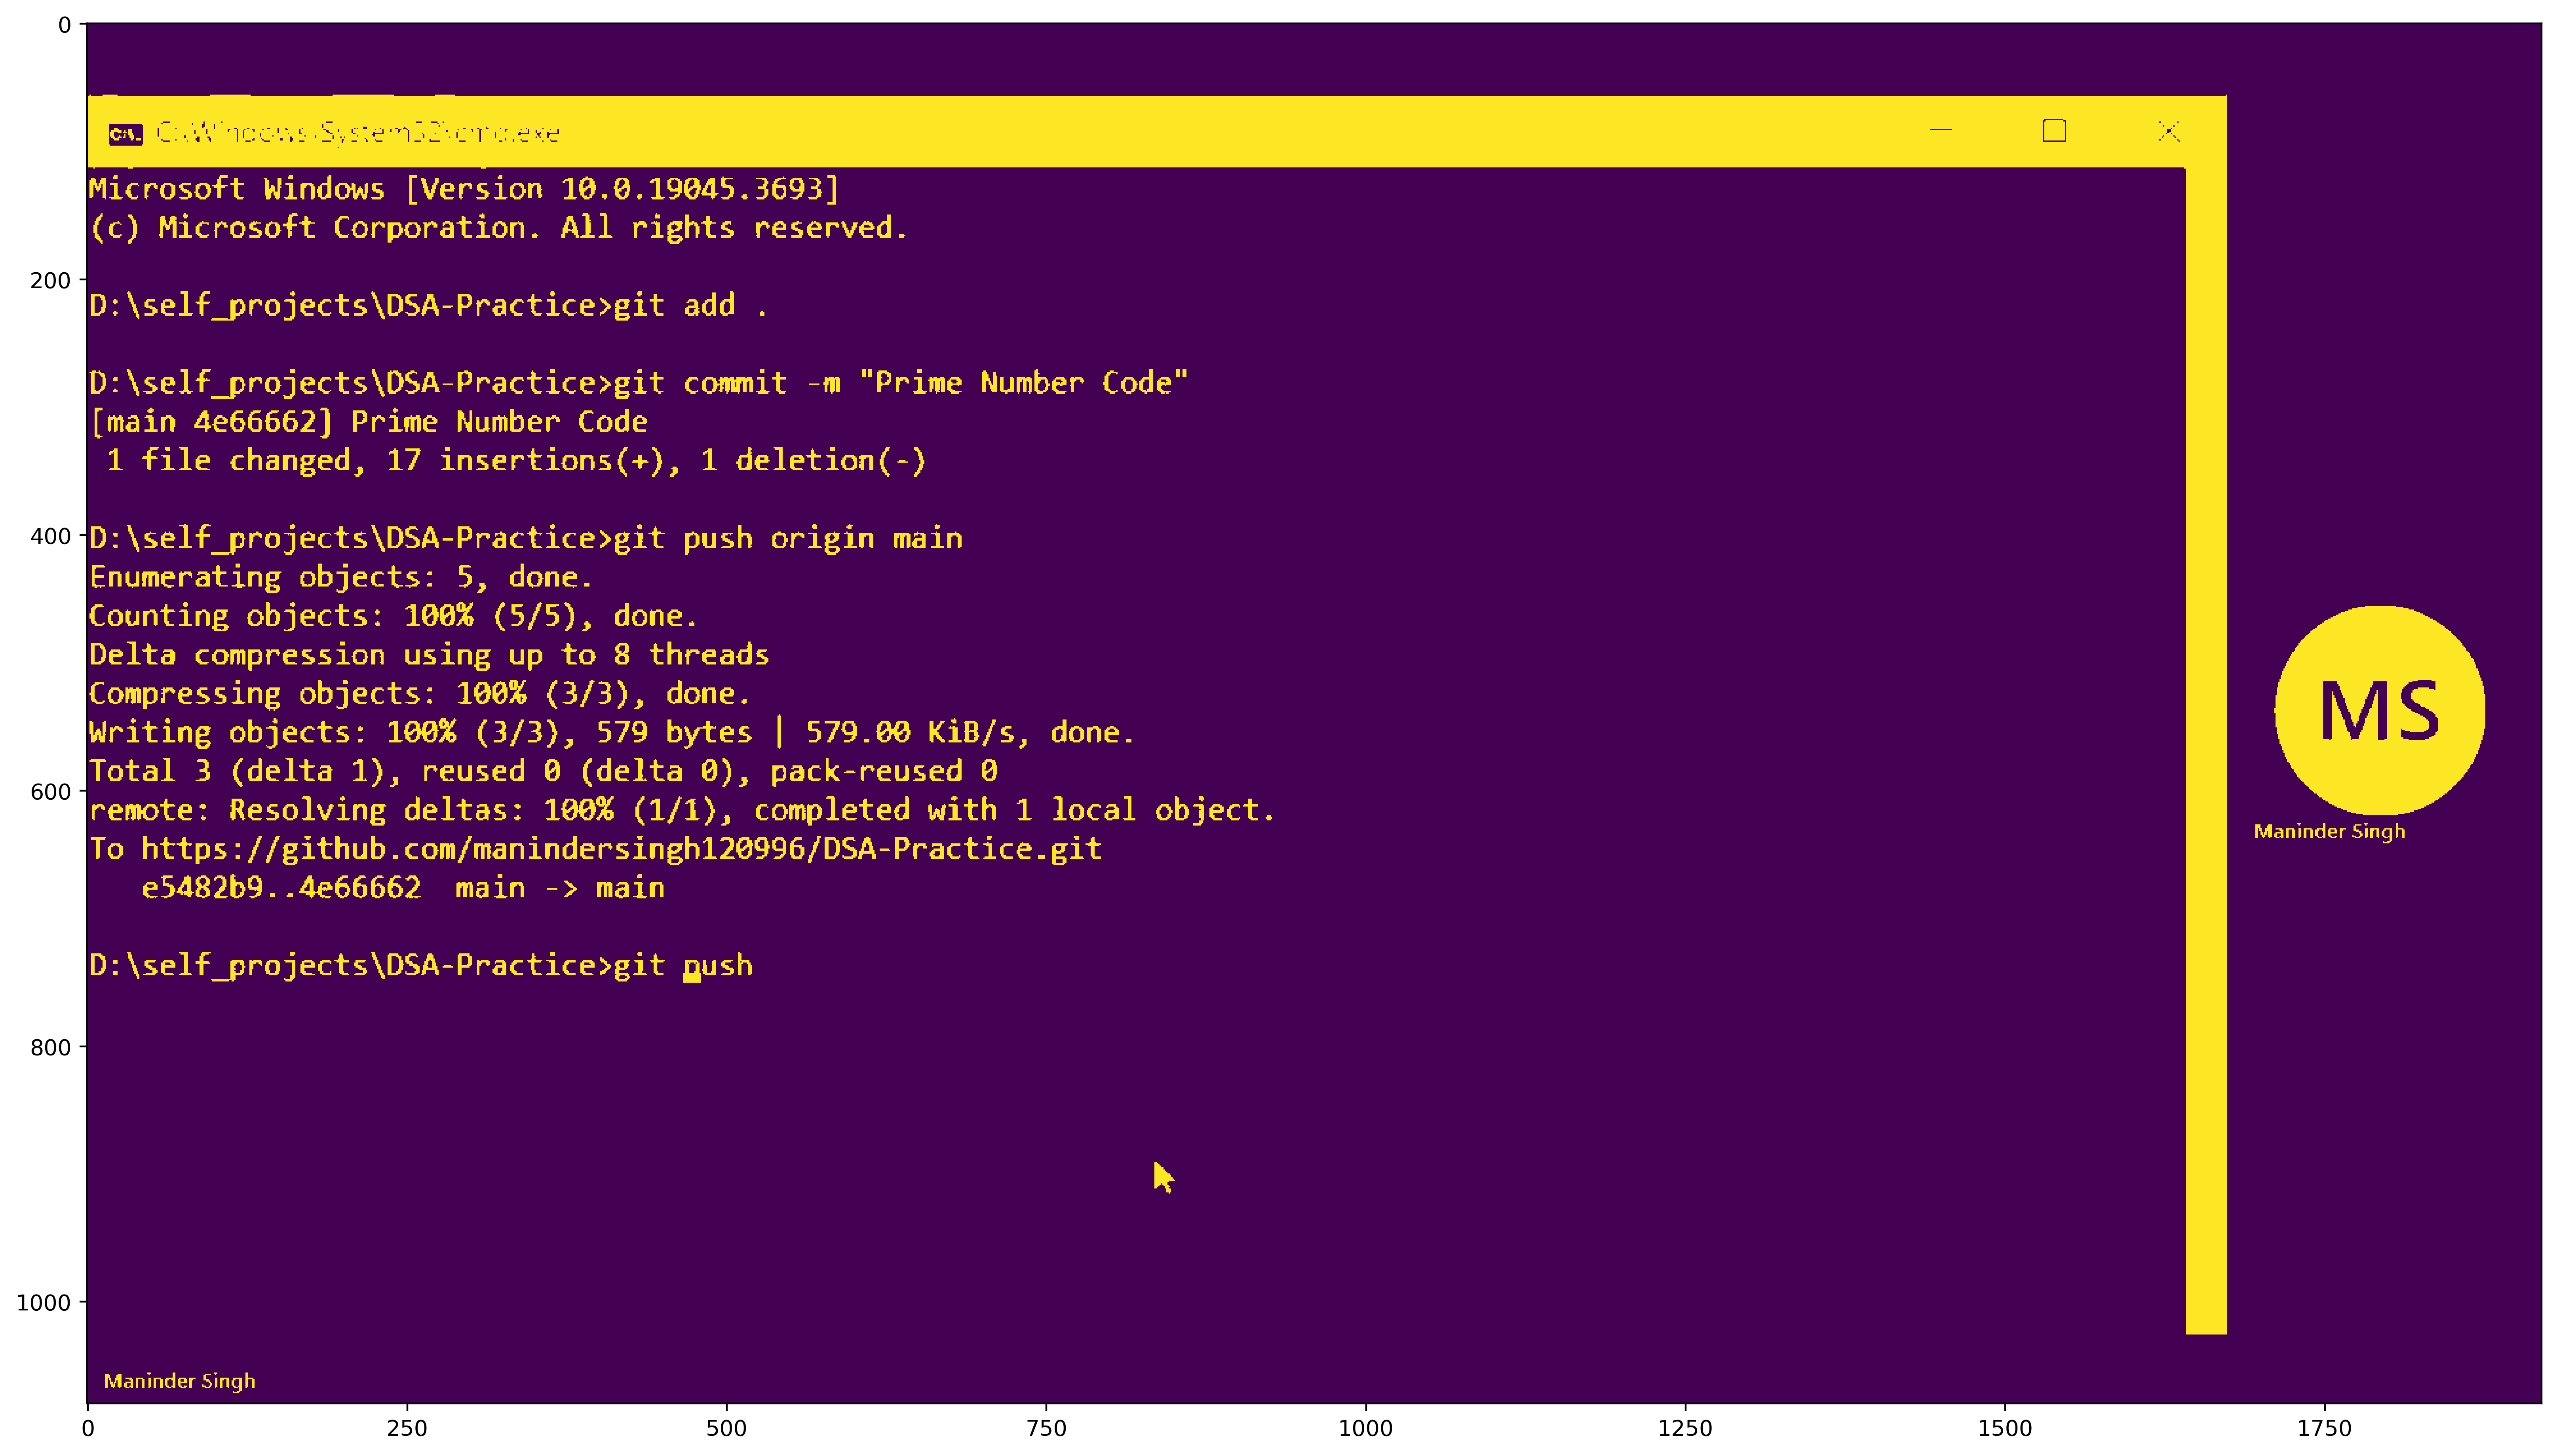

frame mergeing number elseif: 4, 5  
Difference Percentage : 0.11535493827160494<0.5:True
else-while


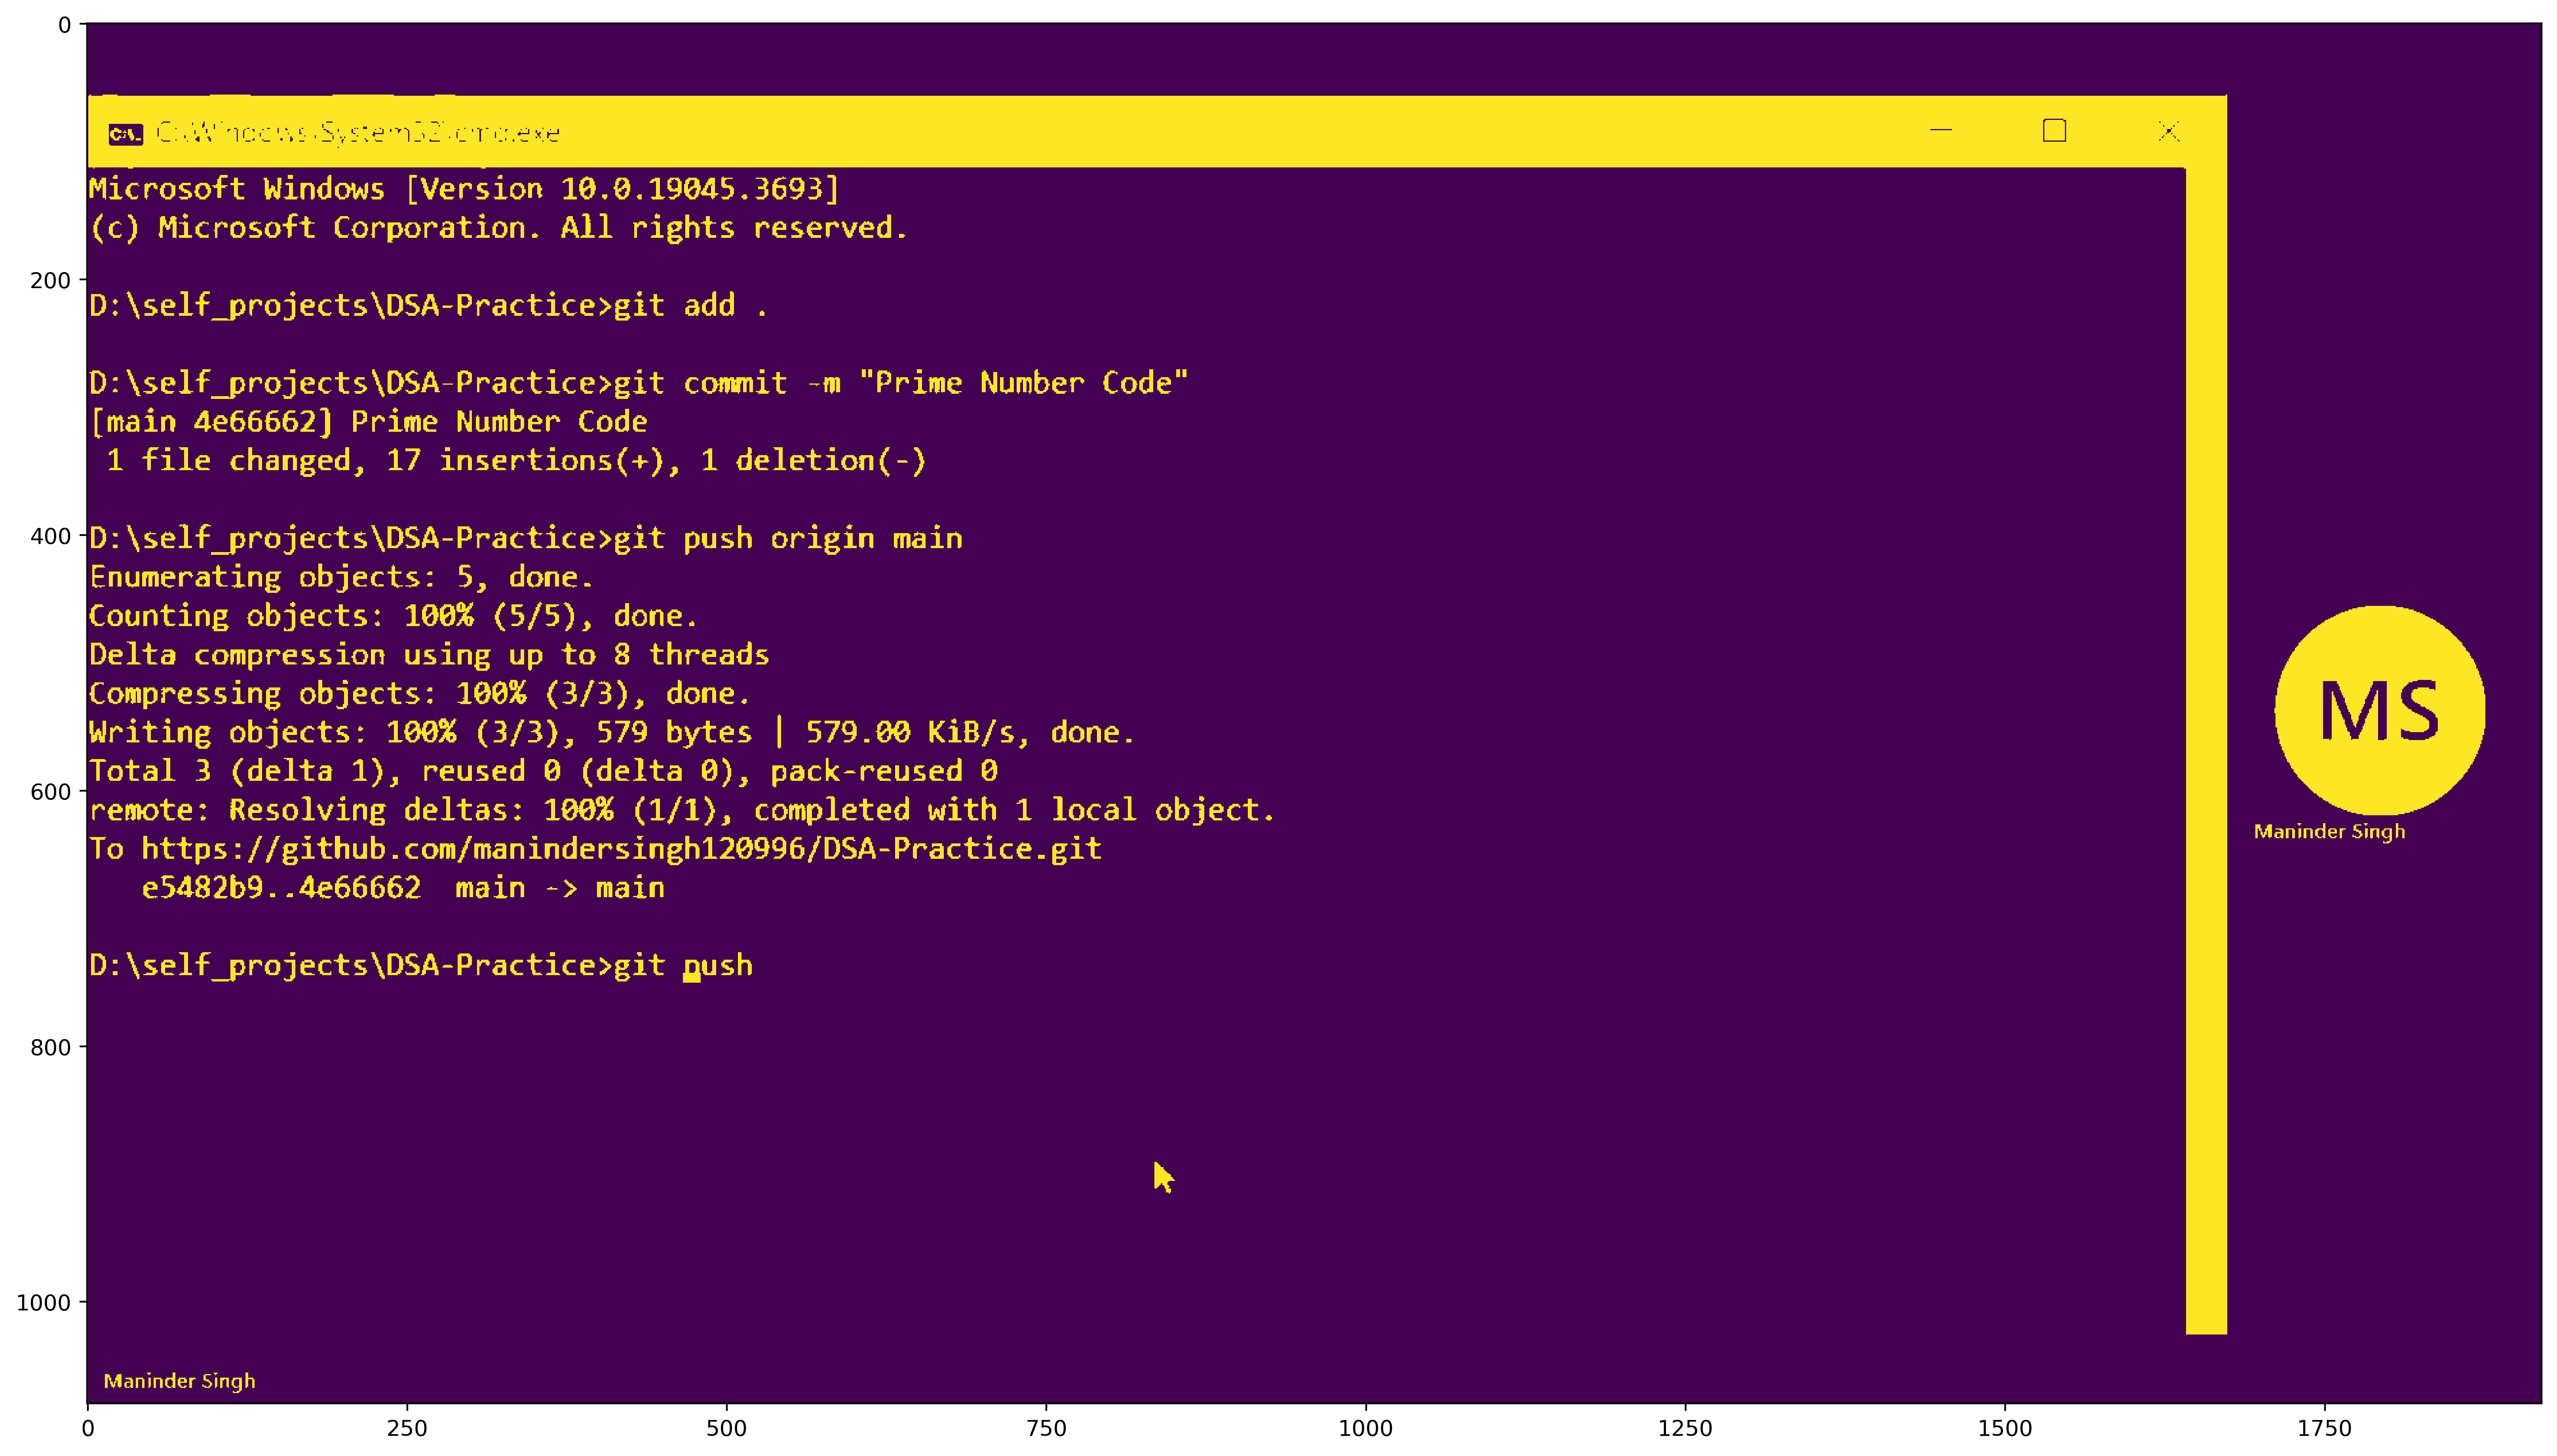

frame mergeing number elseif: 5, 6  
Difference Percentage : 0.057532793209876545<0.5:True
else-while


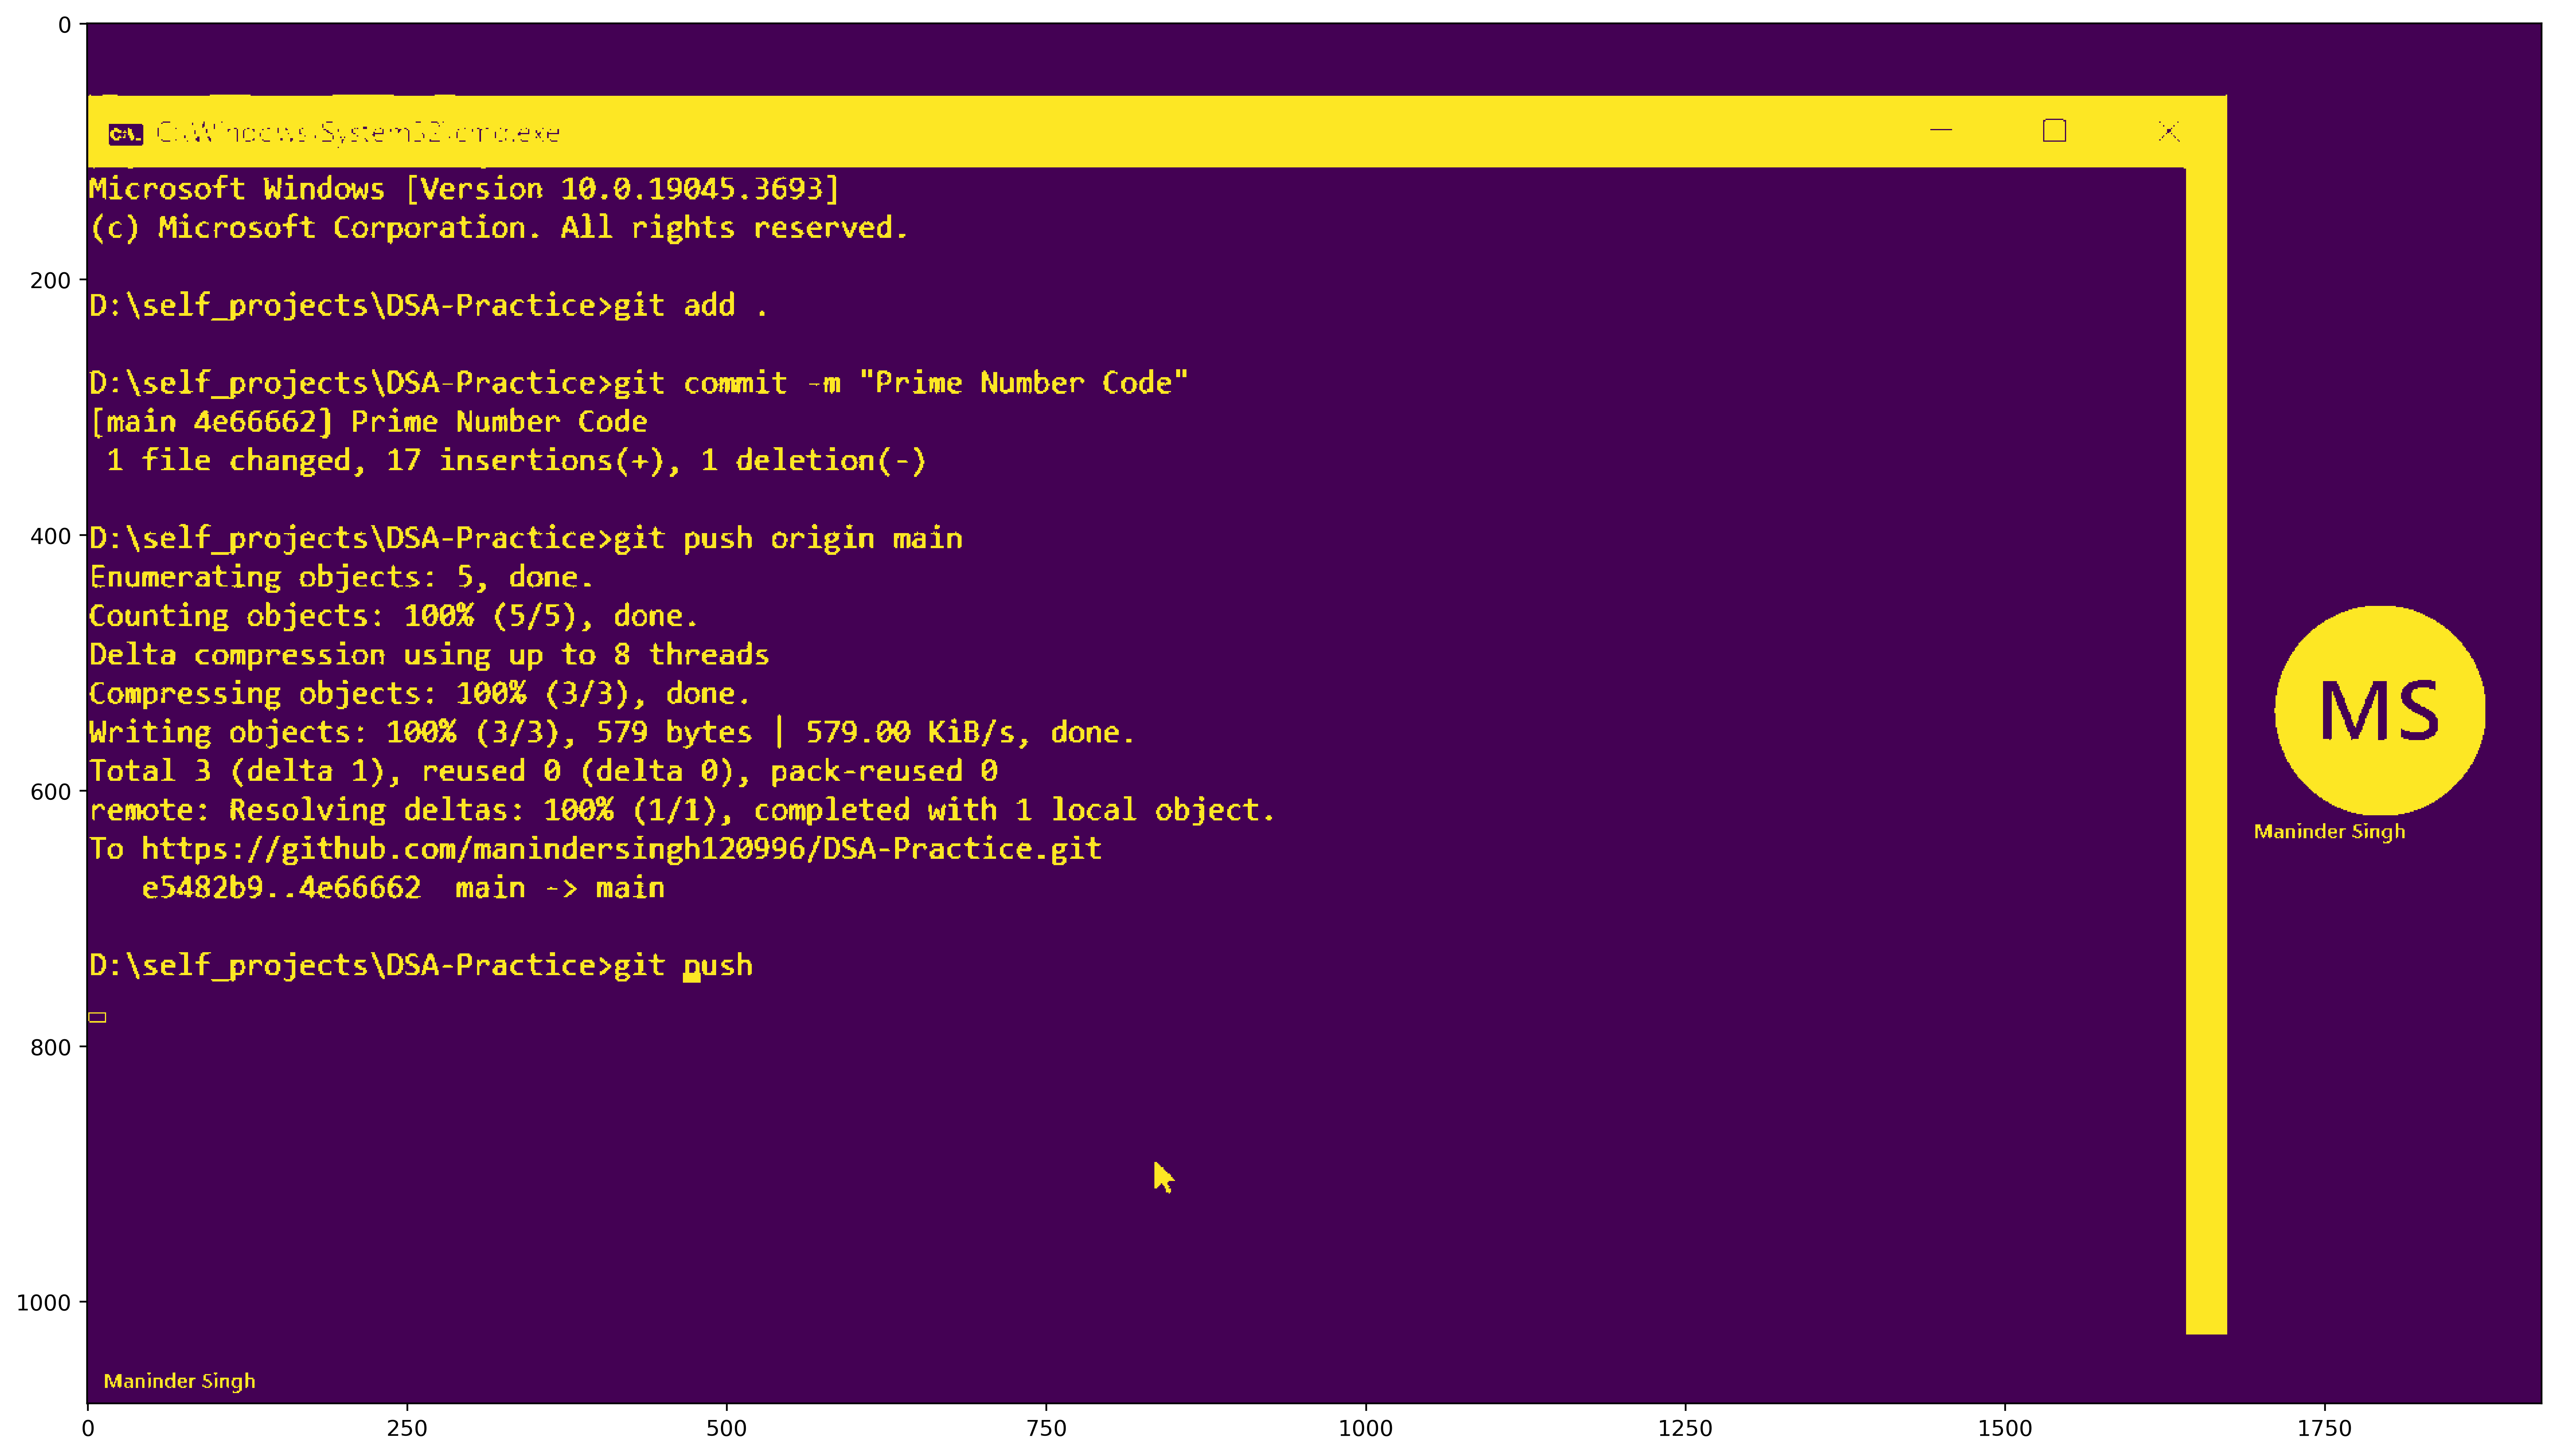

frame mergeing number elseif: 6, 7  
Difference Percentage : 0.0011574074074074073<0.5:True
else-while


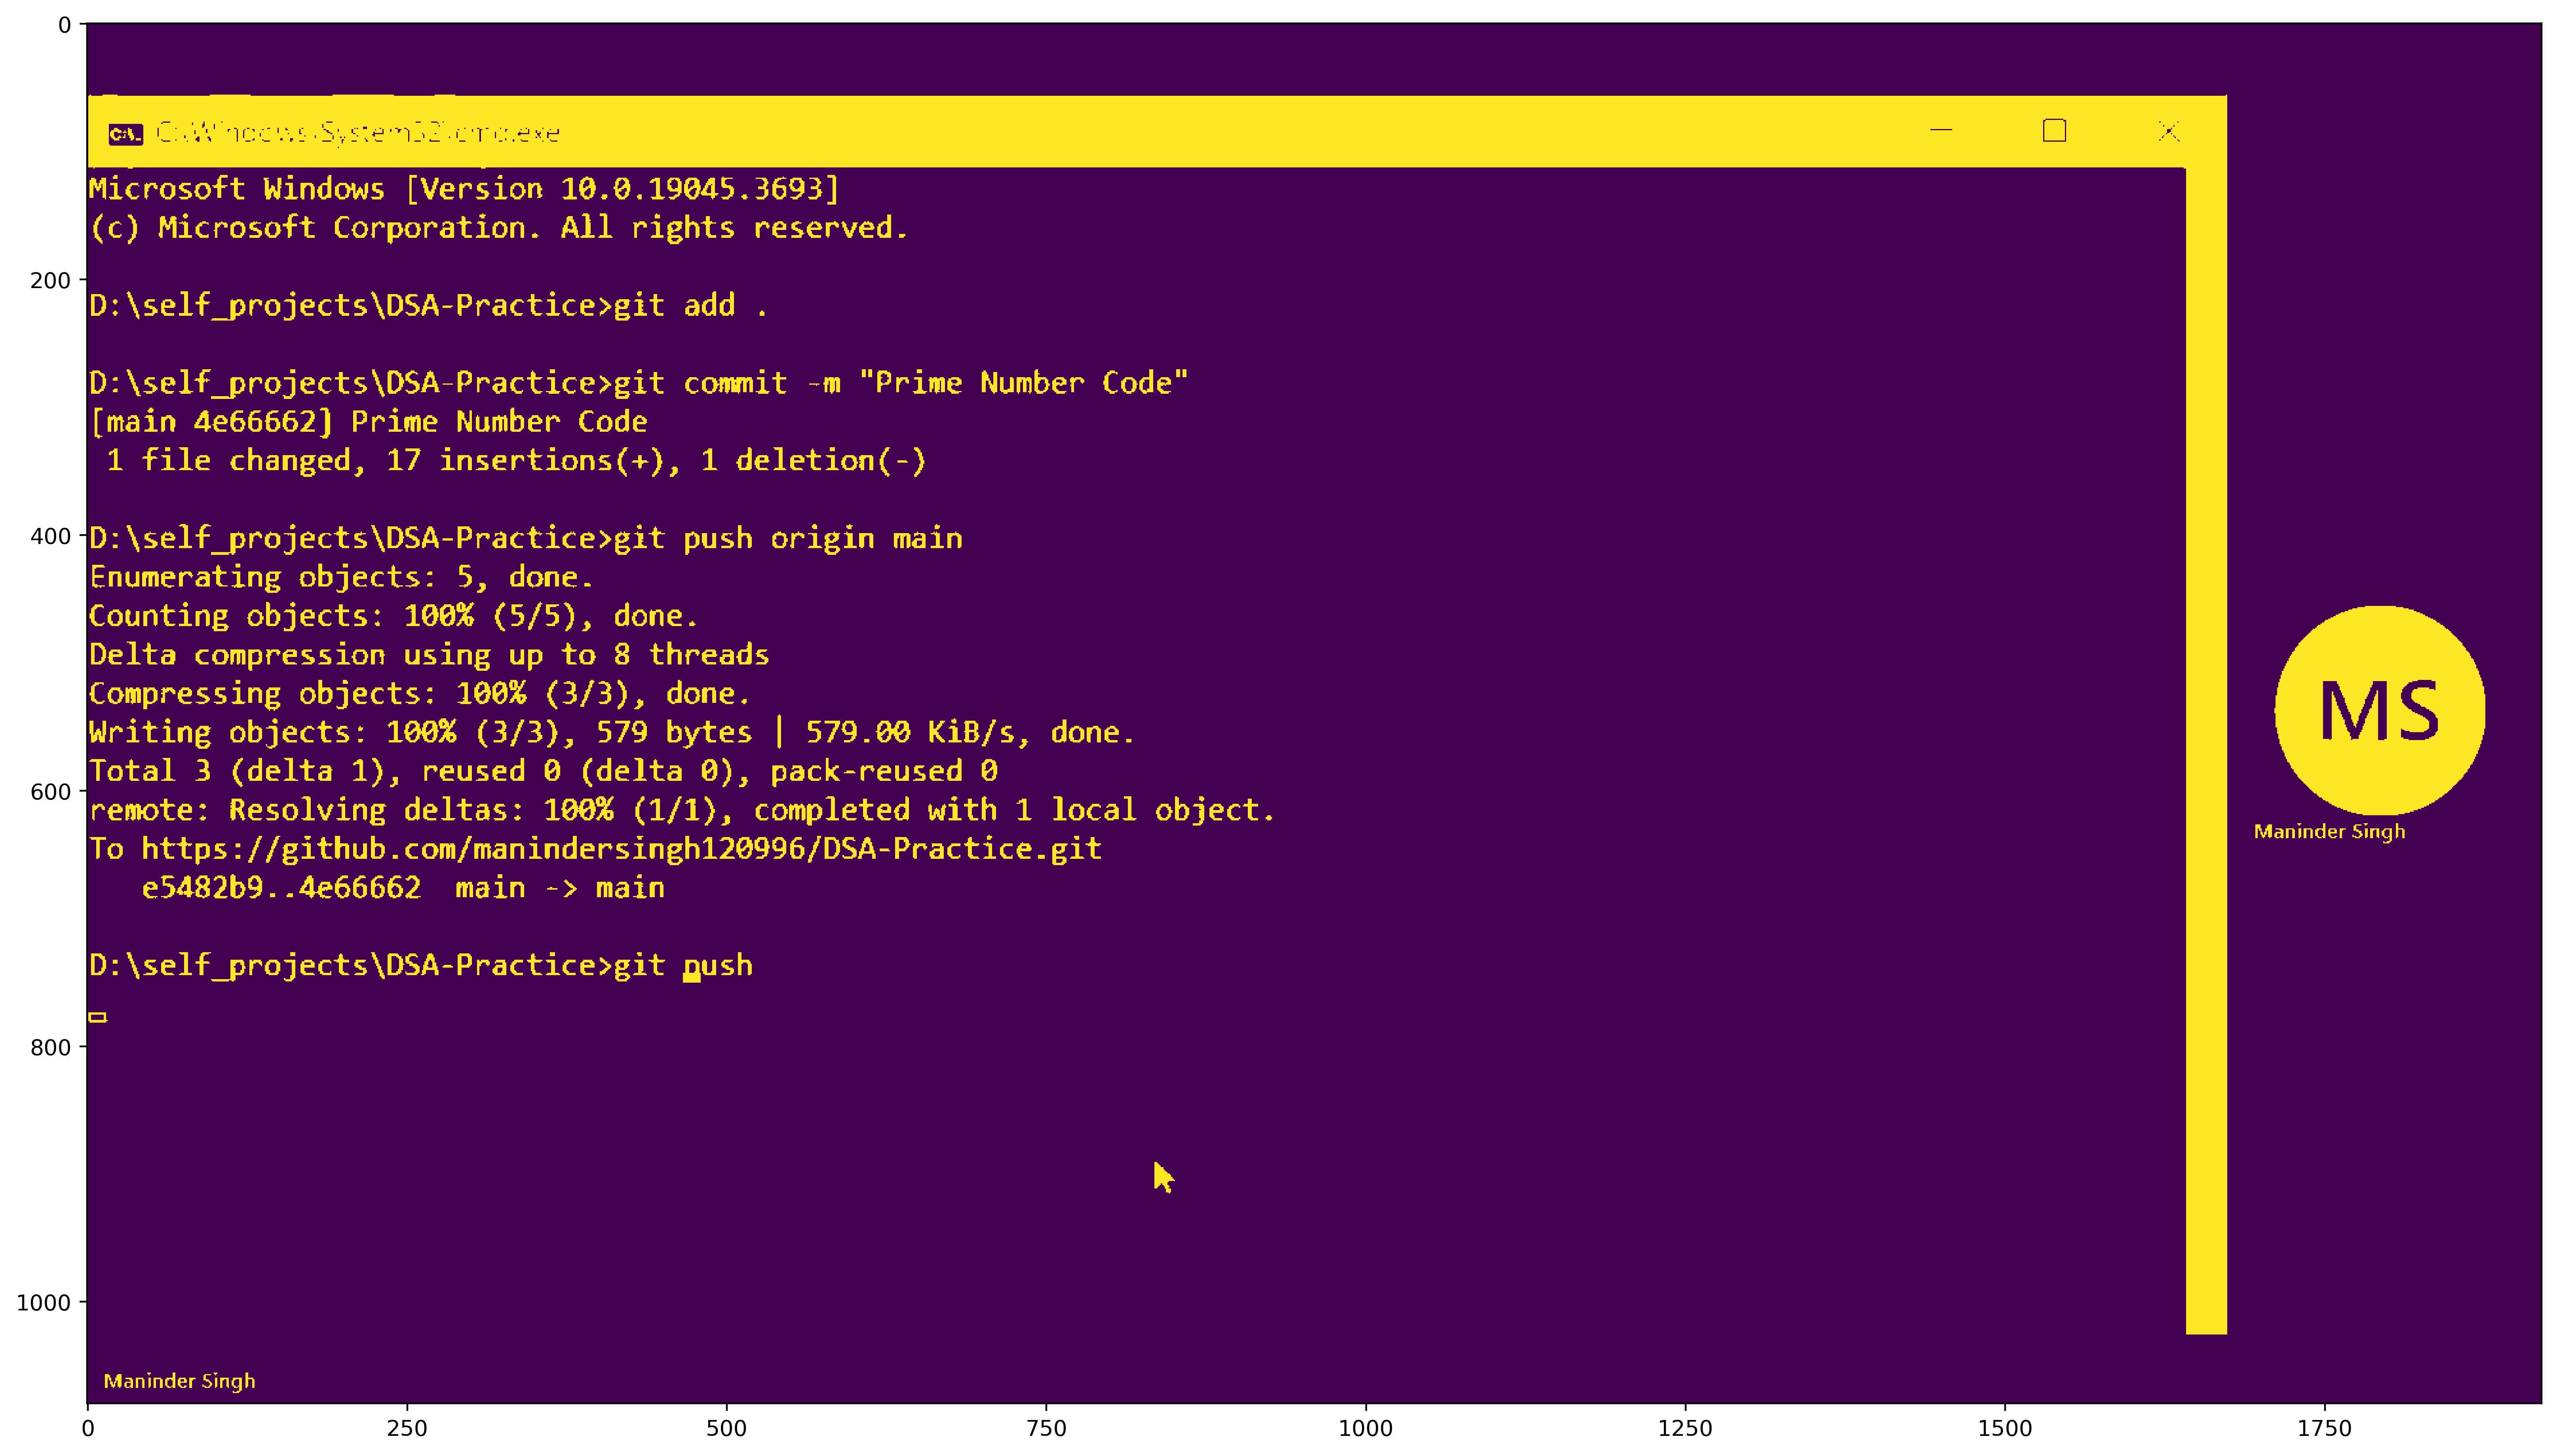

frame mergeing number elseif: 7, 8  
Difference Percentage : 0.0011574074074074073<0.5:True
else-while


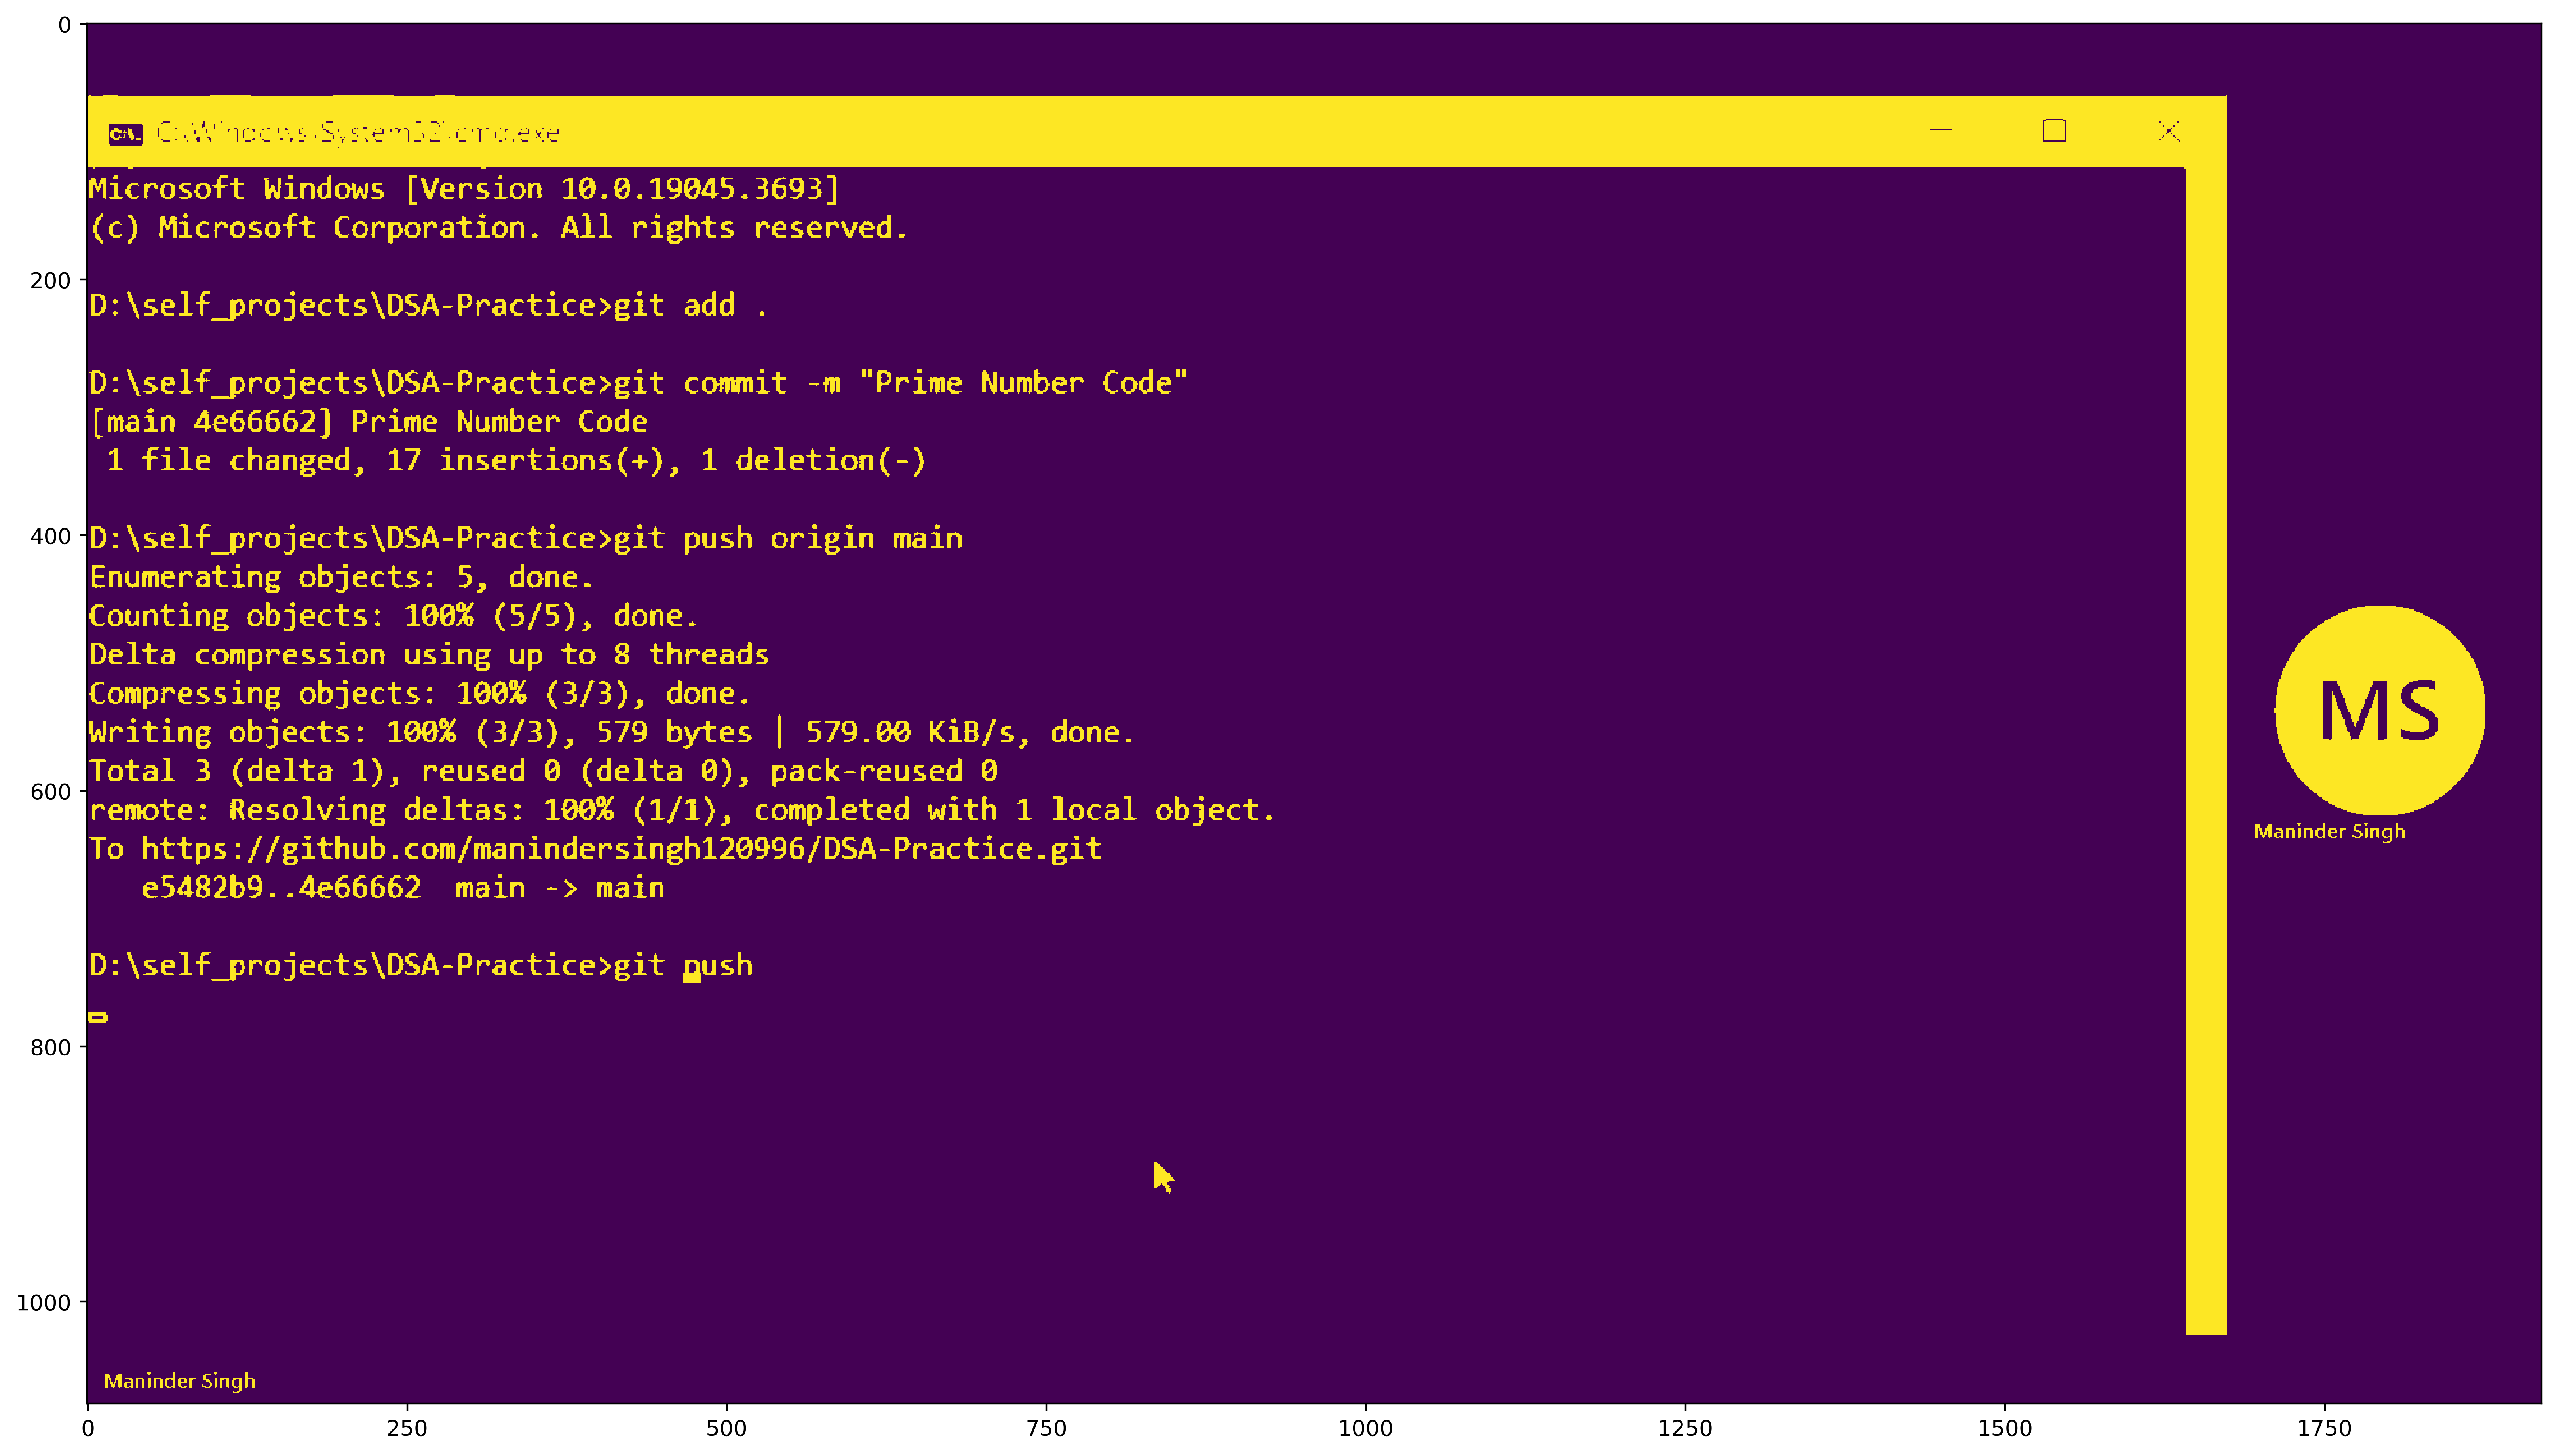

frame mergeing number elseif: 8, 9  
Difference Percentage : 0.060474537037037035<0.5:True
else-while


frame mergeing number elseif: 9, 10  
Difference Percentage : 0.19111689814814814<0.5:True
else-while


frame mergeing number elseif: 10, 11  
Difference Percentage : 0.00048225308641975306<0.5:True
else-while


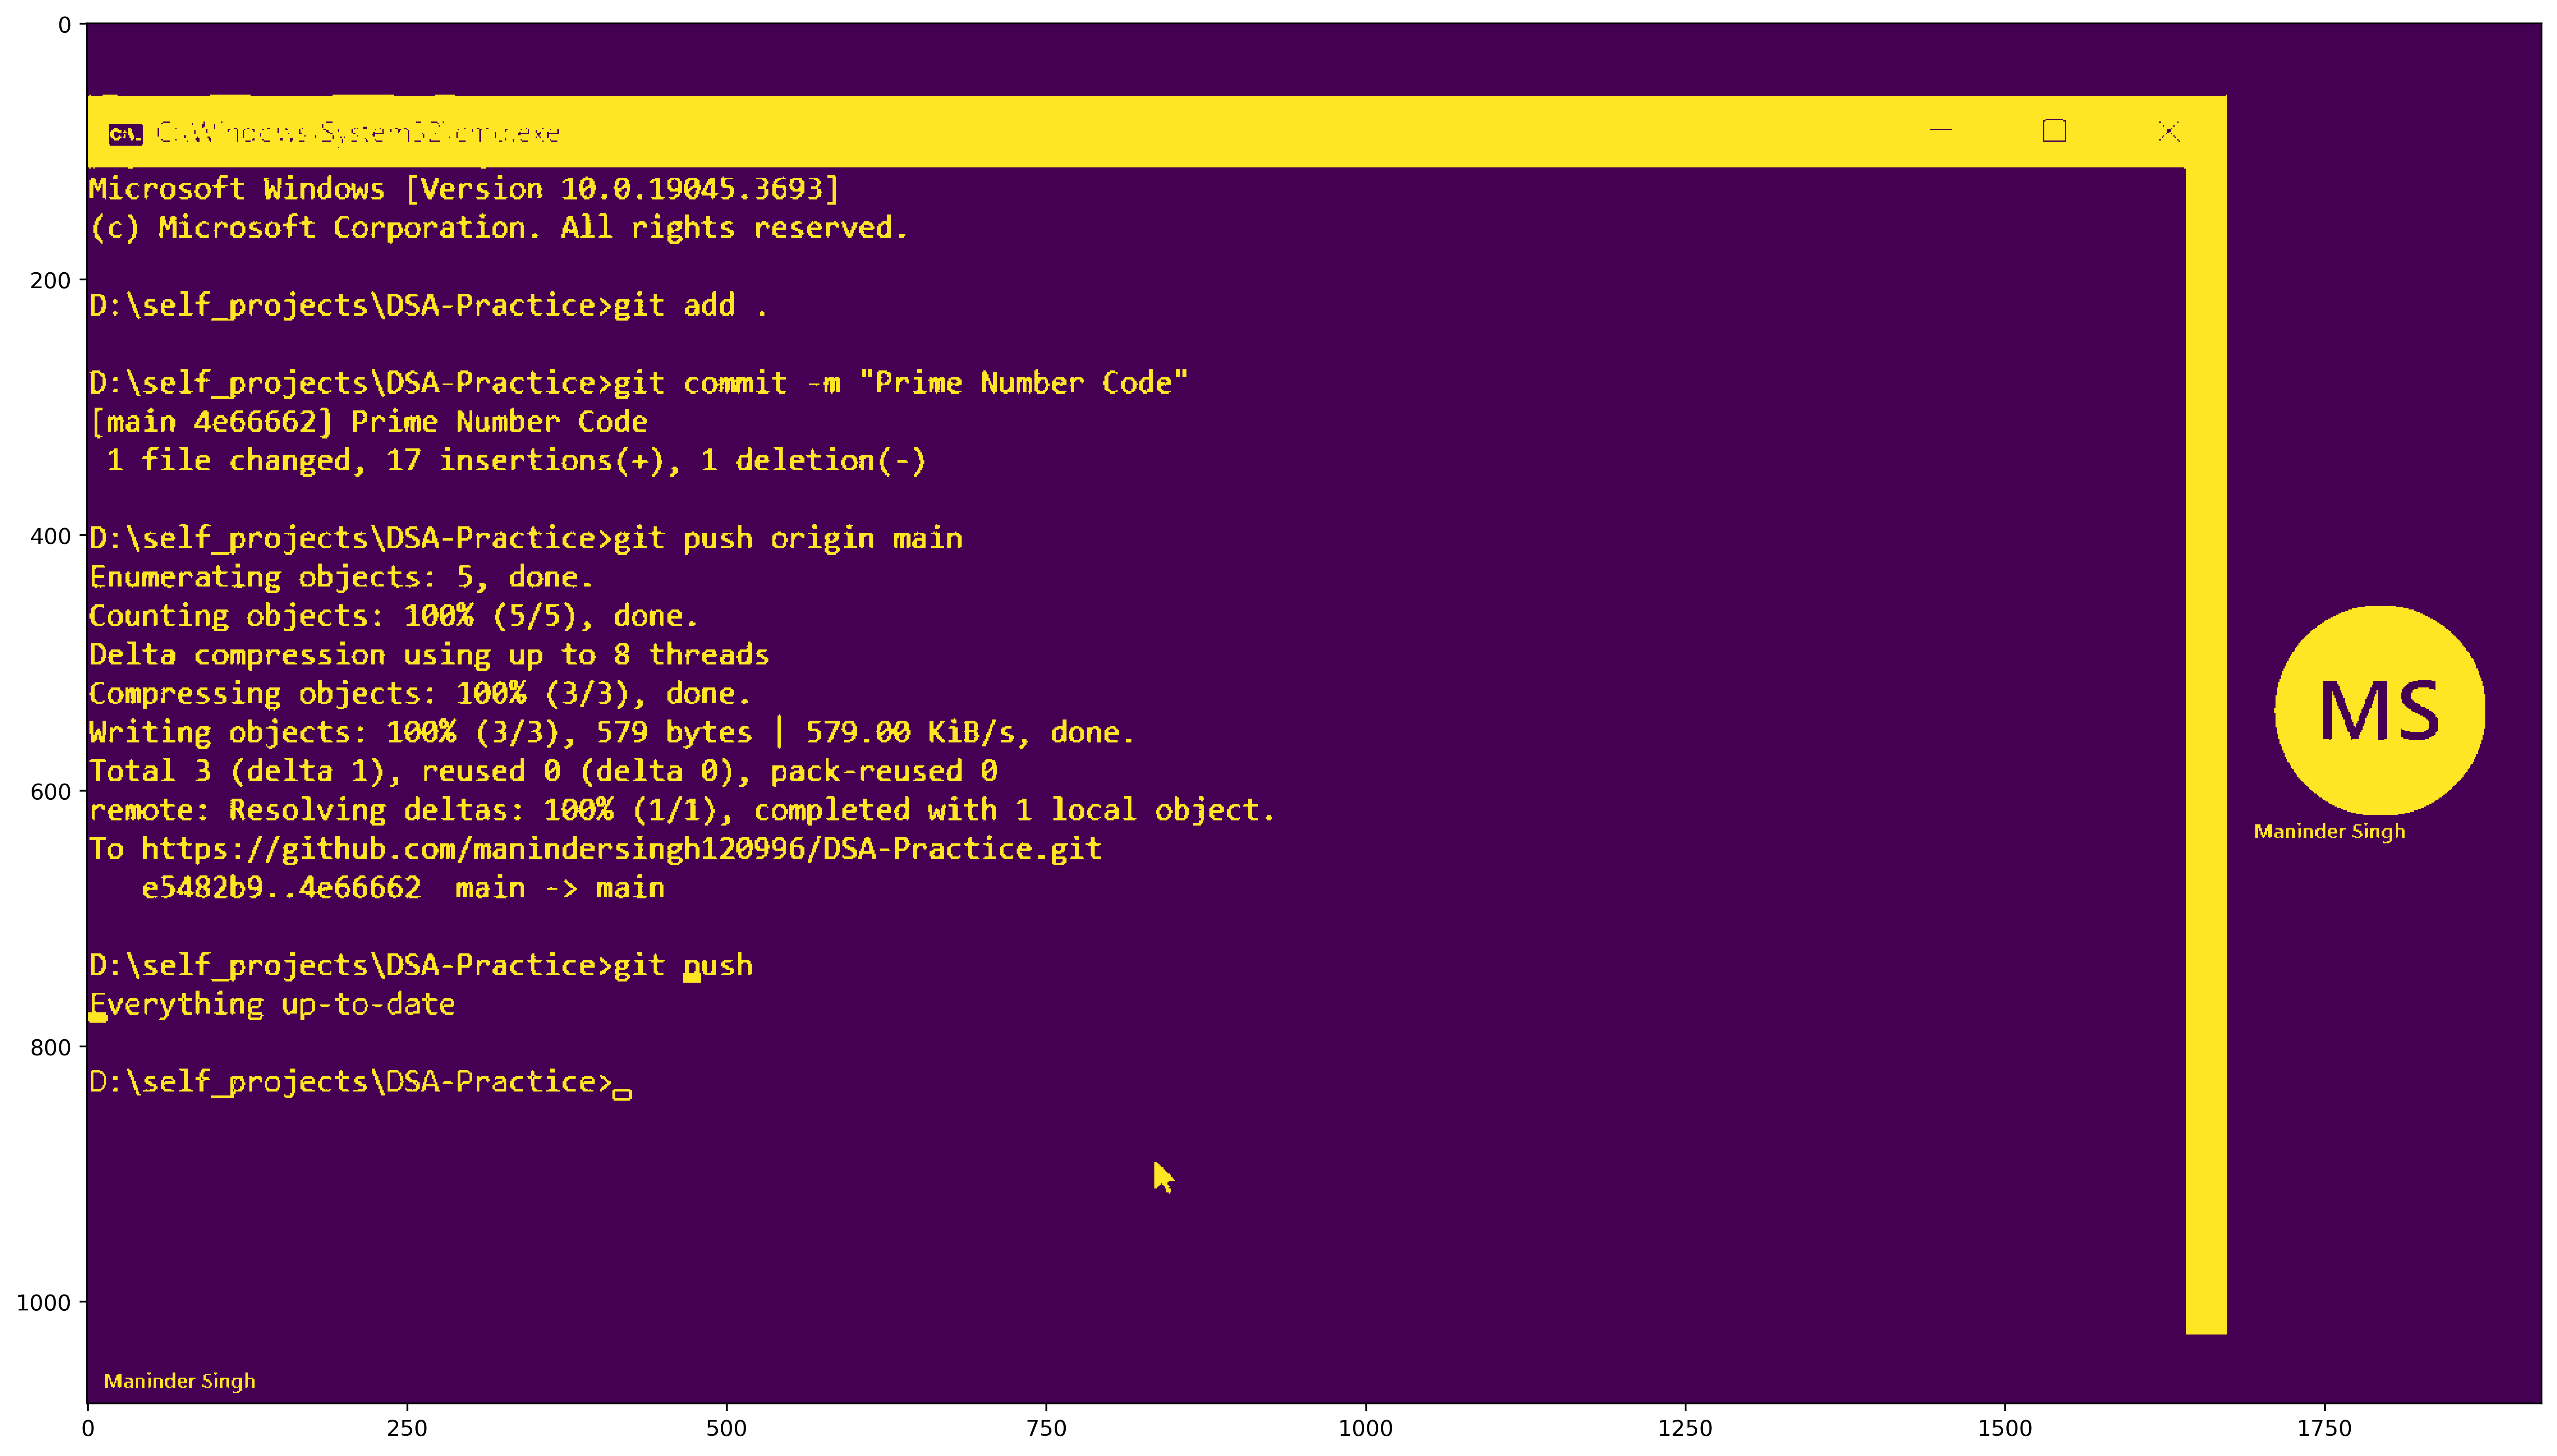

frame mergeing number elseif: 11, 12  
Difference Percentage : 0.01986882716049383<0.5:True
else-while


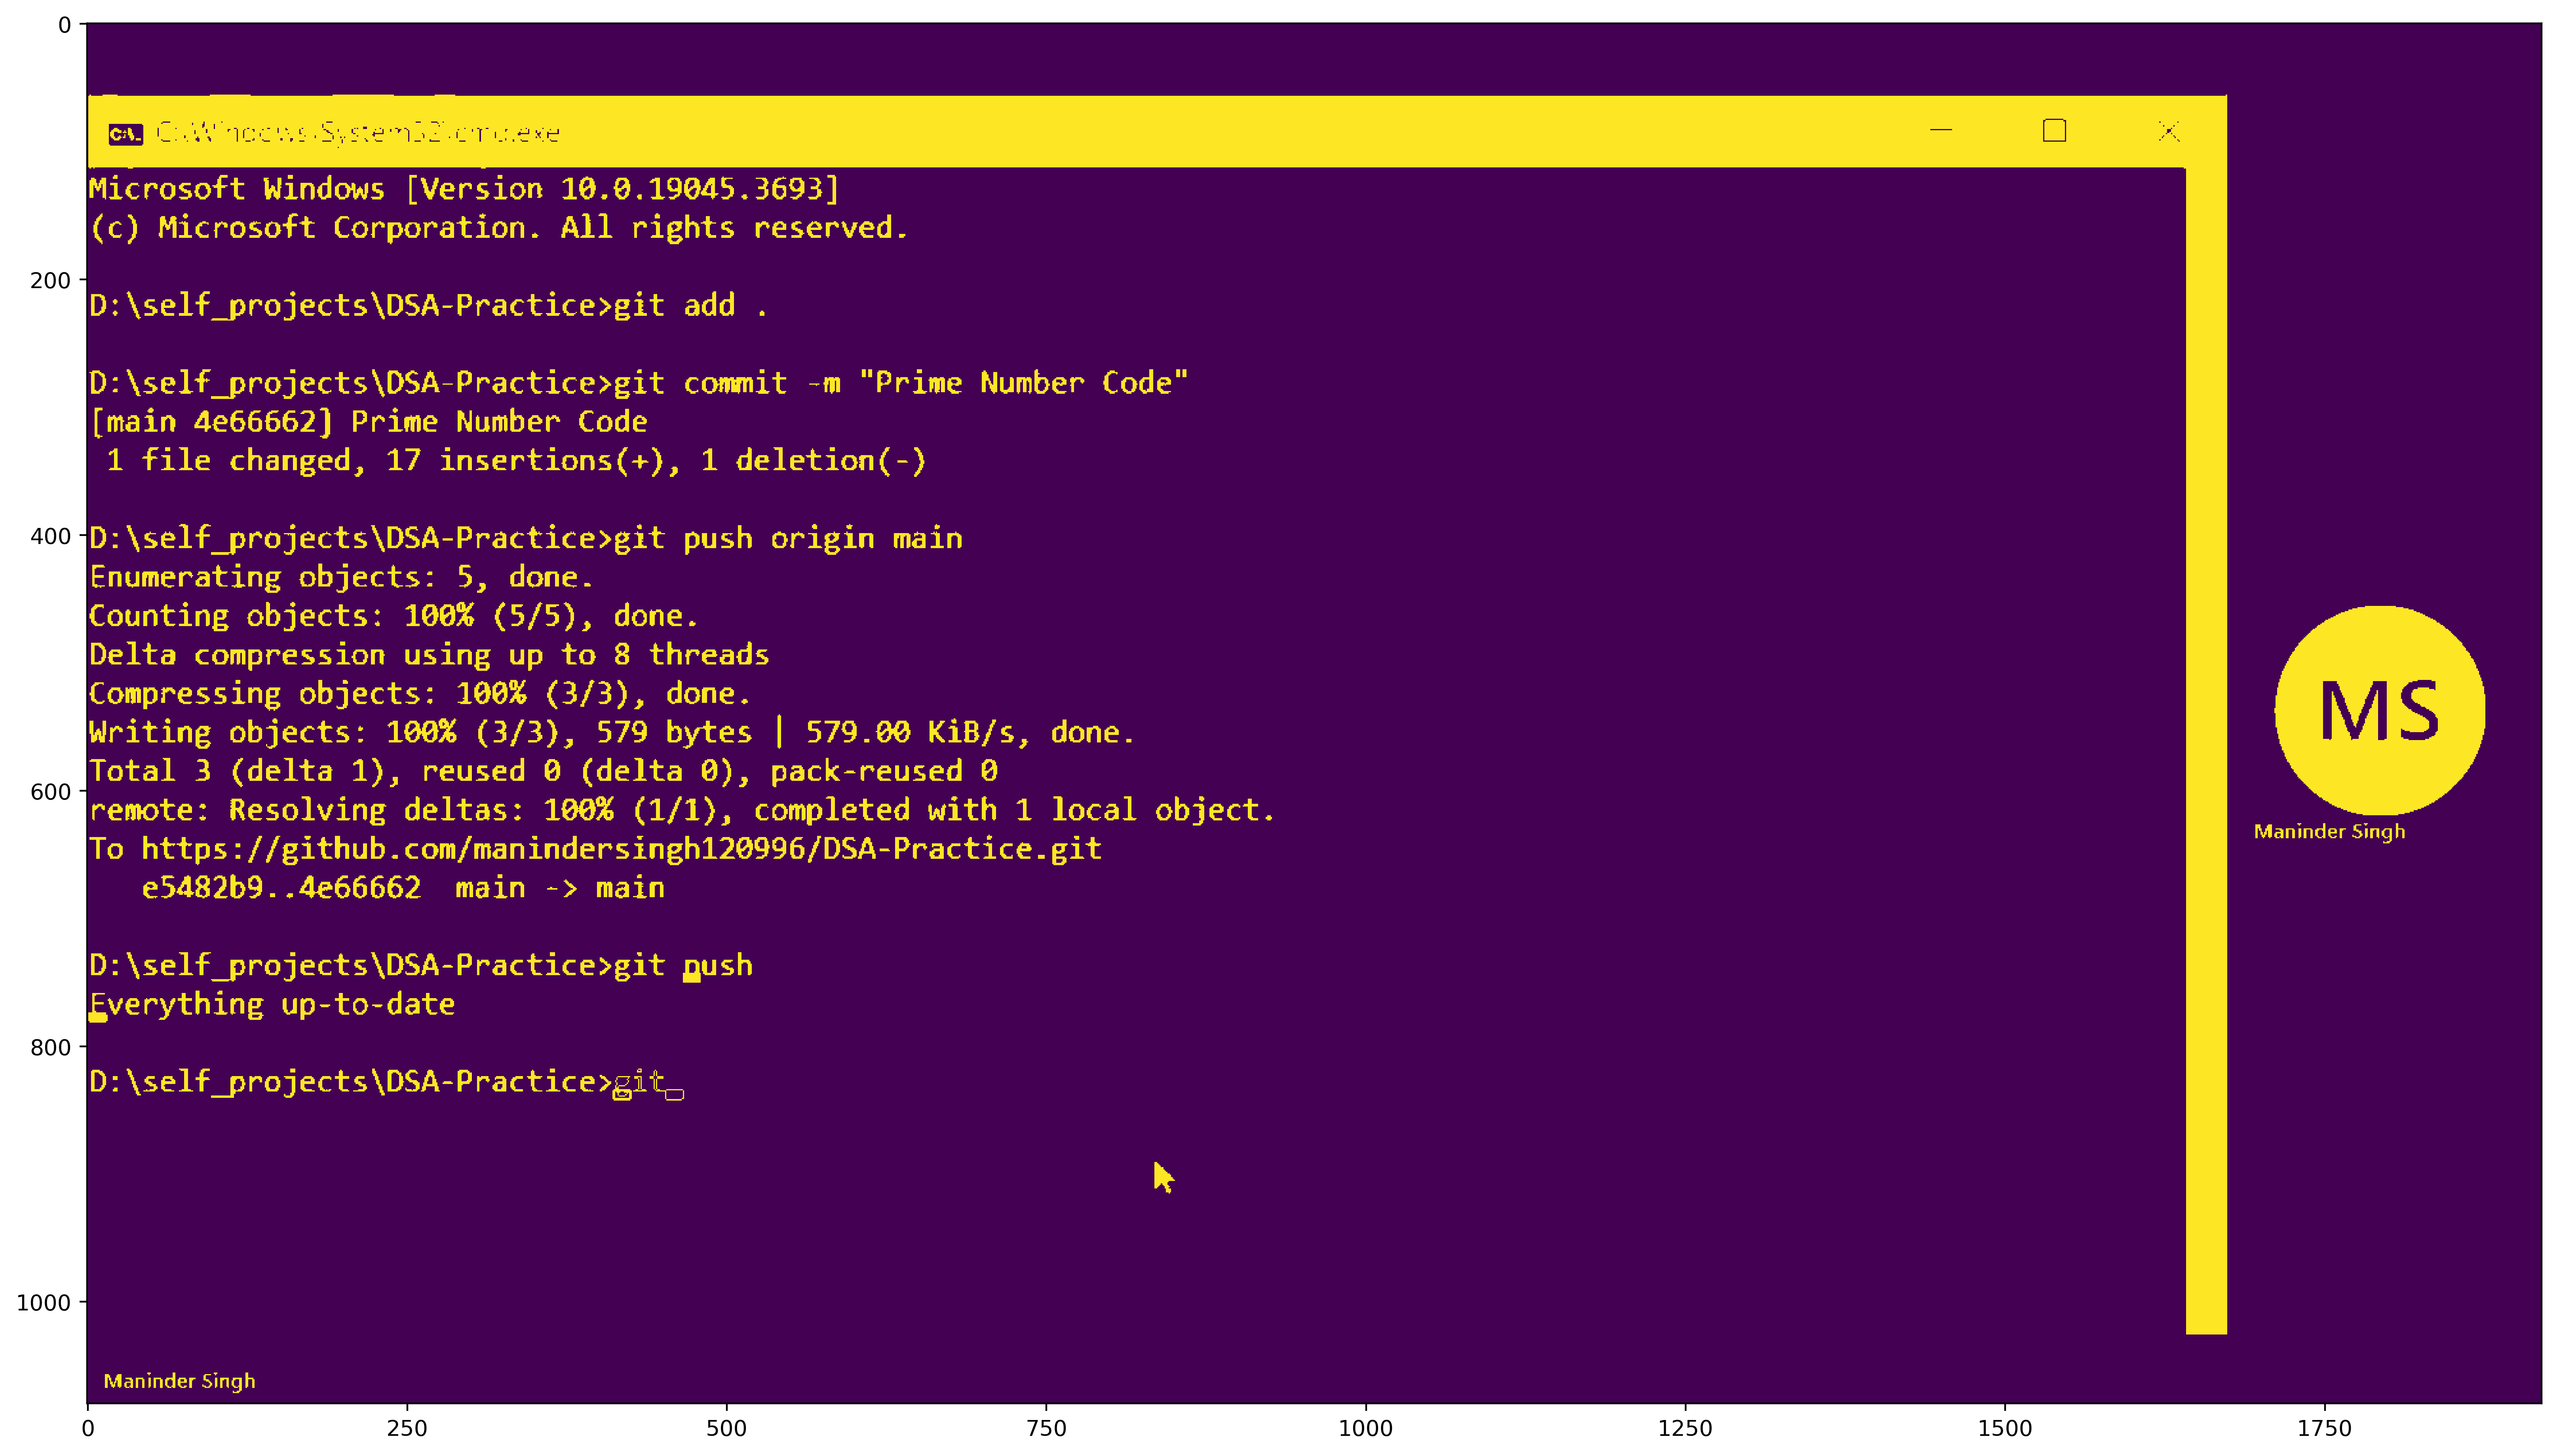

frame mergeing number elseif: 12, 13  
Difference Percentage : 0.011815200617283951<0.5:True
else-while


frame mergeing number elseif: 13, 14  
Difference Percentage : 0.0<0.5:True
else-while


frame mergeing number elseif: 14, 15  
Difference Percentage : 0.04007523148148148<0.5:True
else-while


frame mergeing number elseif: 15, 16  
Difference Percentage : 0.00014467592592592592<0.5:True
else-while


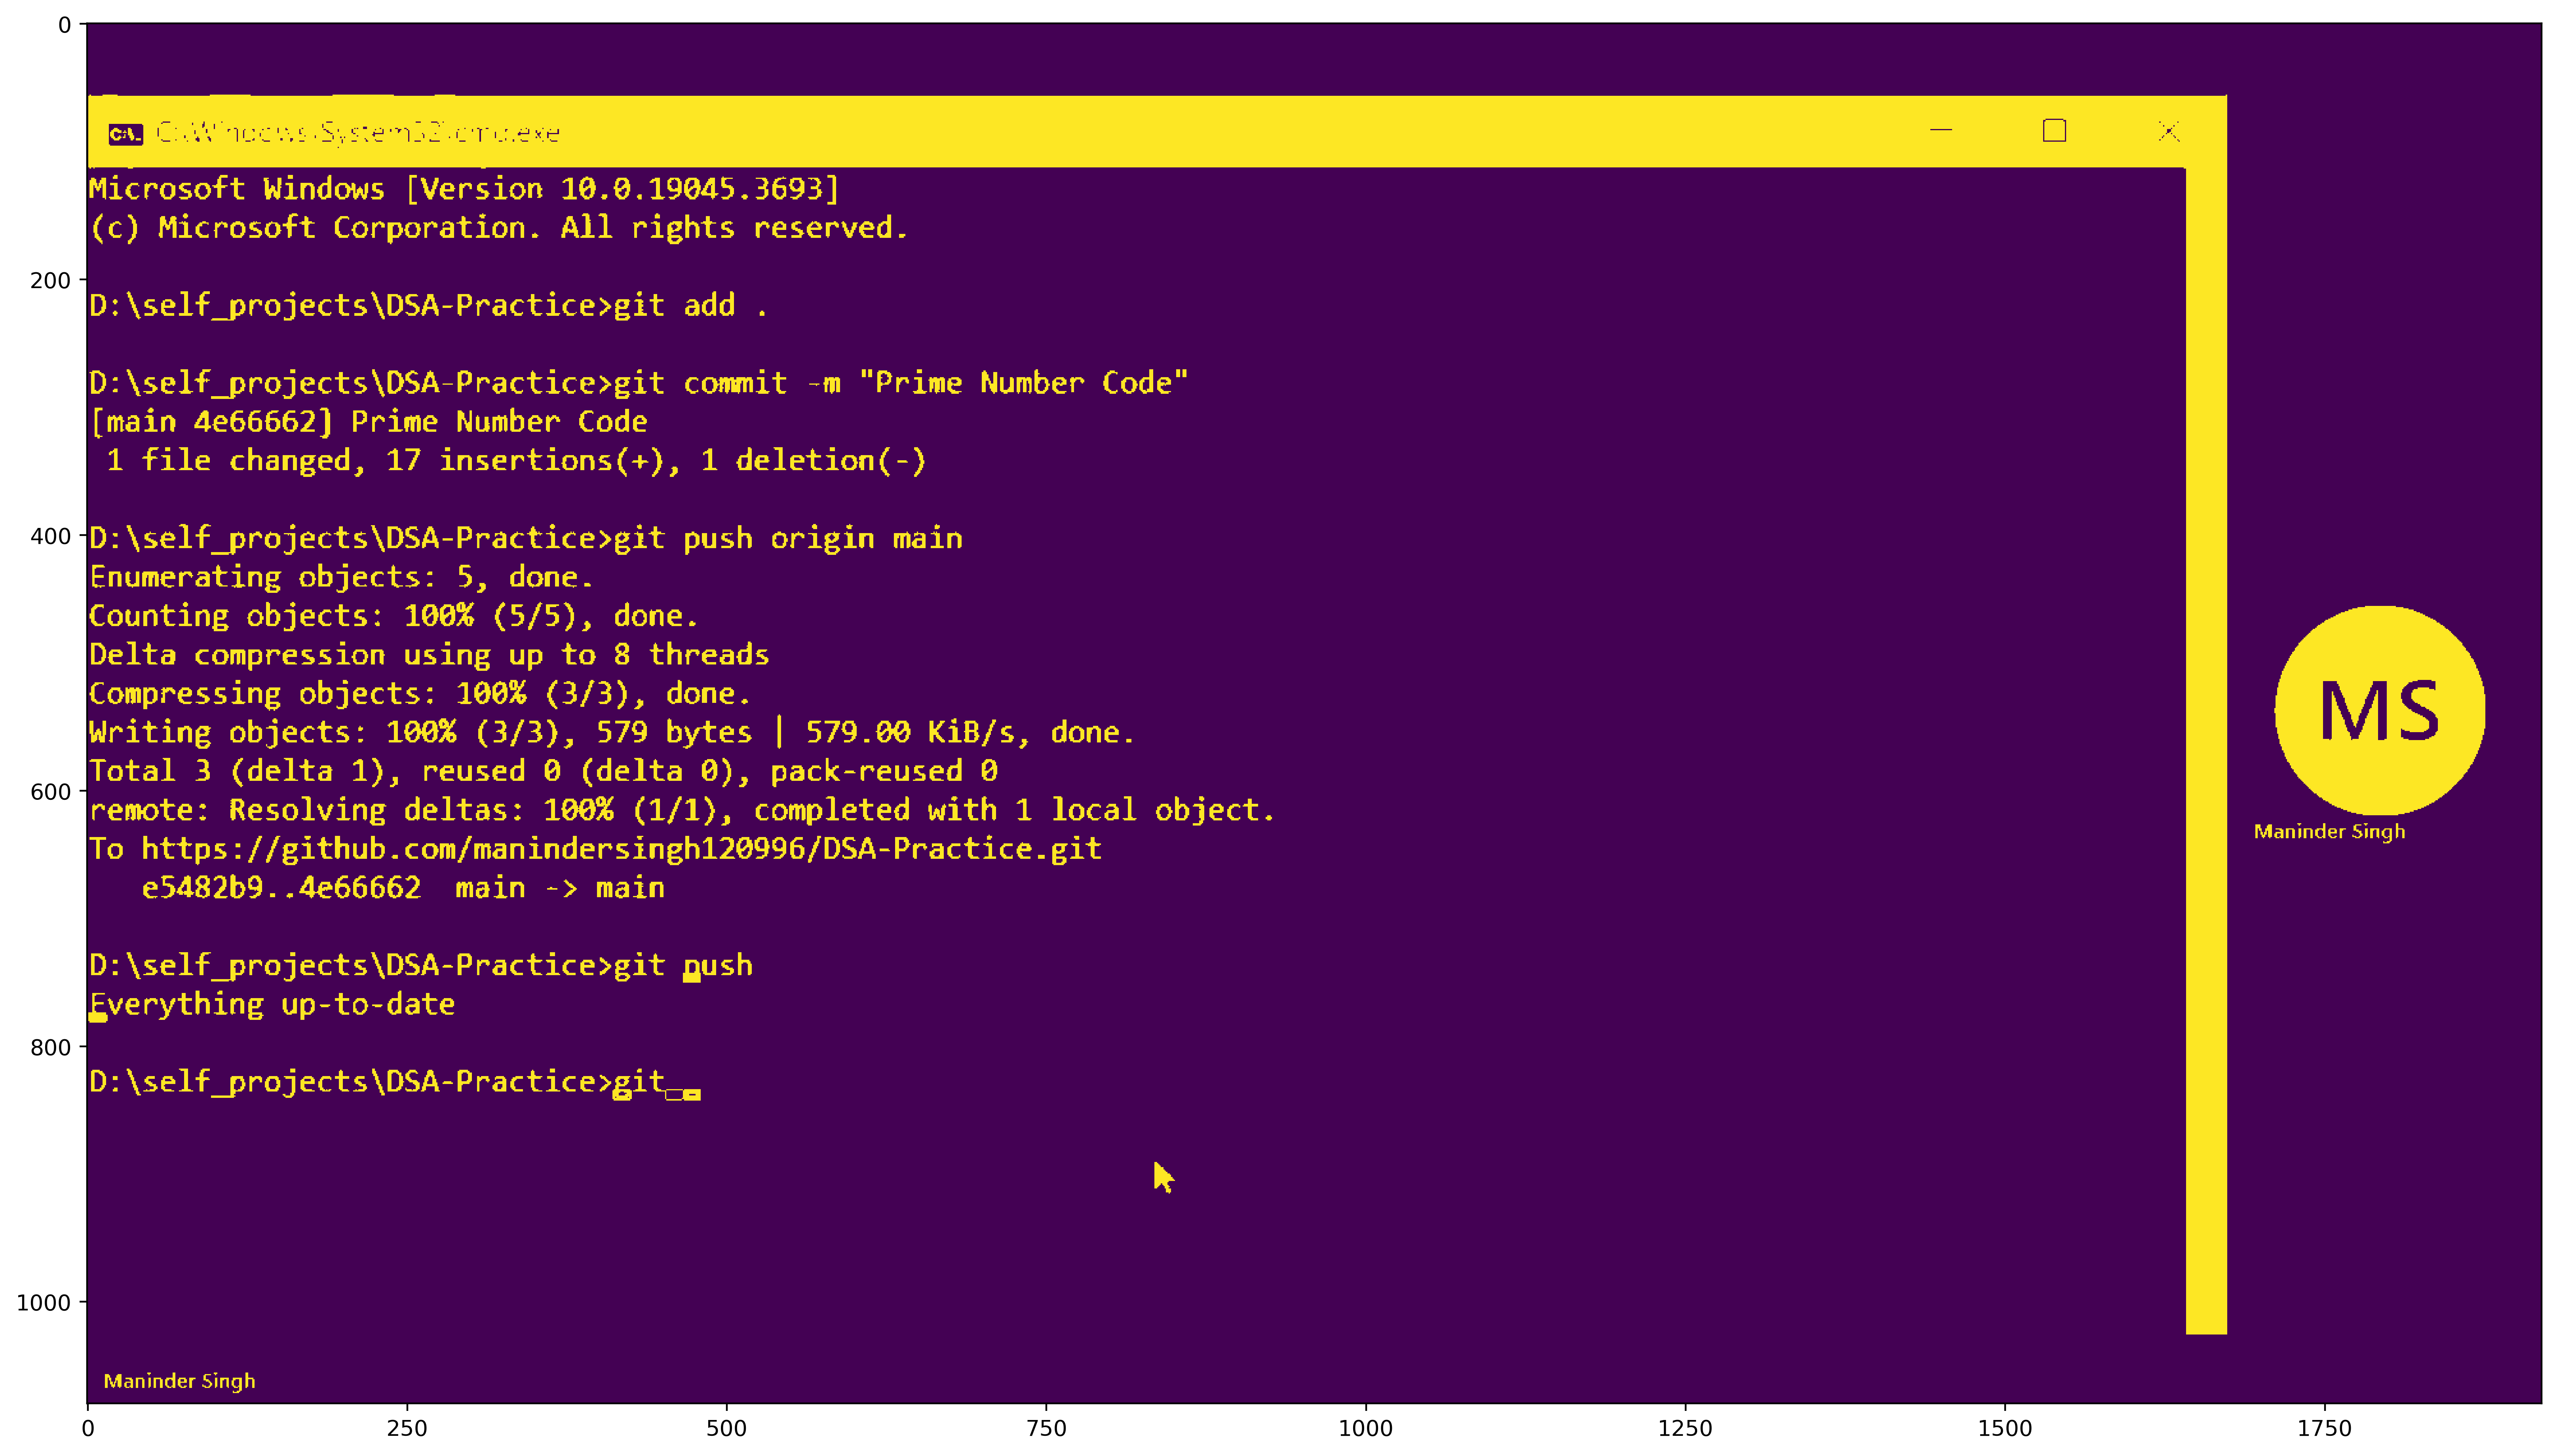

frame mergeing number elseif: 16, 17  
Difference Percentage : 0.030671296296296297<0.5:True
else-while


frame mergeing number elseif: 17, 18  
Difference Percentage : 0.4168113425925926<0.5:True
else-while


frame mergeing number elseif: 18, 19  
Difference Percentage : 4.551070601851852<0.5:False
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
18
./image_frames/21.png ./image_frames/22.png
Difference Percentage : 4.551070601851852<0.5:False
19
./image_frames/22.png ./image_frames/23.png
Difference Percentage : 3.4956597222222223<0.5:False
20
./image_frames/23.png ./image_frames/24.png
Difference Percentage : 1.8775559413580247<0.5:False
21
./image_frames/24.png ./image_frames/25.png
Difference Percentage : 0.00038580246913580245<0.5:True
else:   ./image_frames/24.png ./image_frames/25.png


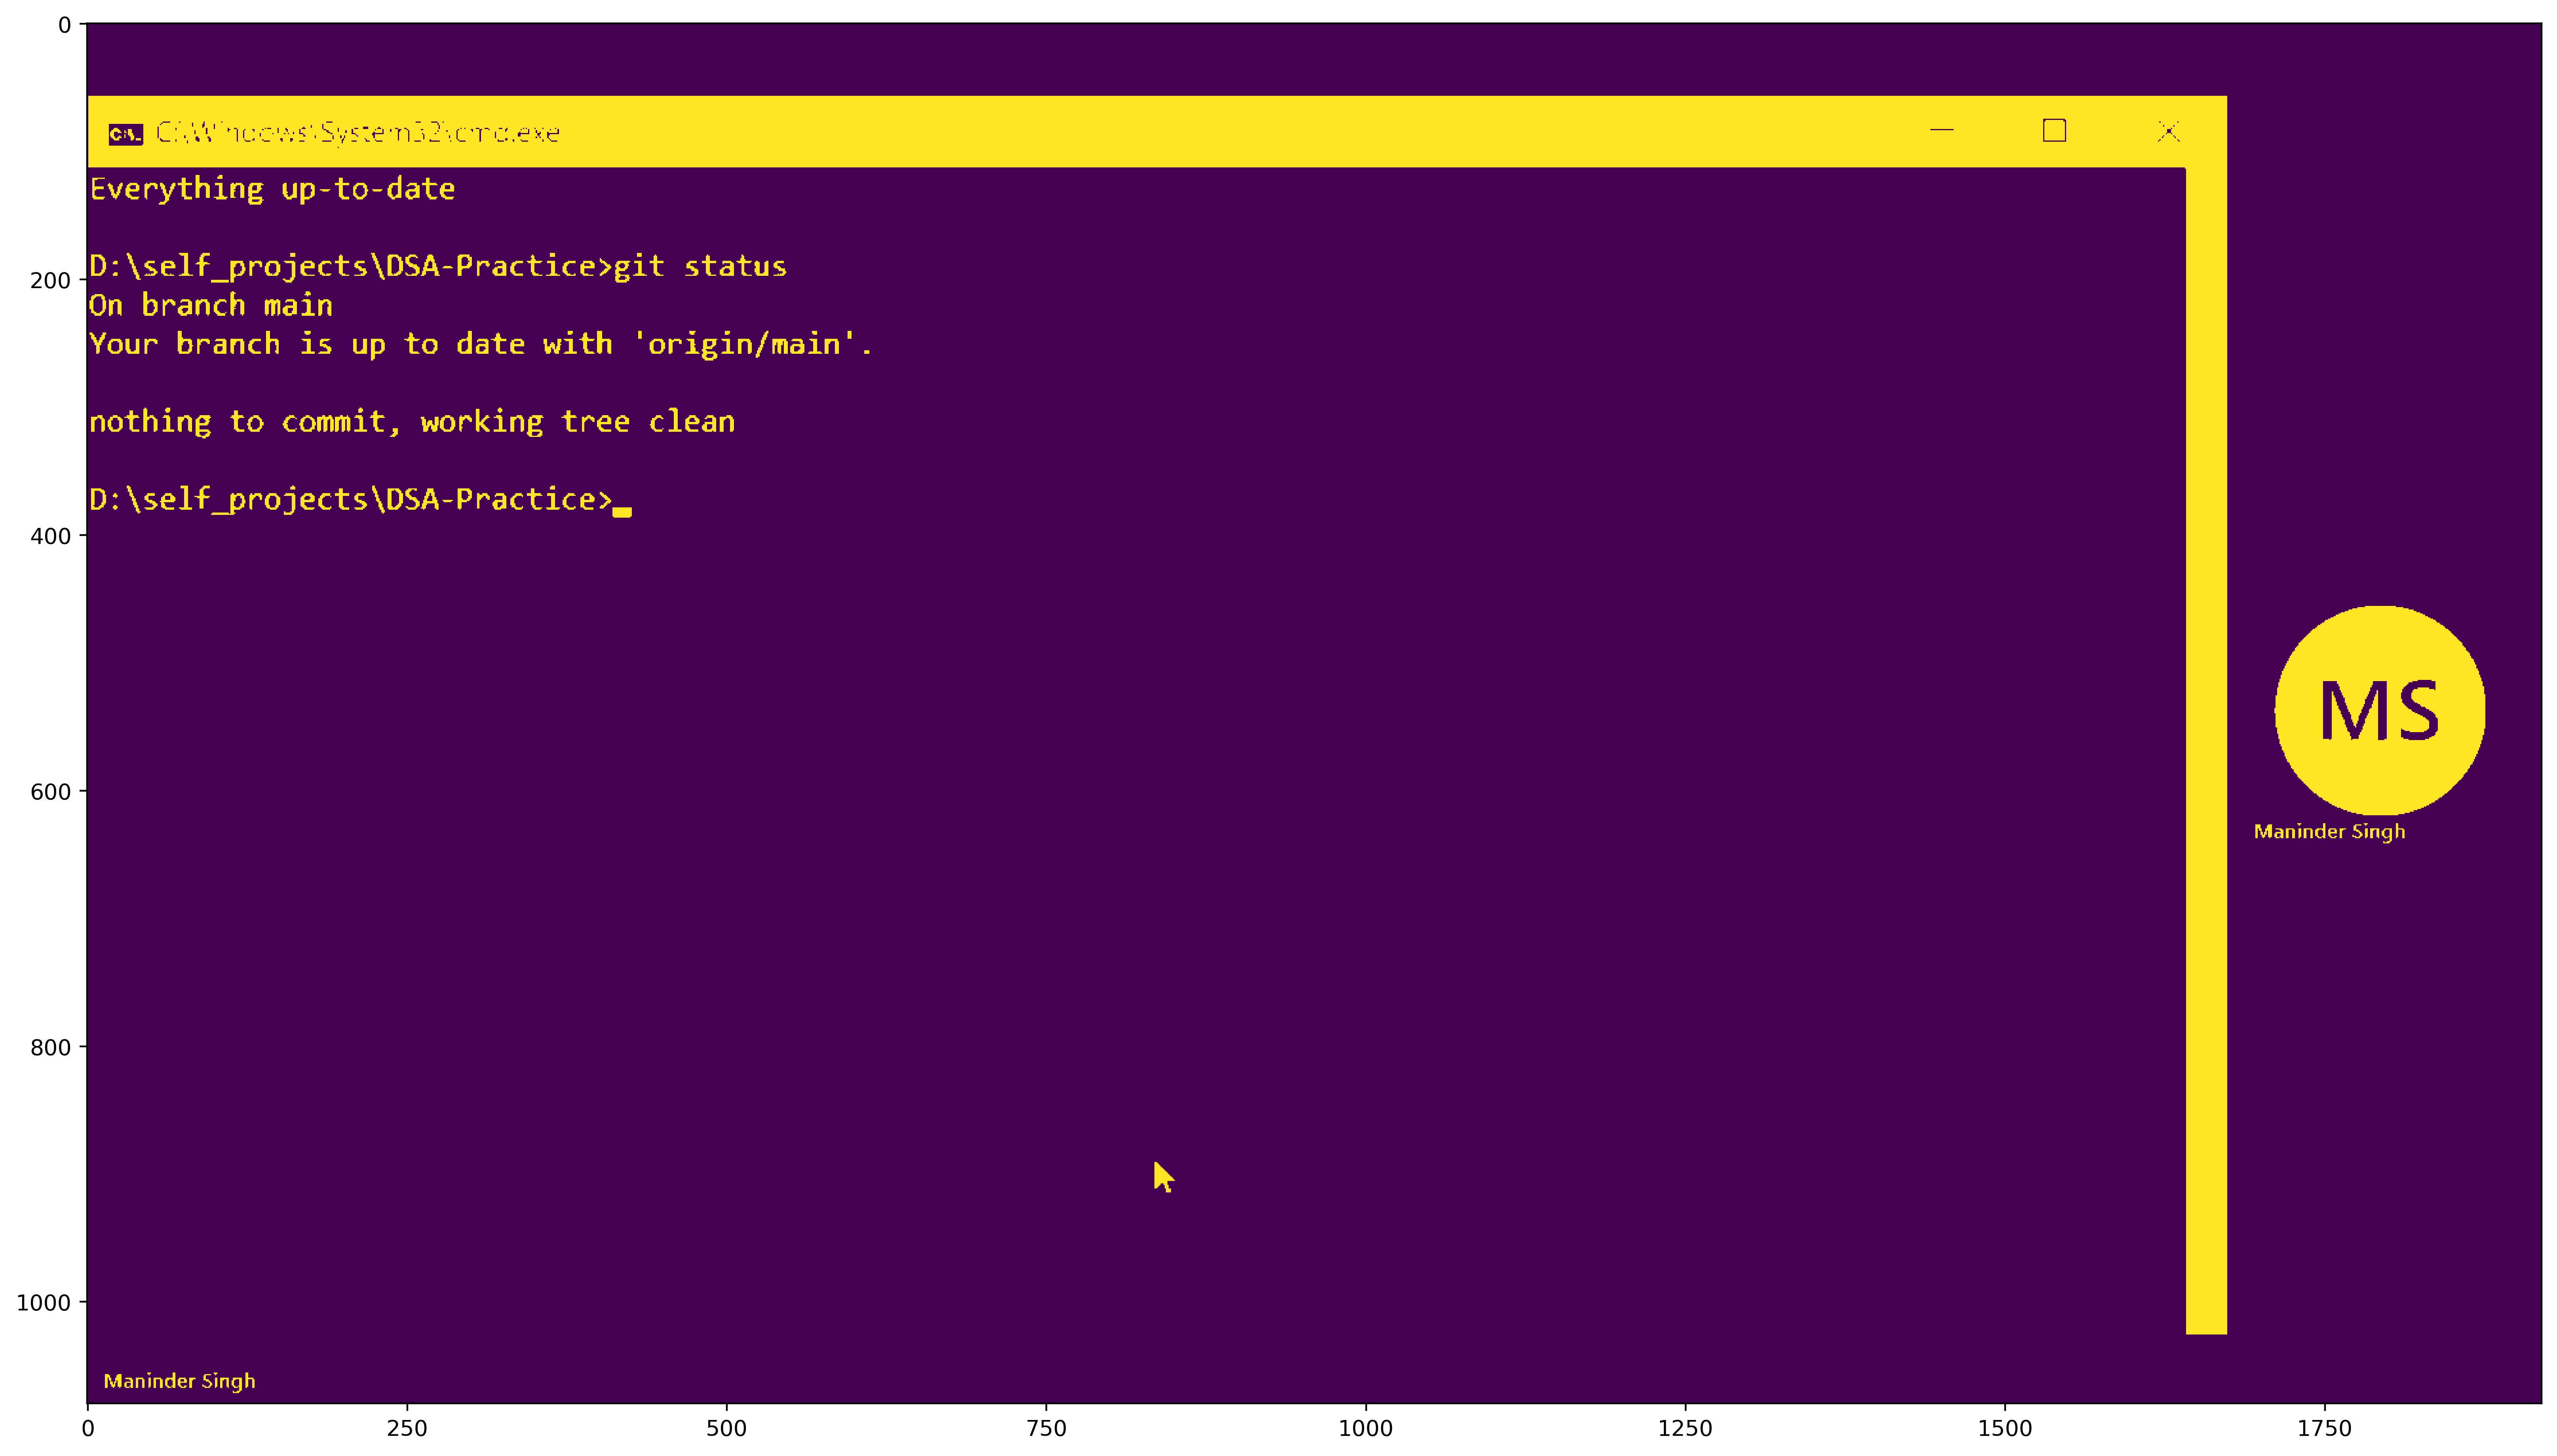

Difference Percentage : 4.8225308641975306e-05<0.5:True
Difference Percentage : 4.8225308641975306e-05<0.5:True
else-while


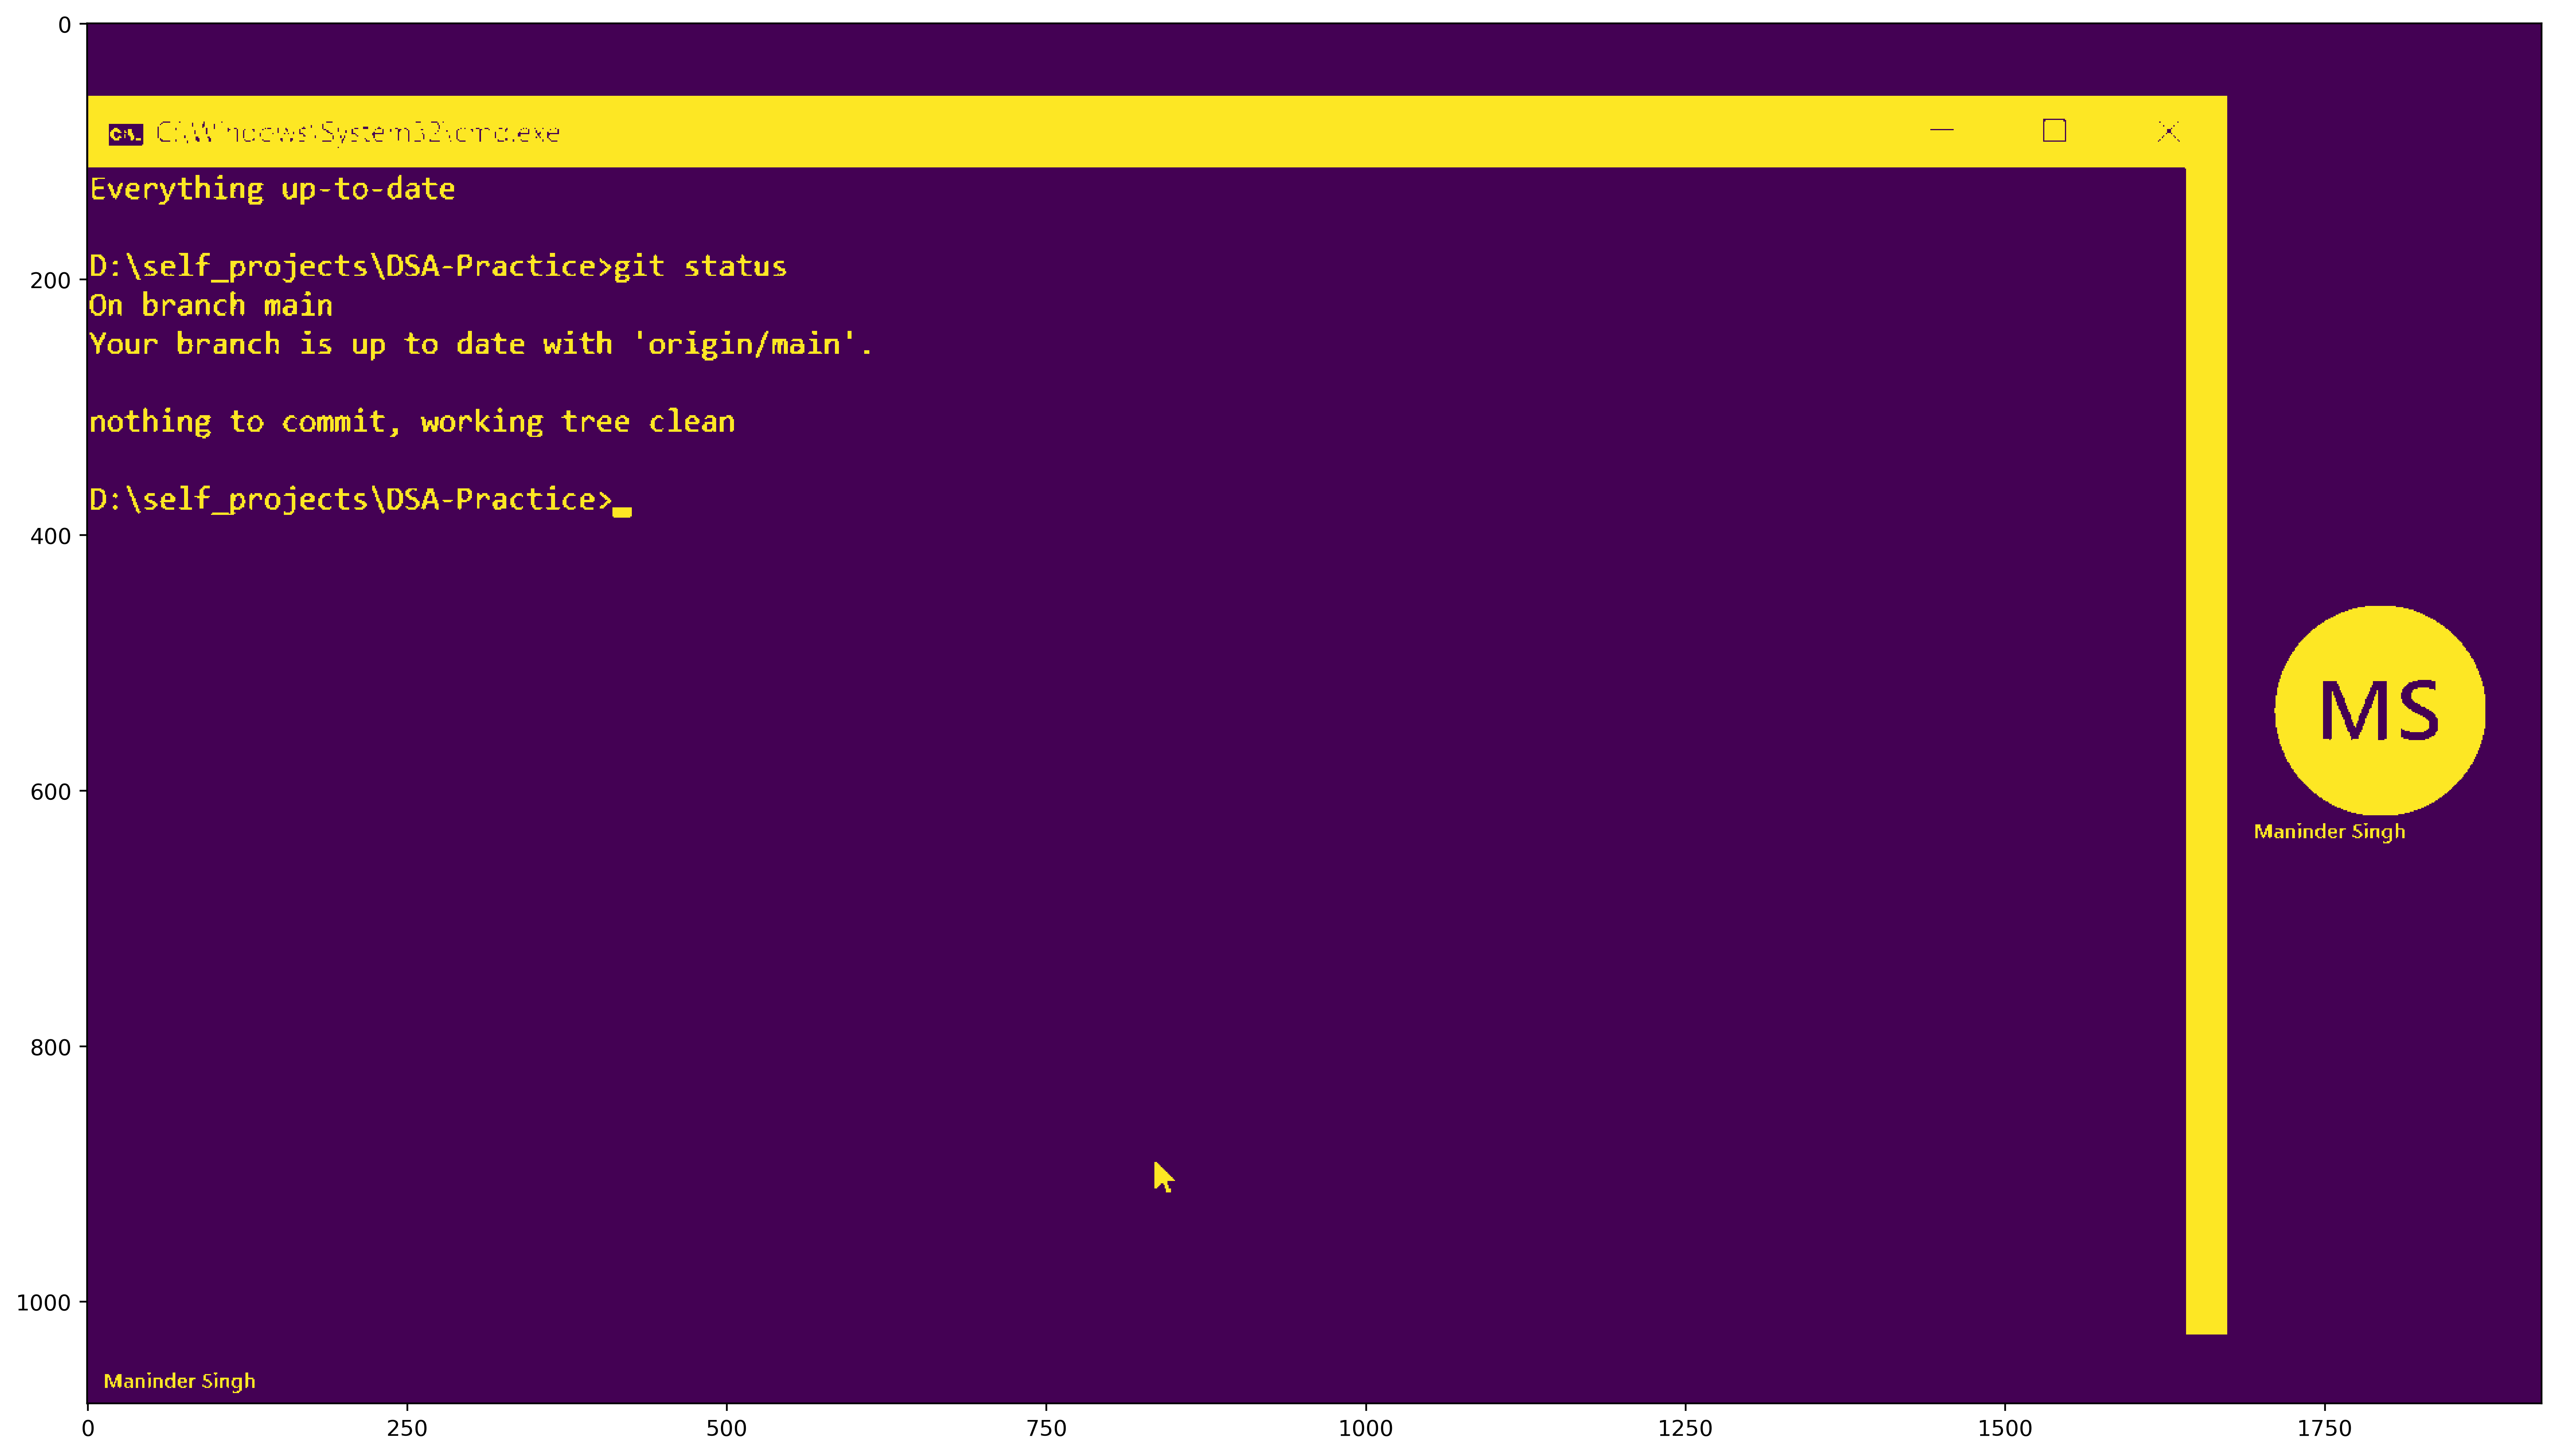

frame mergeing number elseif: 23, 24  
Difference Percentage : 0.019000771604938273<0.5:True
else-while


frame mergeing number elseif: 24, 25  
Difference Percentage : 0.02850115740740741<0.5:True
else-while


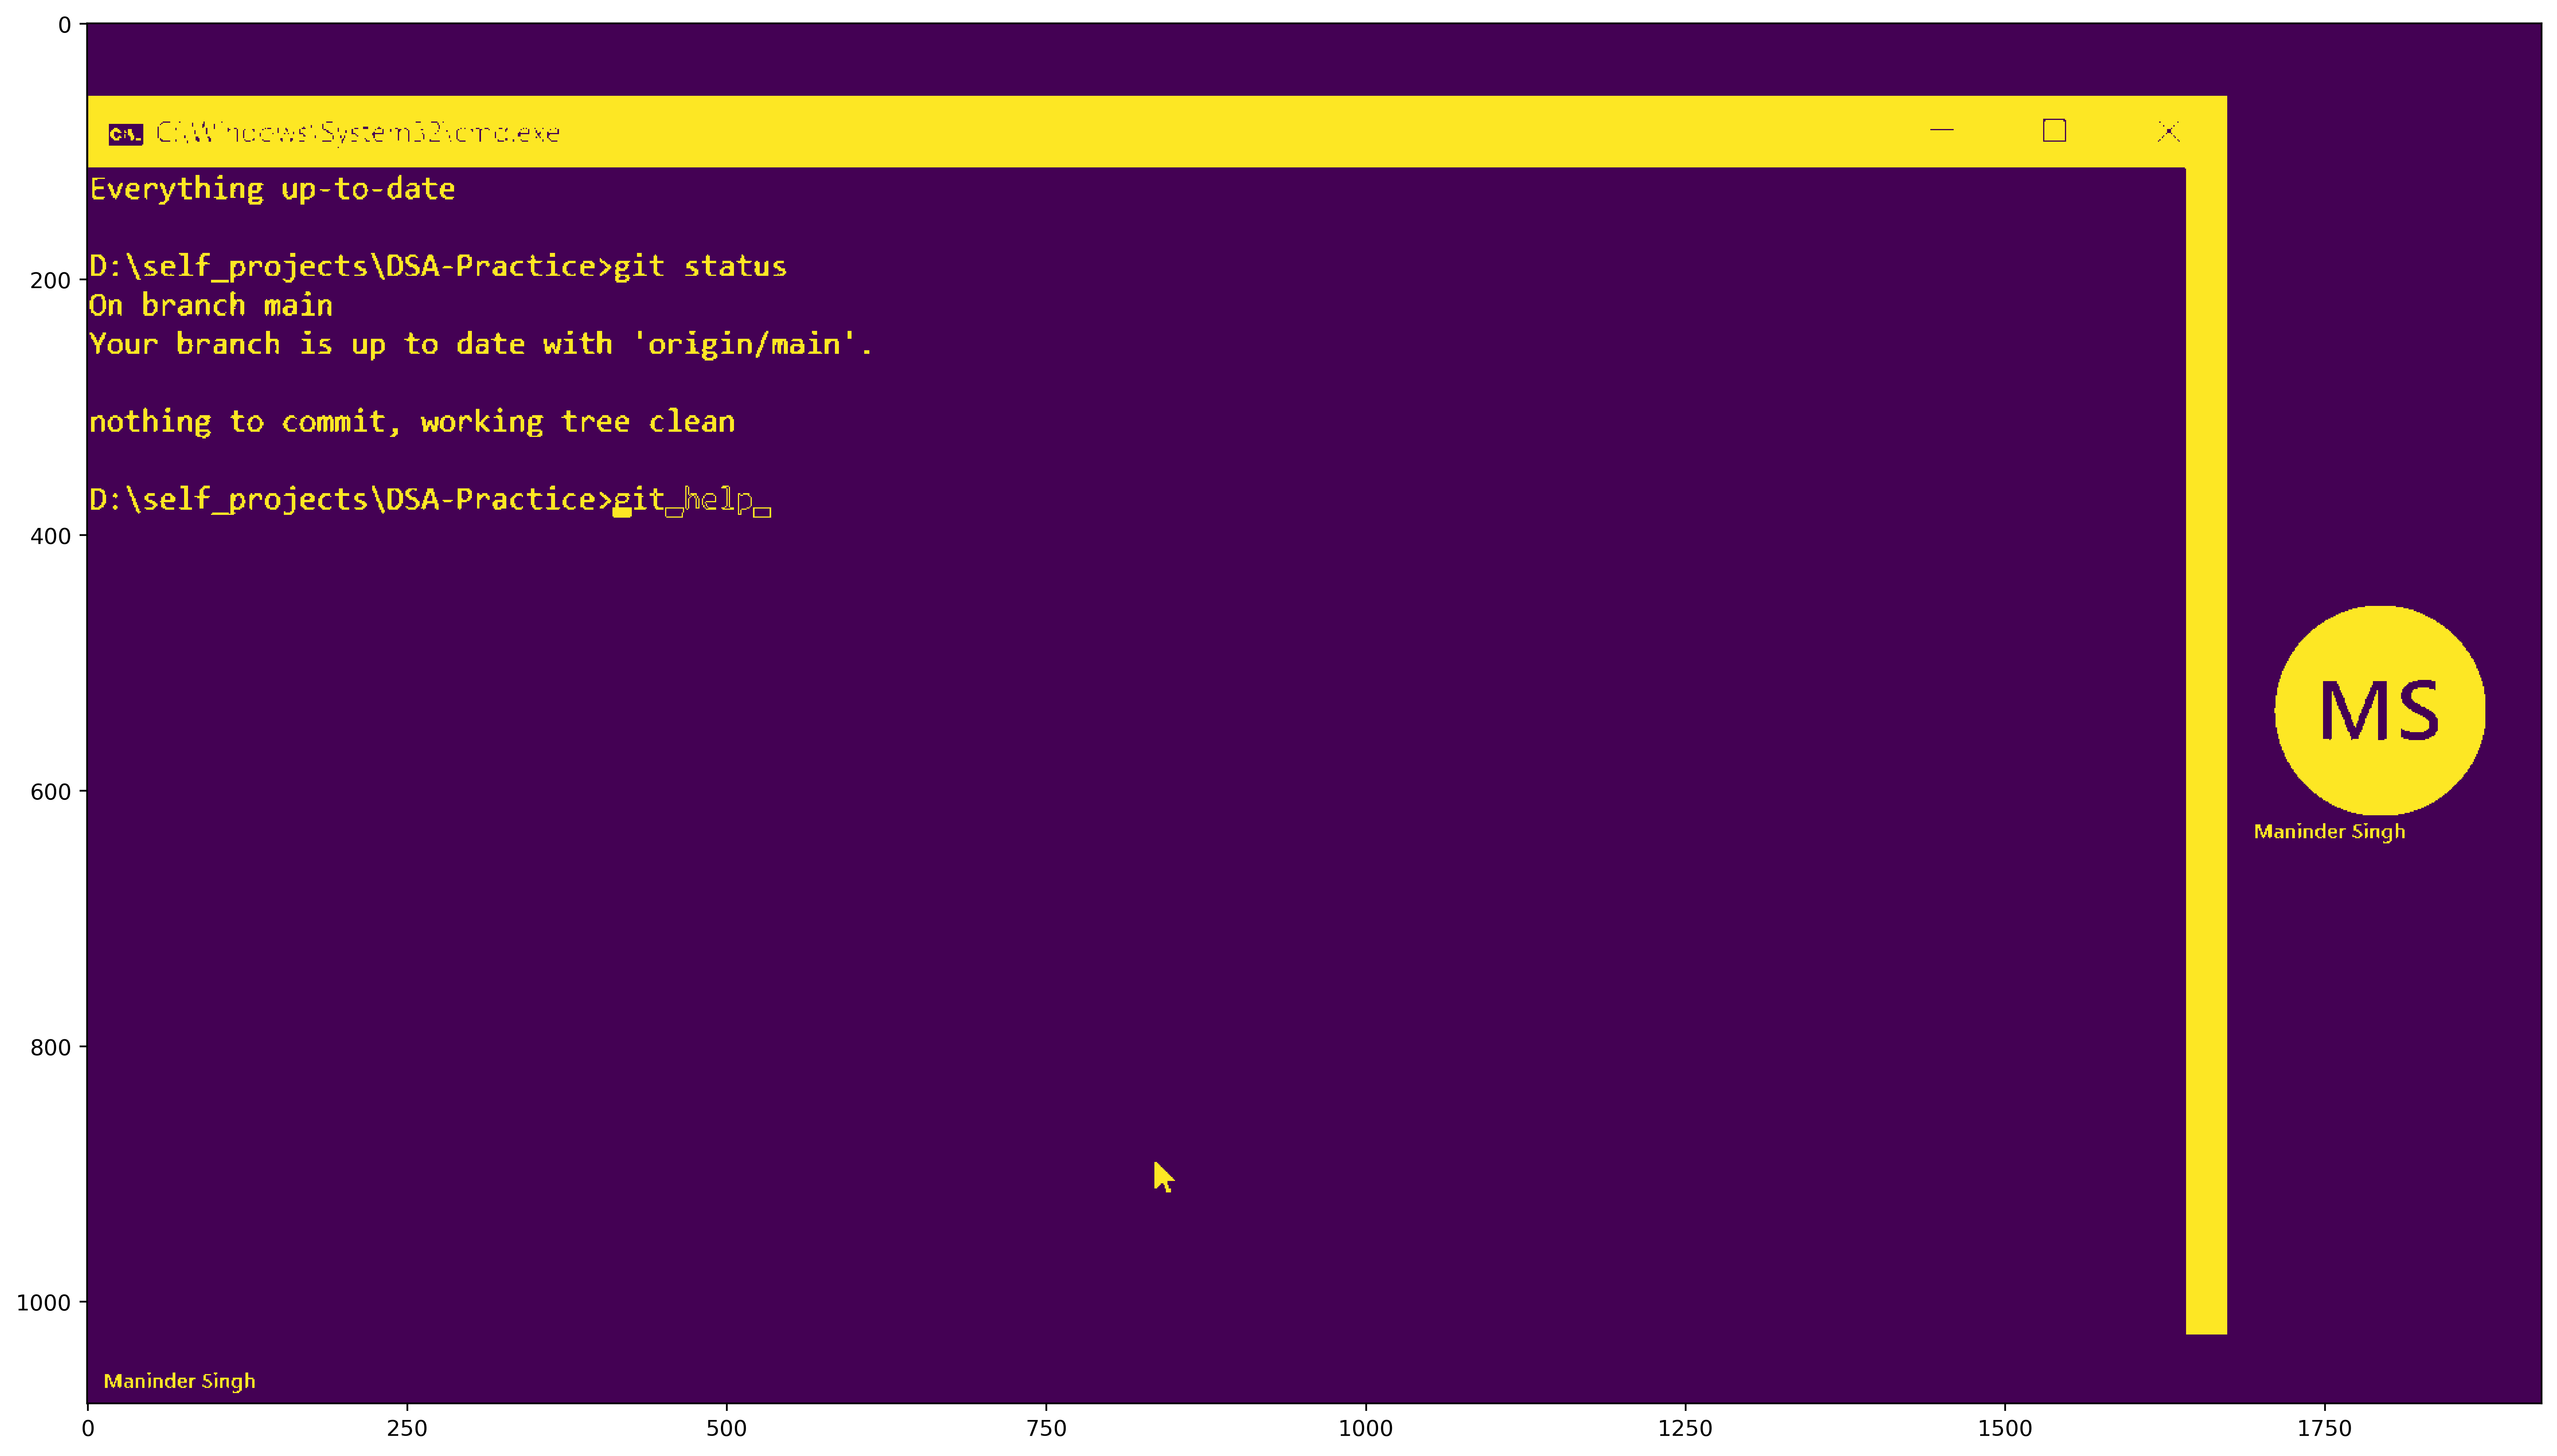

frame mergeing number elseif: 25, 26  
Difference Percentage : 4.1003086419753085<0.5:False
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
25
./image_frames/28.png ./image_frames/29.png
Difference Percentage : 4.1003086419753085<0.5:False
26
./image_frames/29.png ./image_frames/30.png
Difference Percentage : 0.1032986111111111<0.5:True
else:   ./image_frames/29.png ./image_frames/30.png


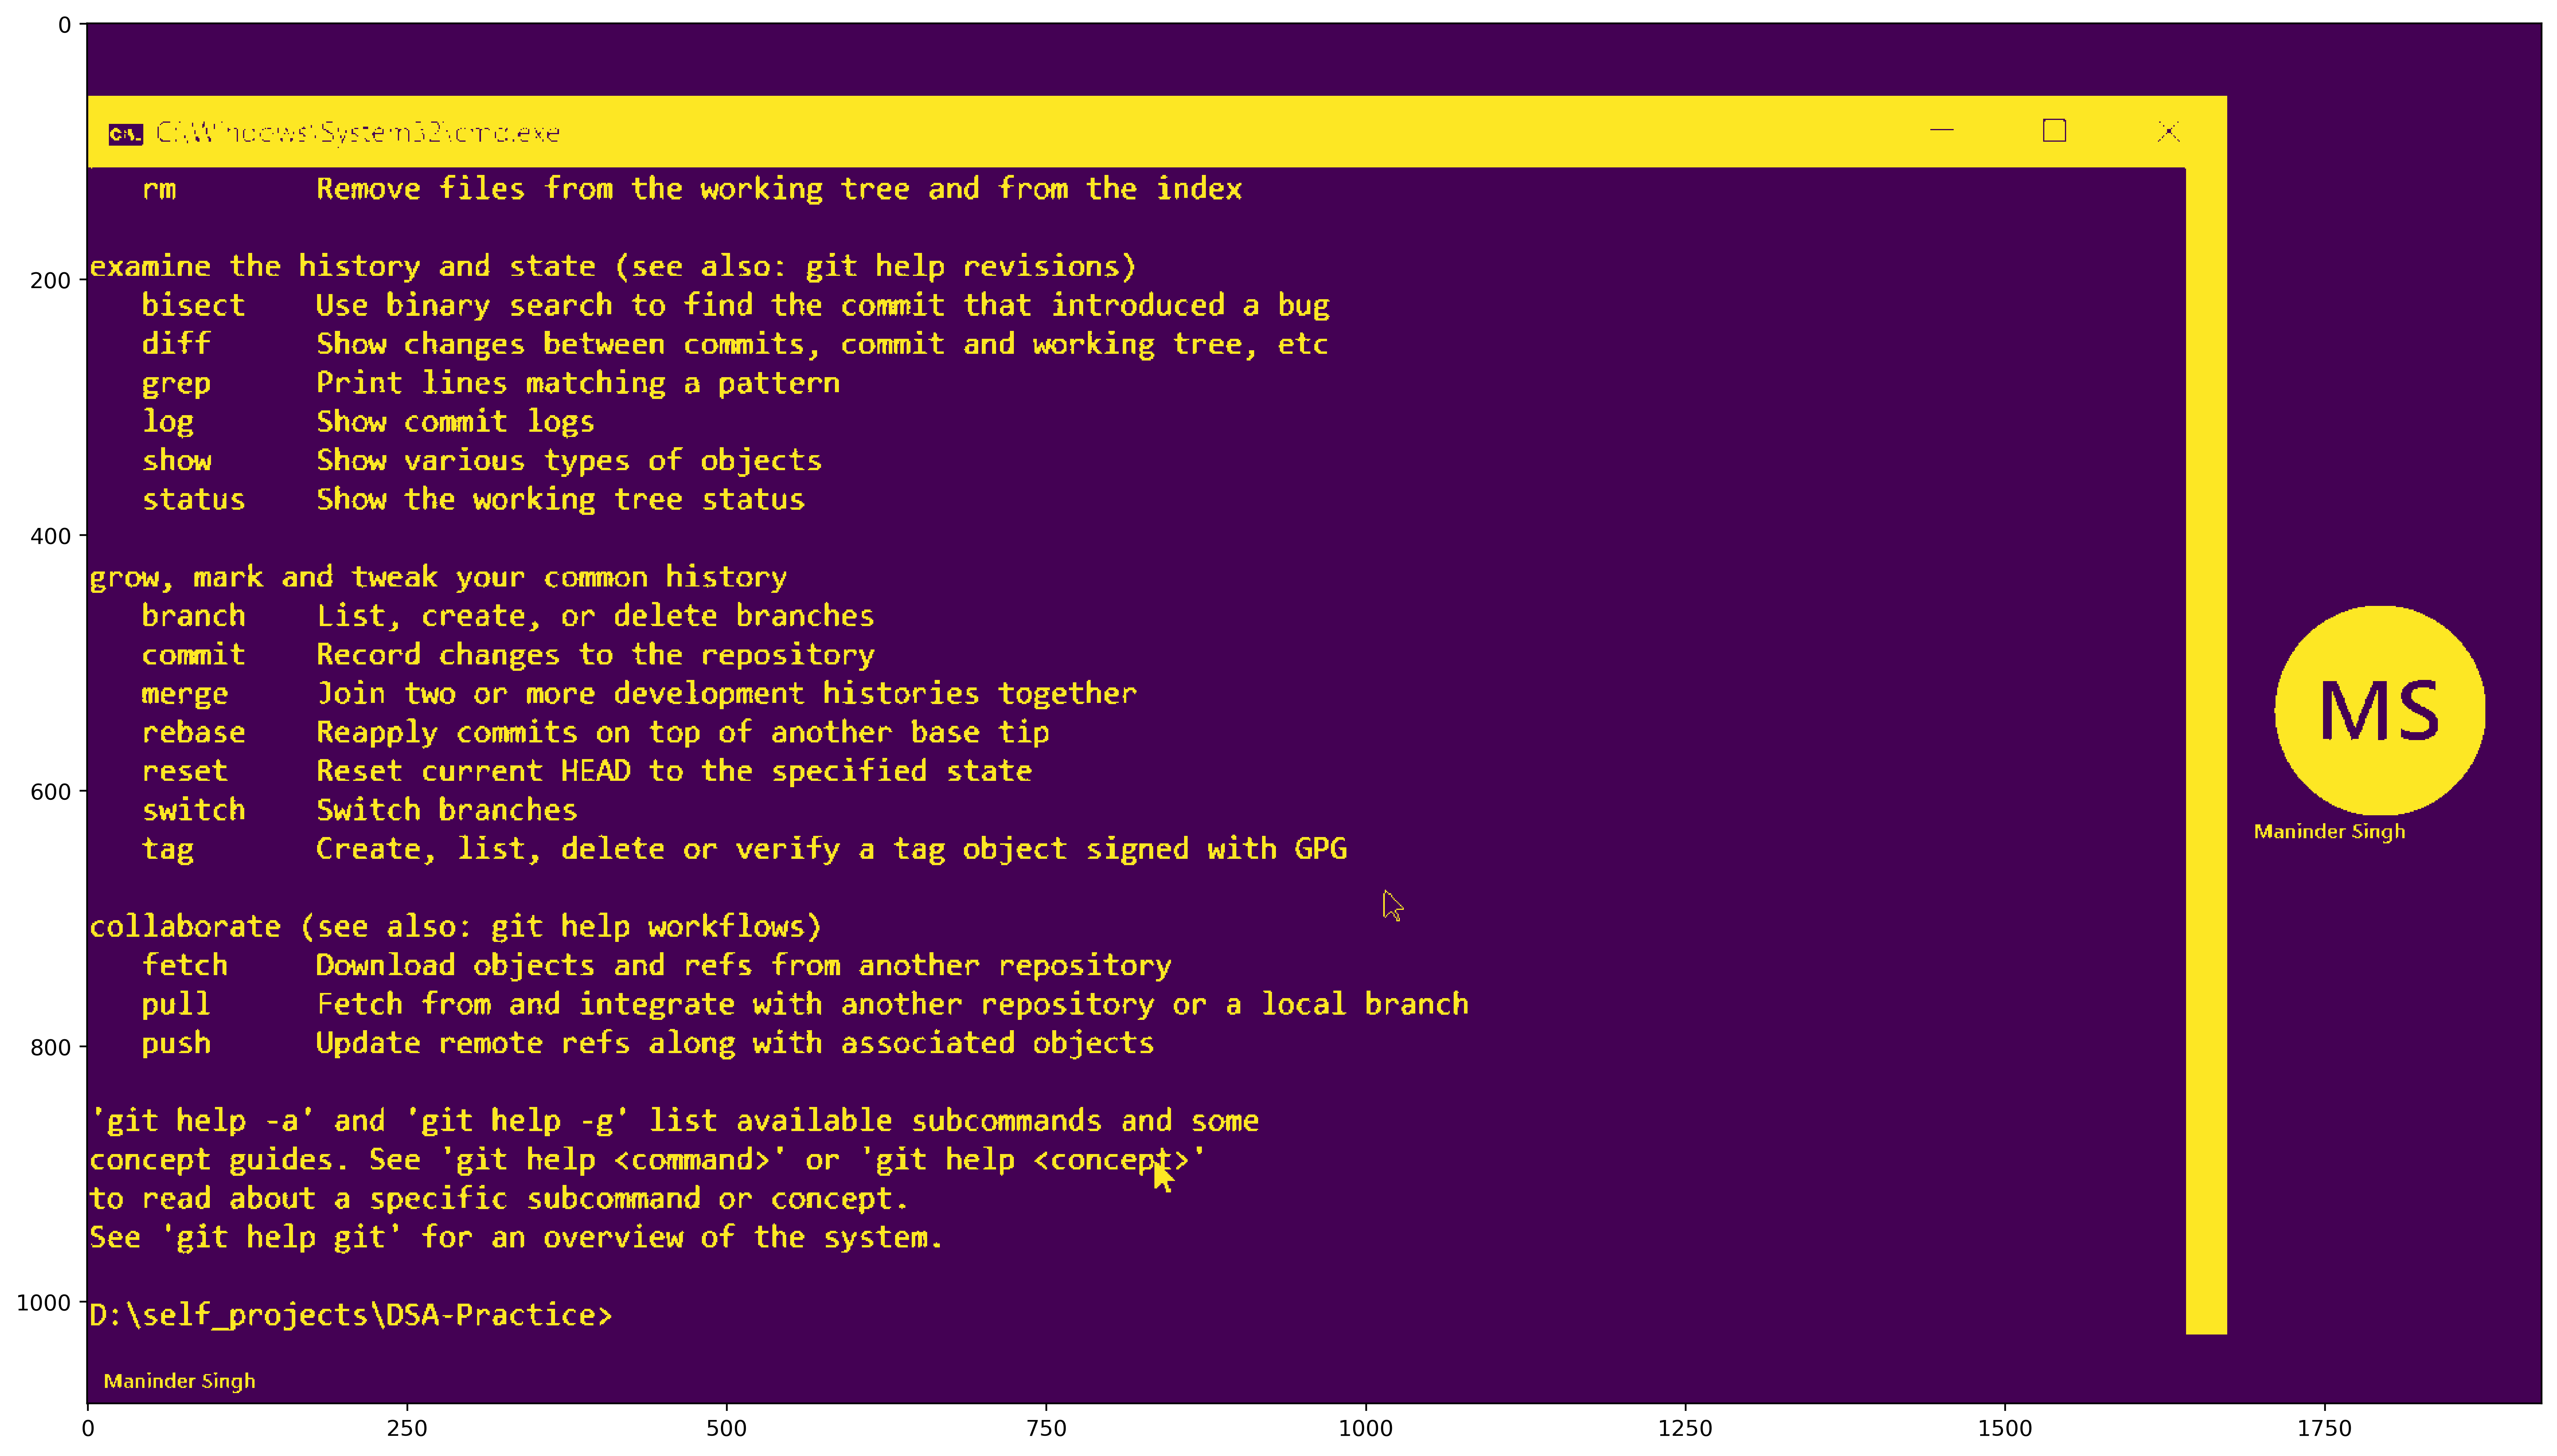

Difference Percentage : 0.05782214506172839<0.5:True
Difference Percentage : 0.05782214506172839<0.5:True
else-while


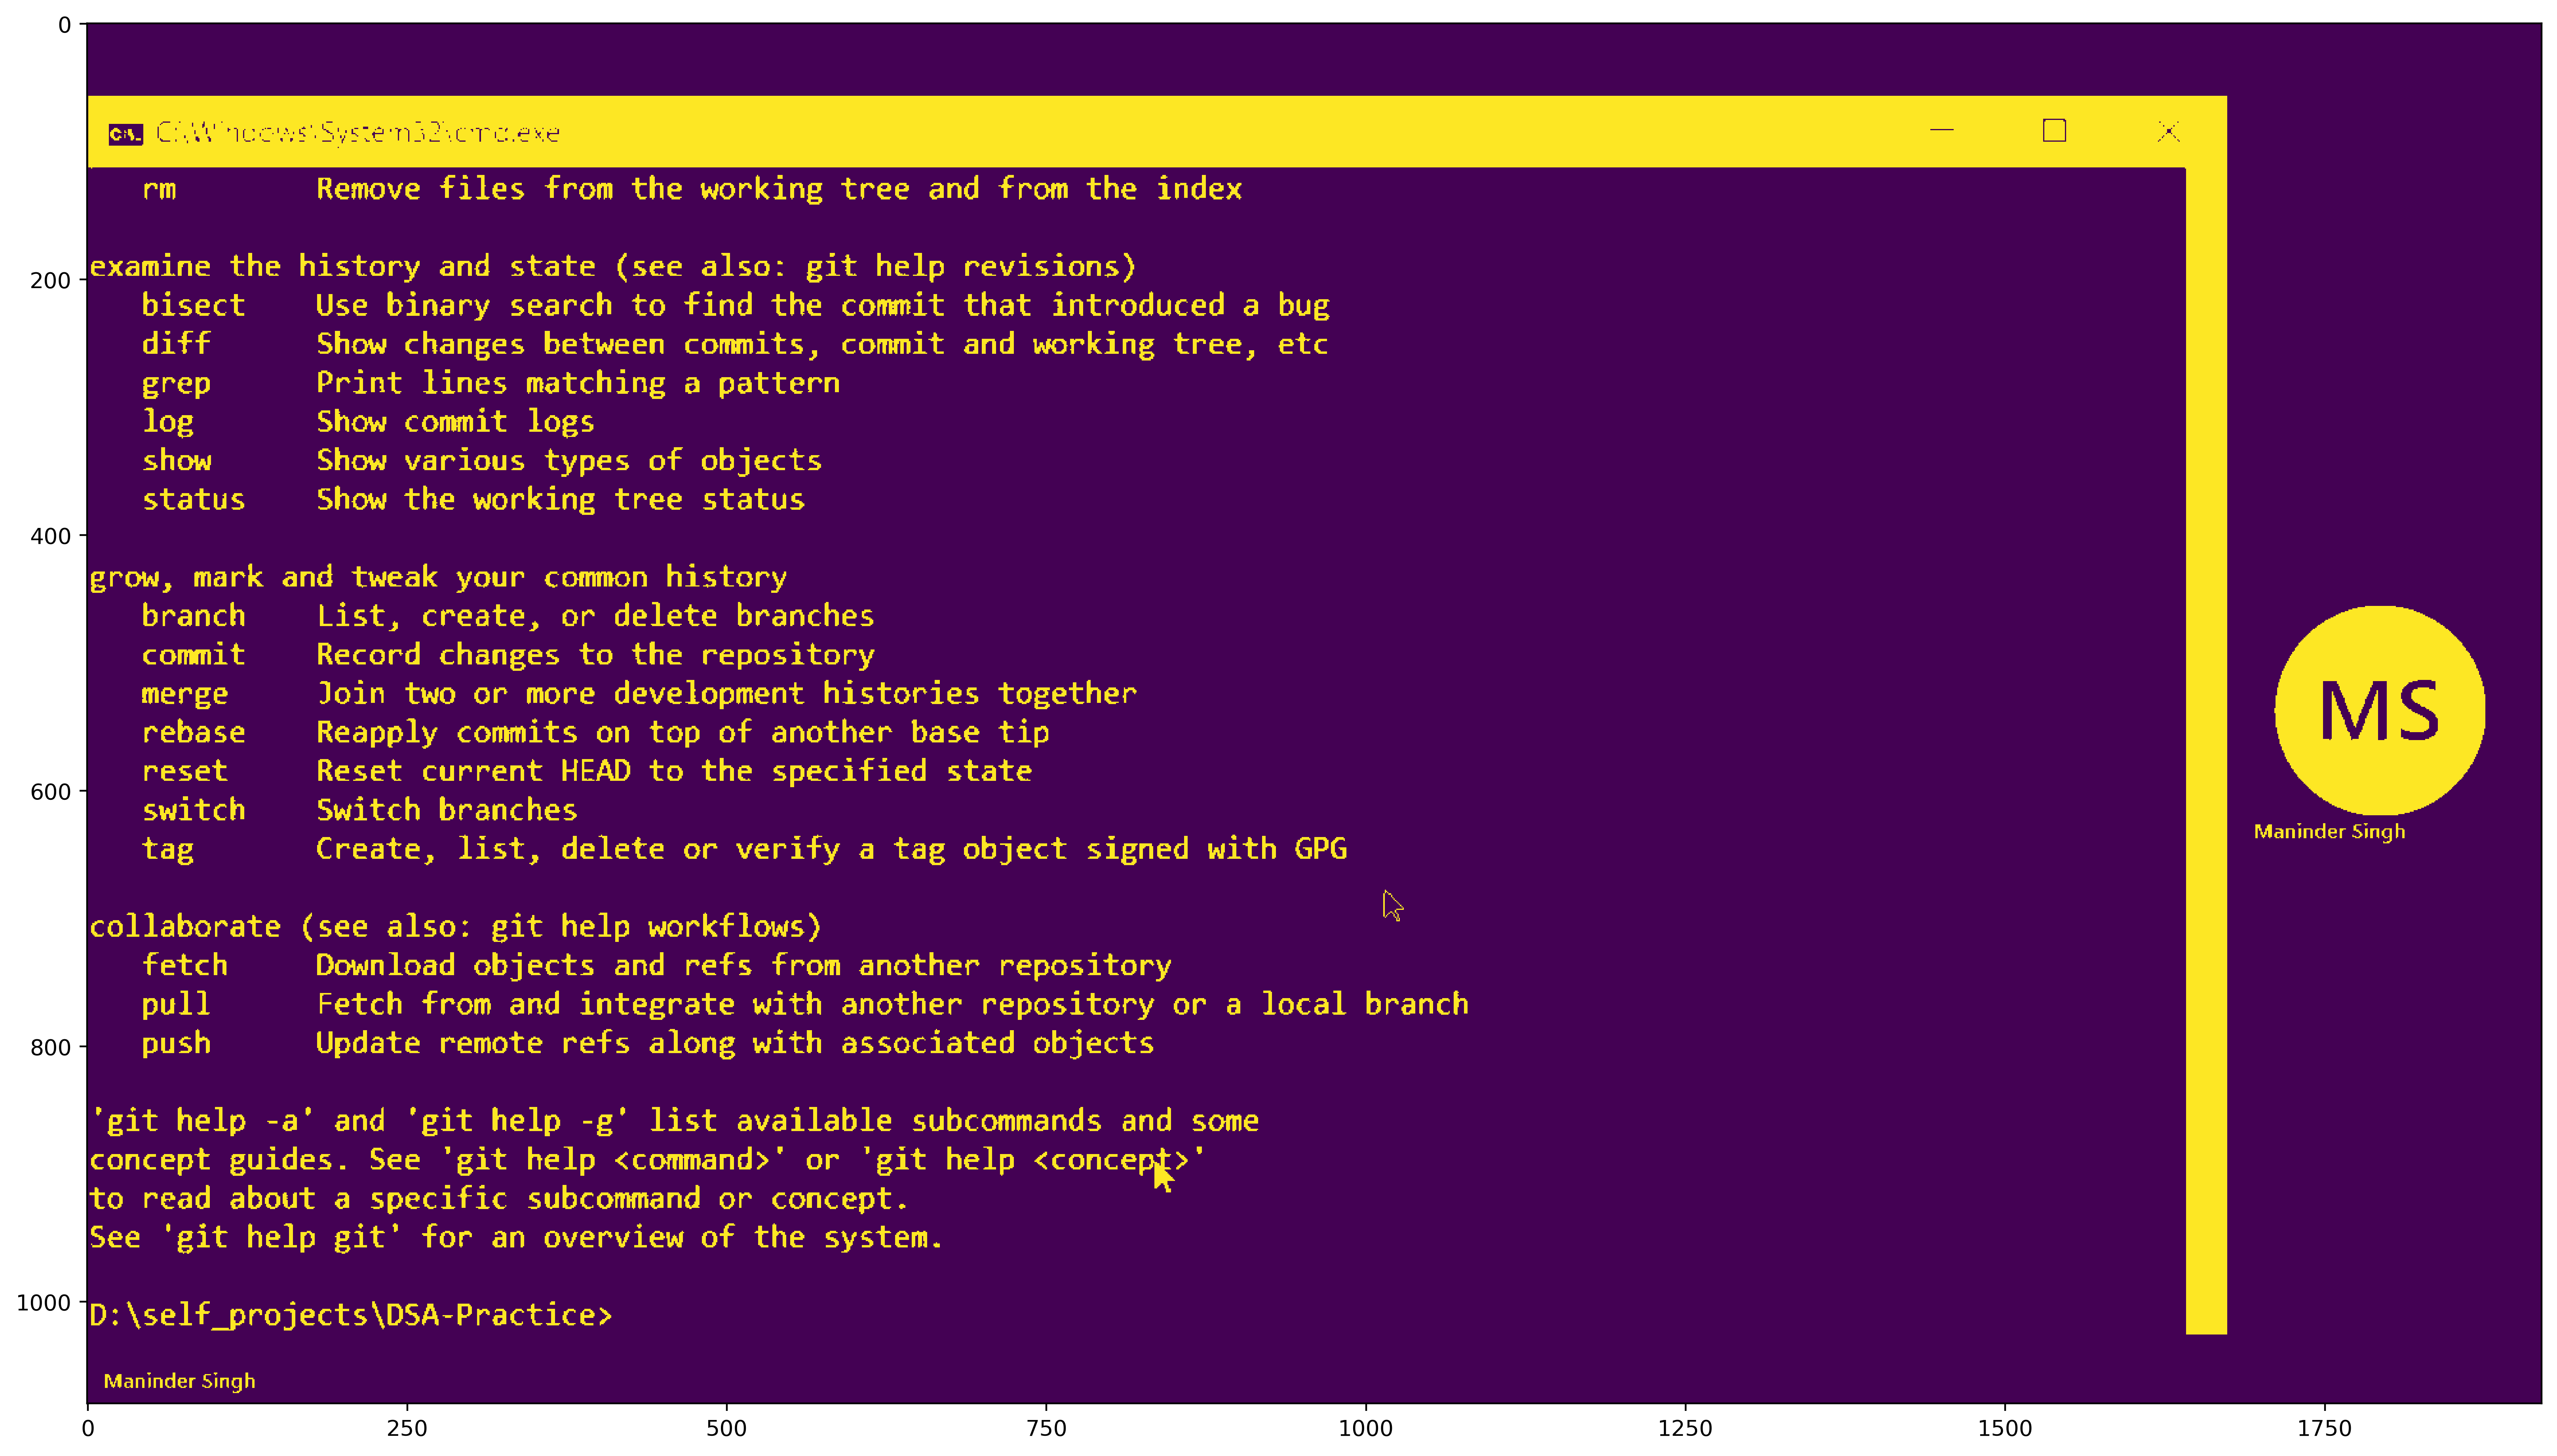

frame mergeing number elseif: 28, 29  
Difference Percentage : 13.090518904320987<0.5:False
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
28
./image_frames/31.png ./image_frames/32.png
Difference Percentage : 13.090518904320987<0.5:False
29
./image_frames/32.png ./image_frames/33.png
Difference Percentage : 0.0<0.5:True
else:   ./image_frames/32.png ./image_frames/33.png


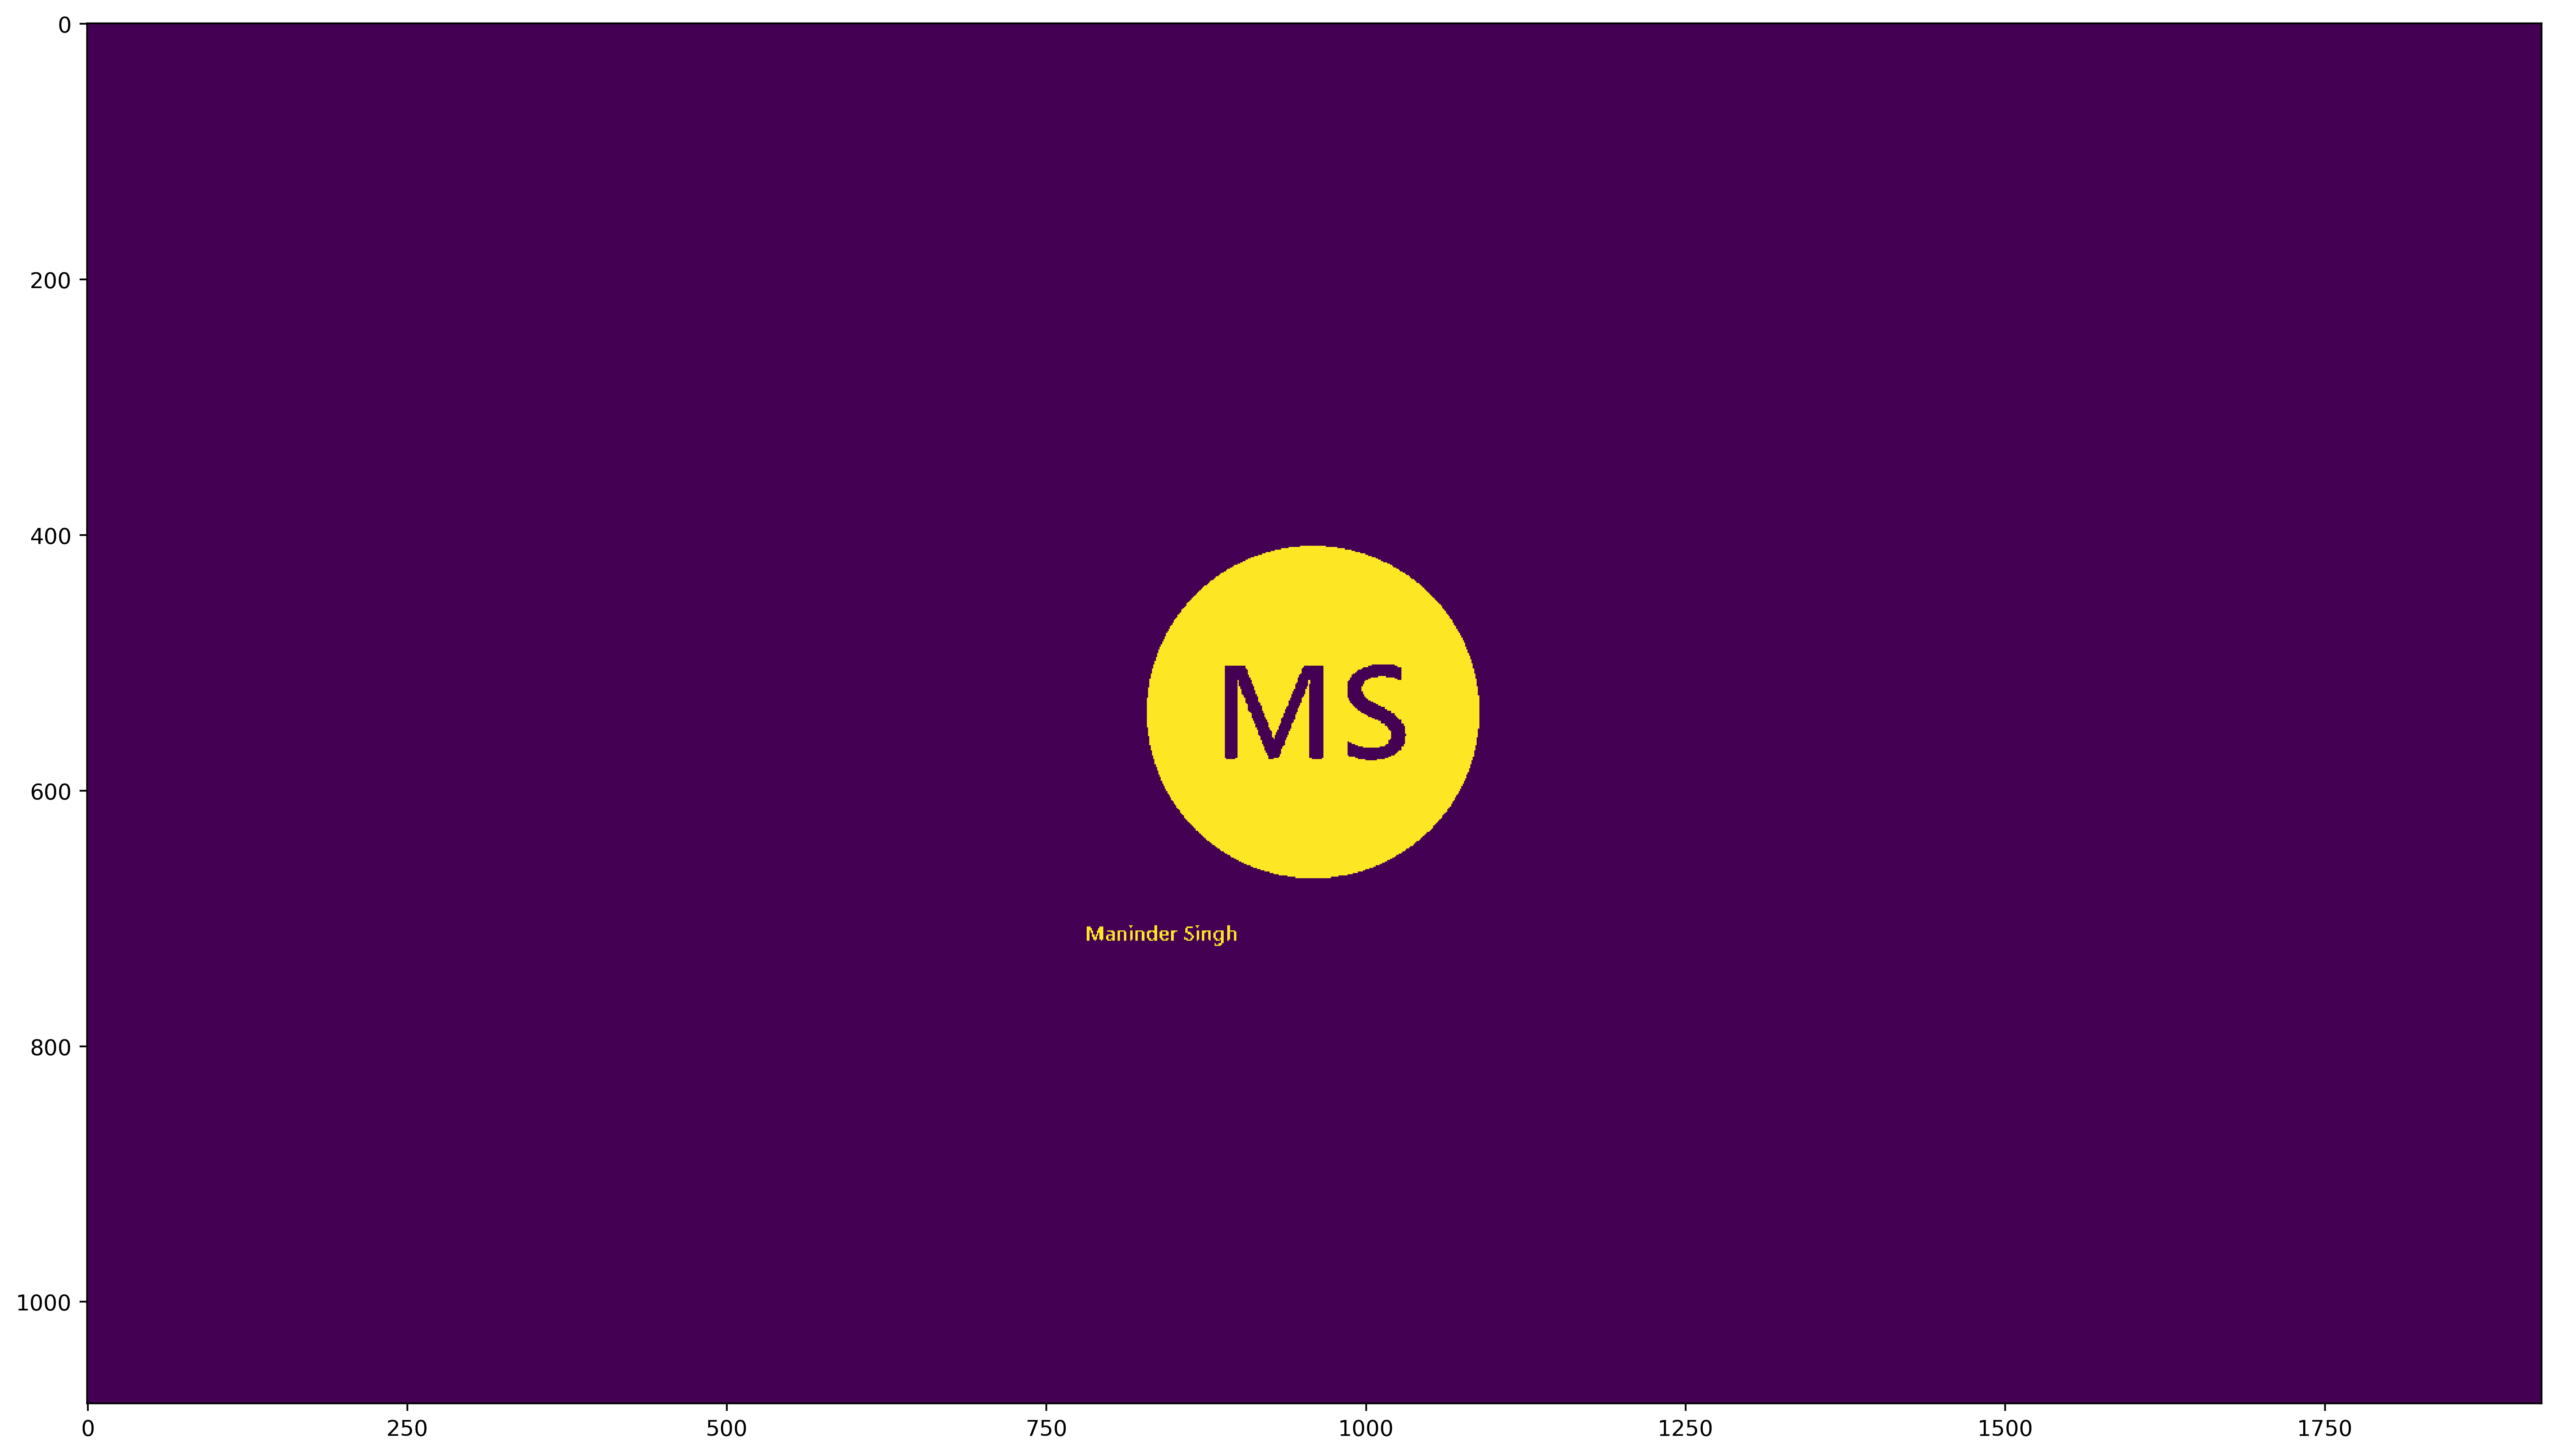

Difference Percentage : 0.0<0.5:True
Difference Percentage : 0.0<0.5:True
else-while


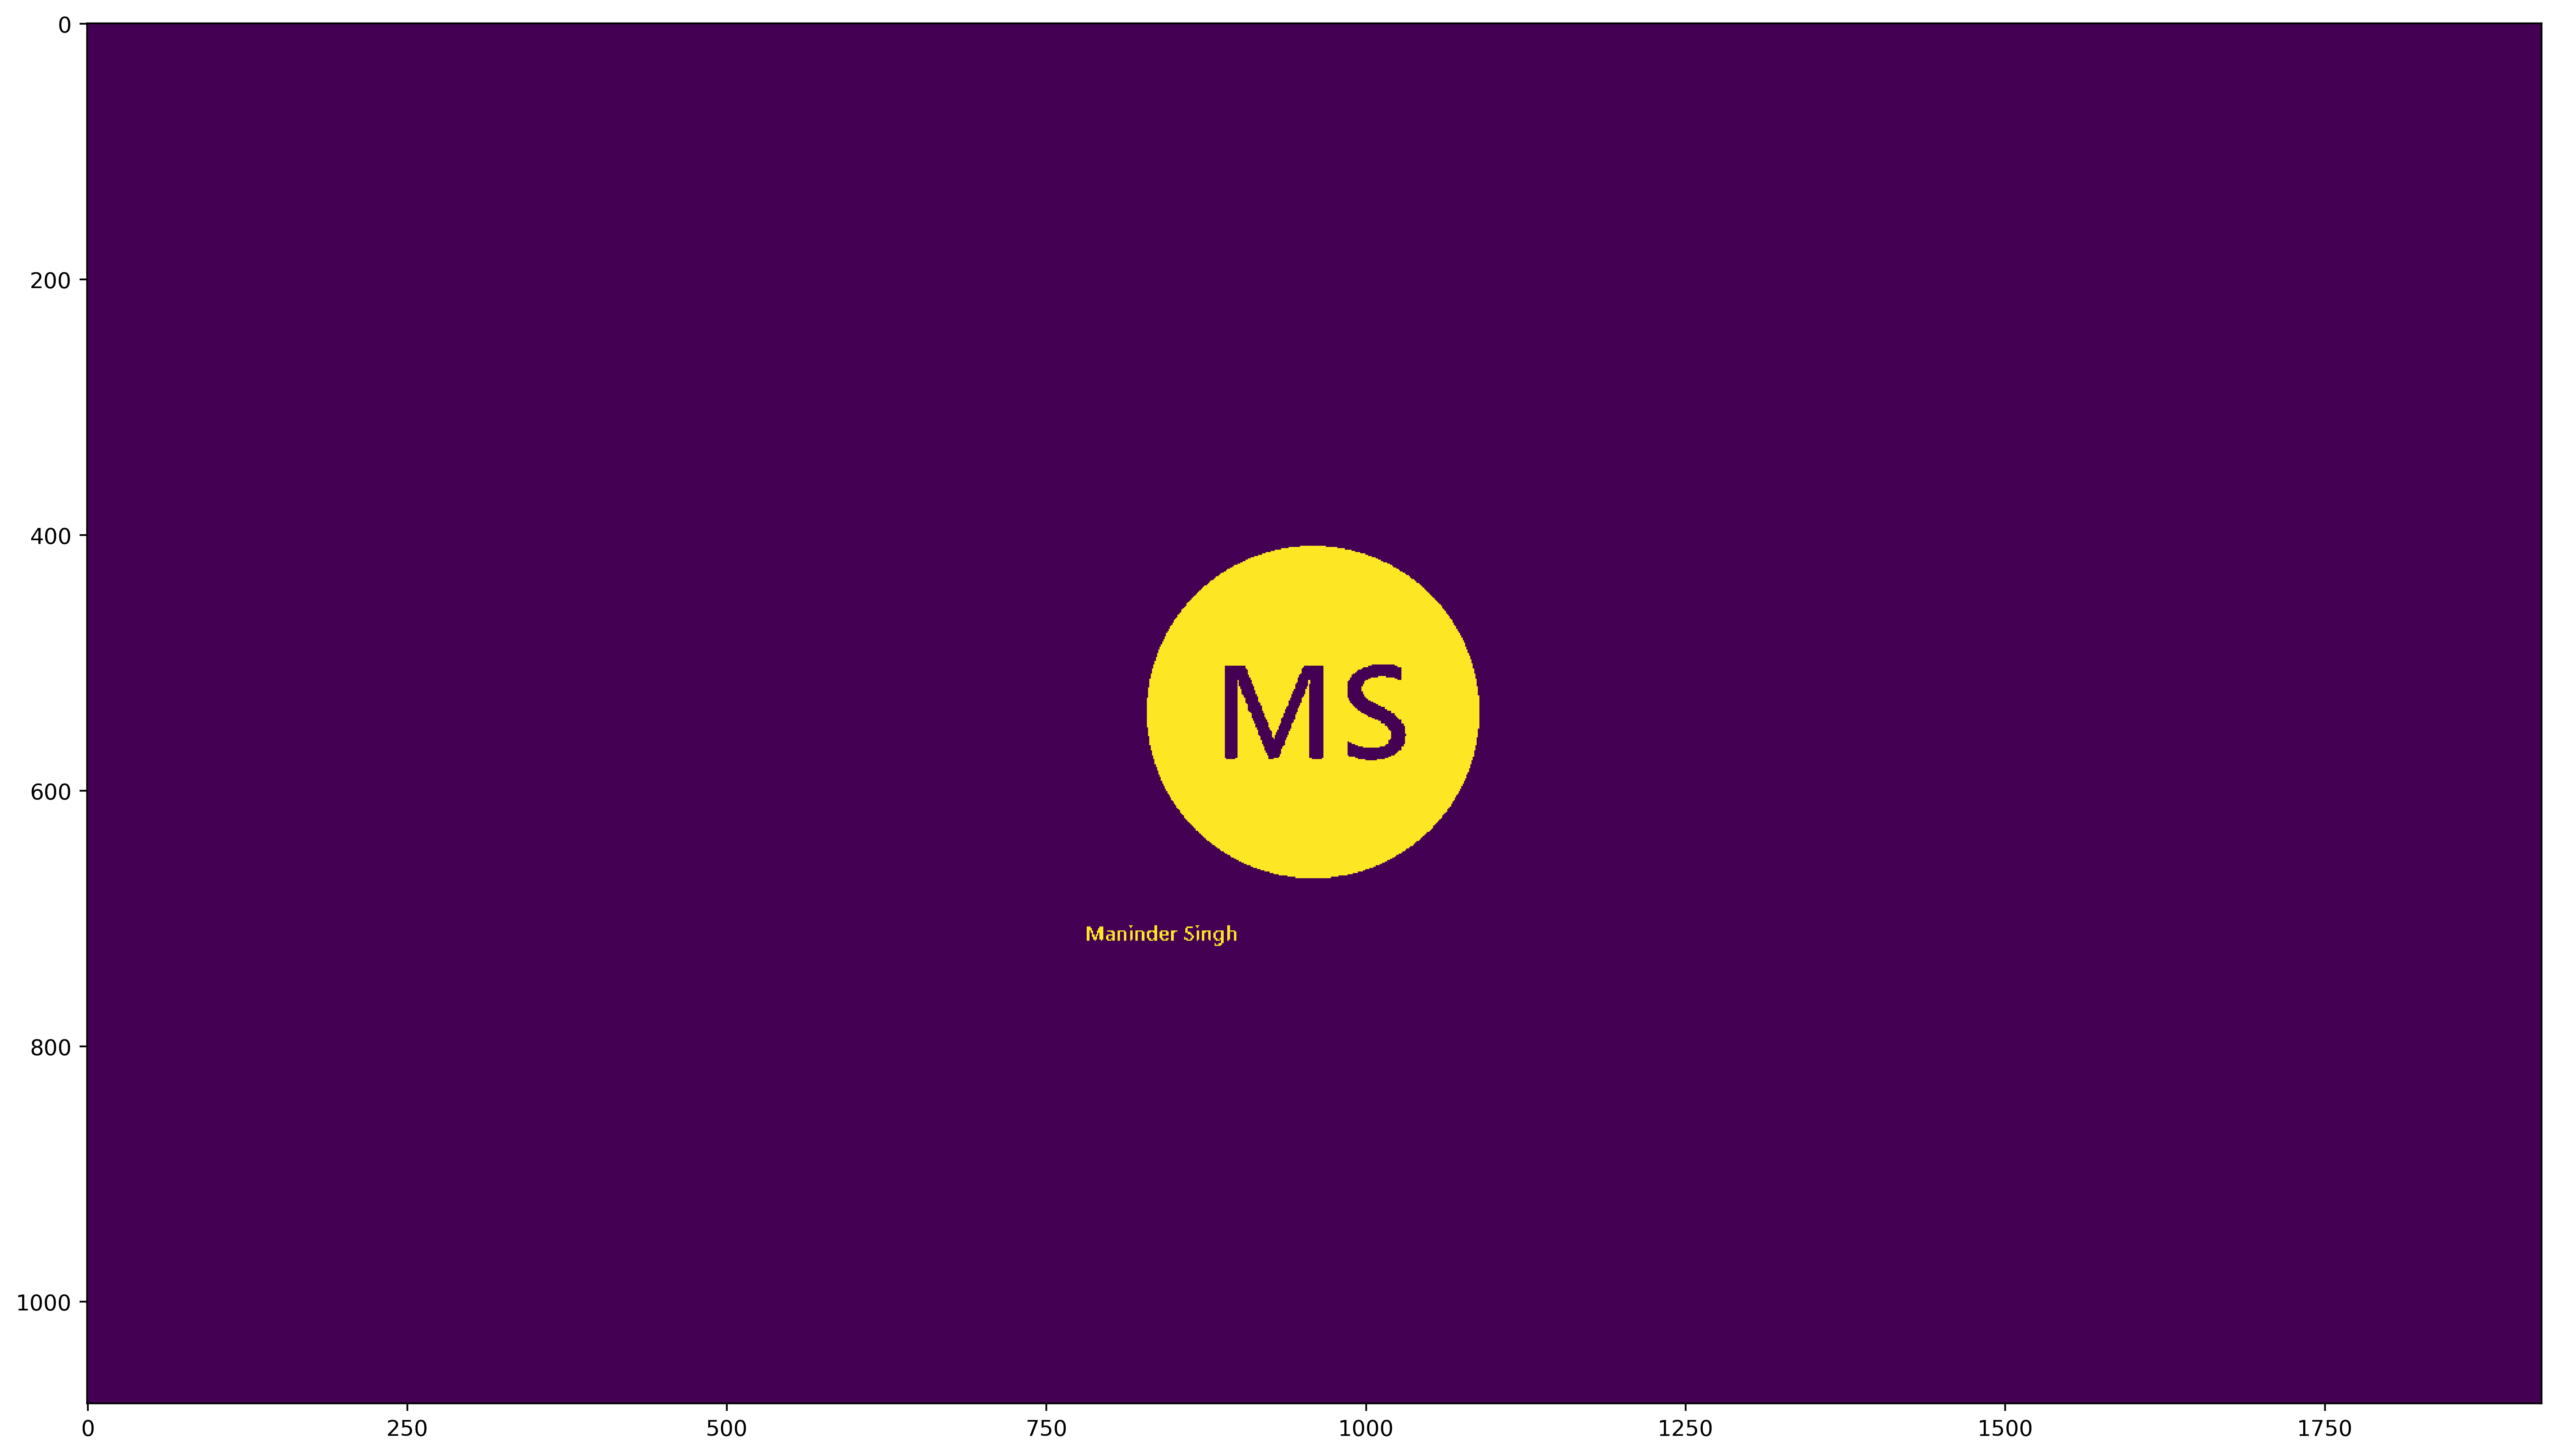

frame mergeing number elseif: 31, 32  
Difference Percentage : 0.0<0.5:True
else-while


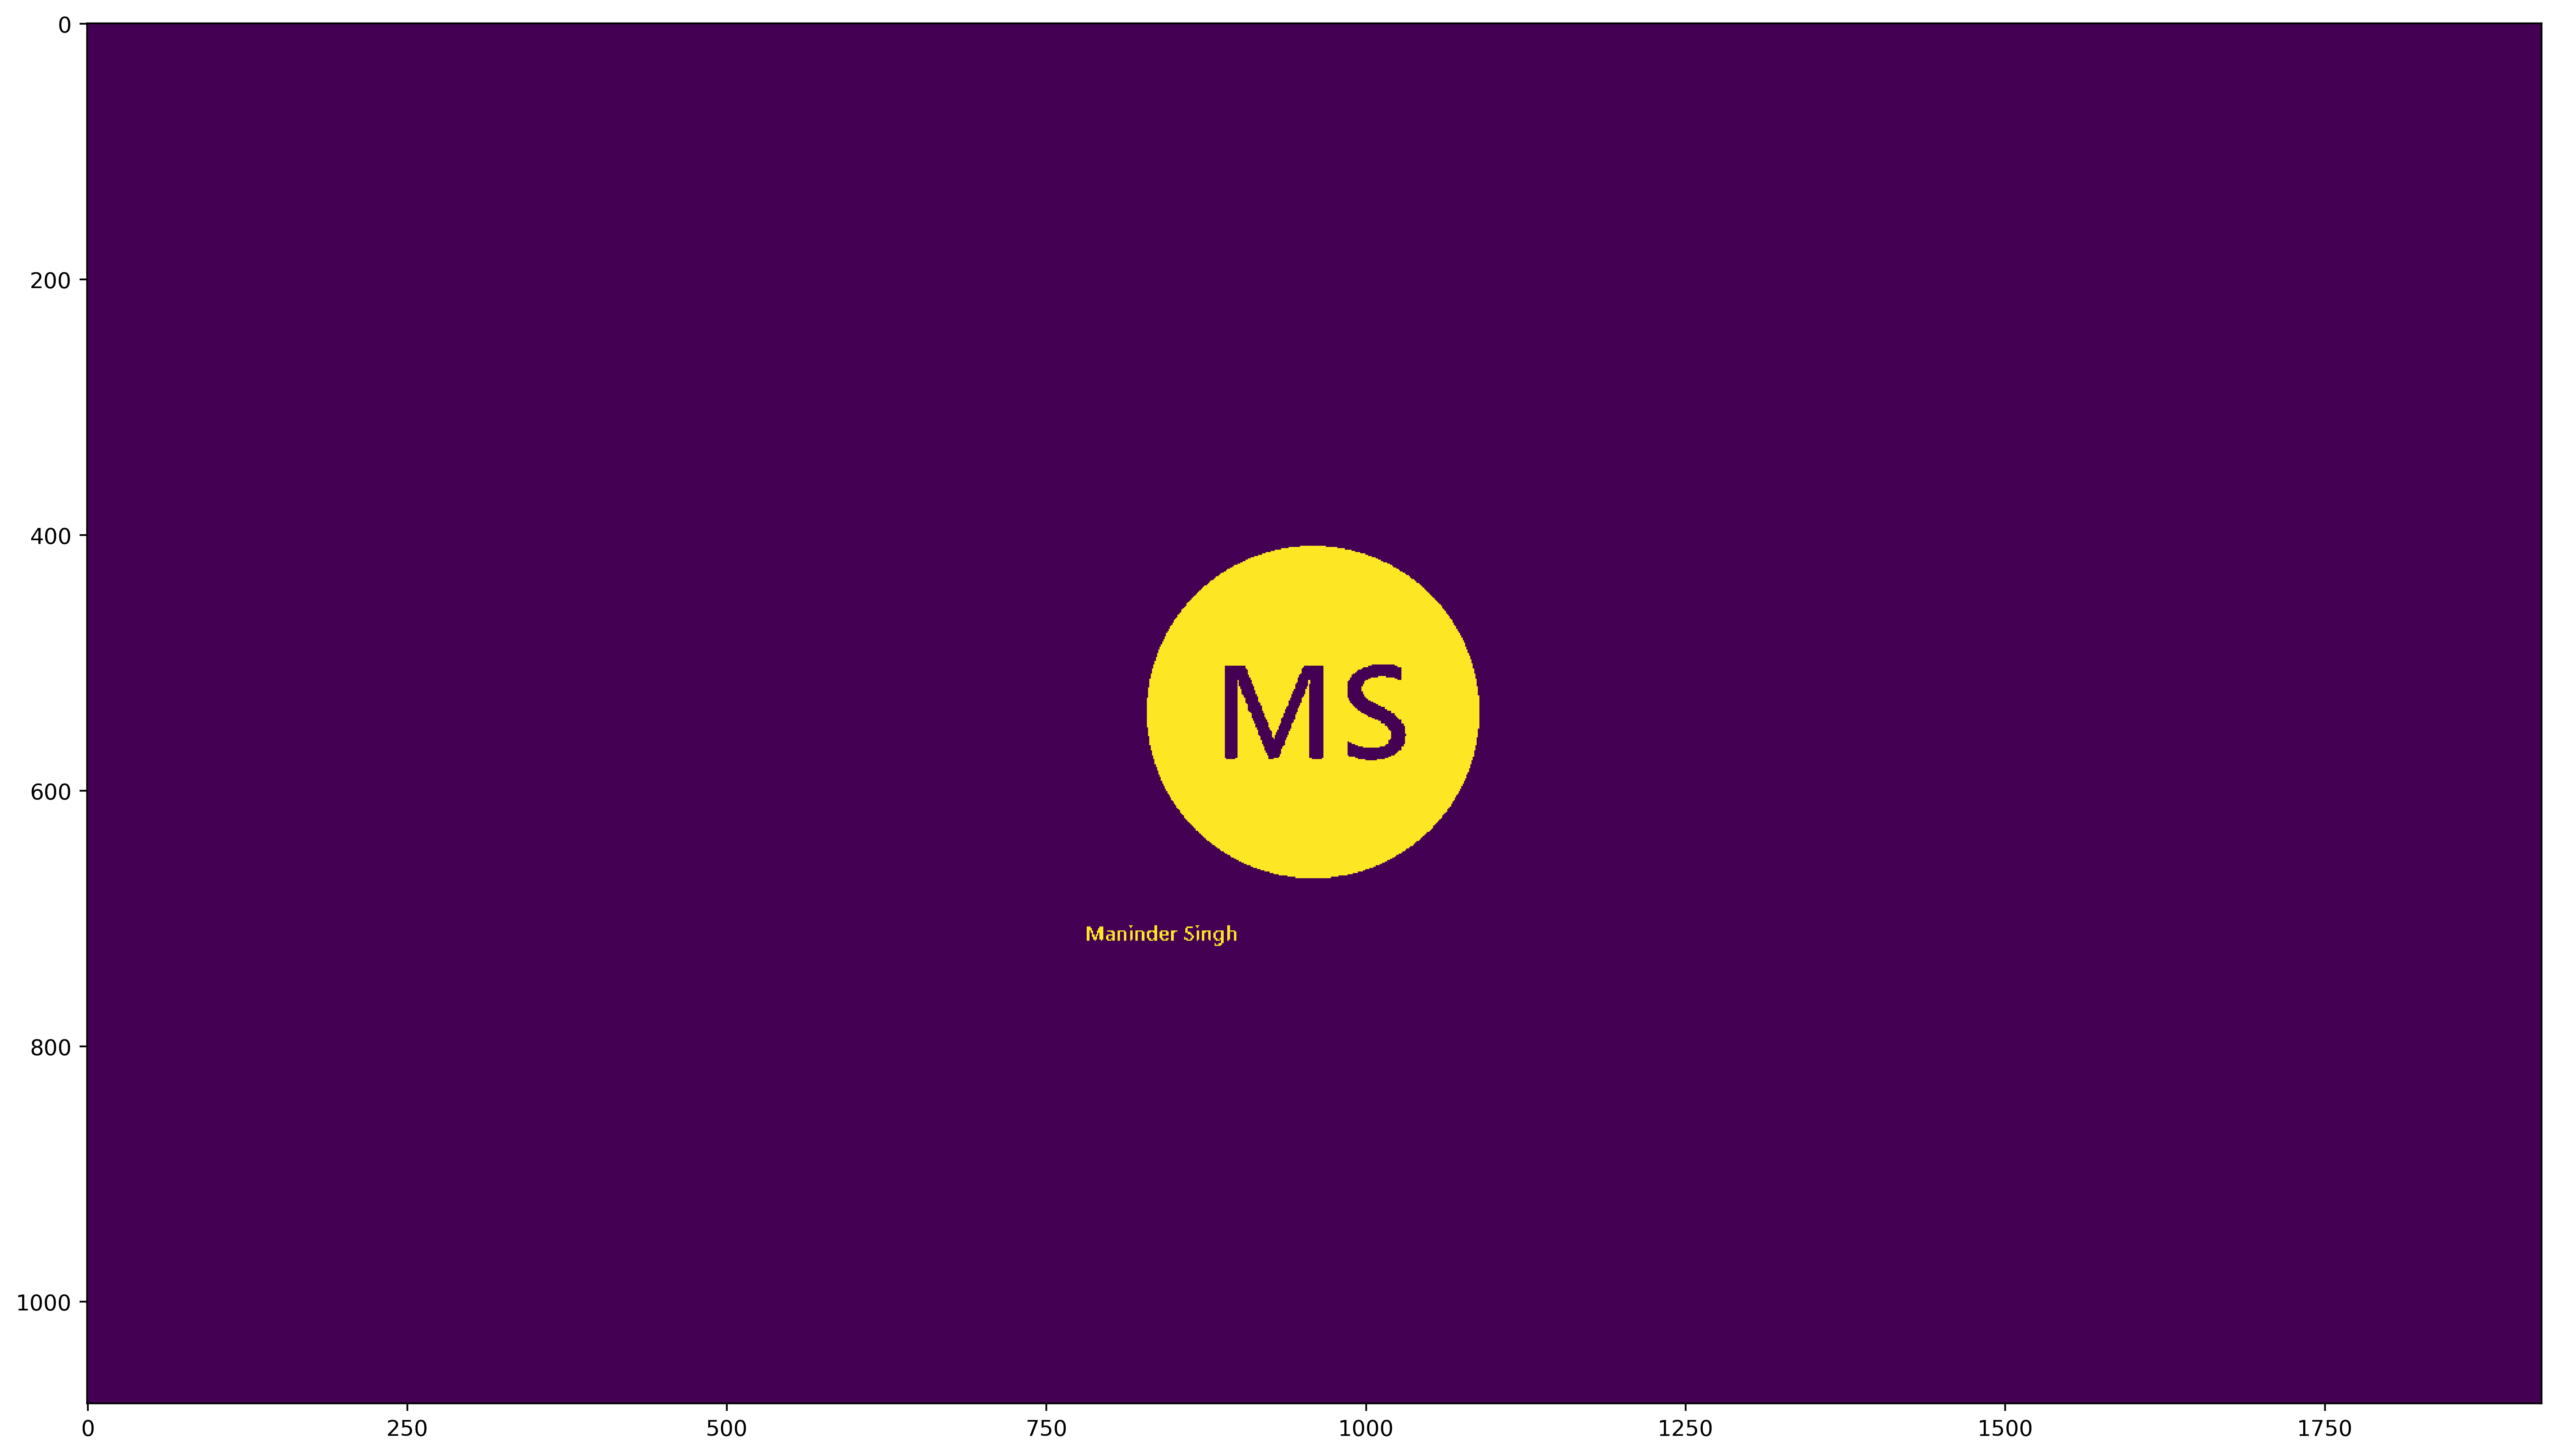

frame mergeing number elseif: 32, 33  
Difference Percentage : 9.645061728395061e-05<0.5:True
else-while


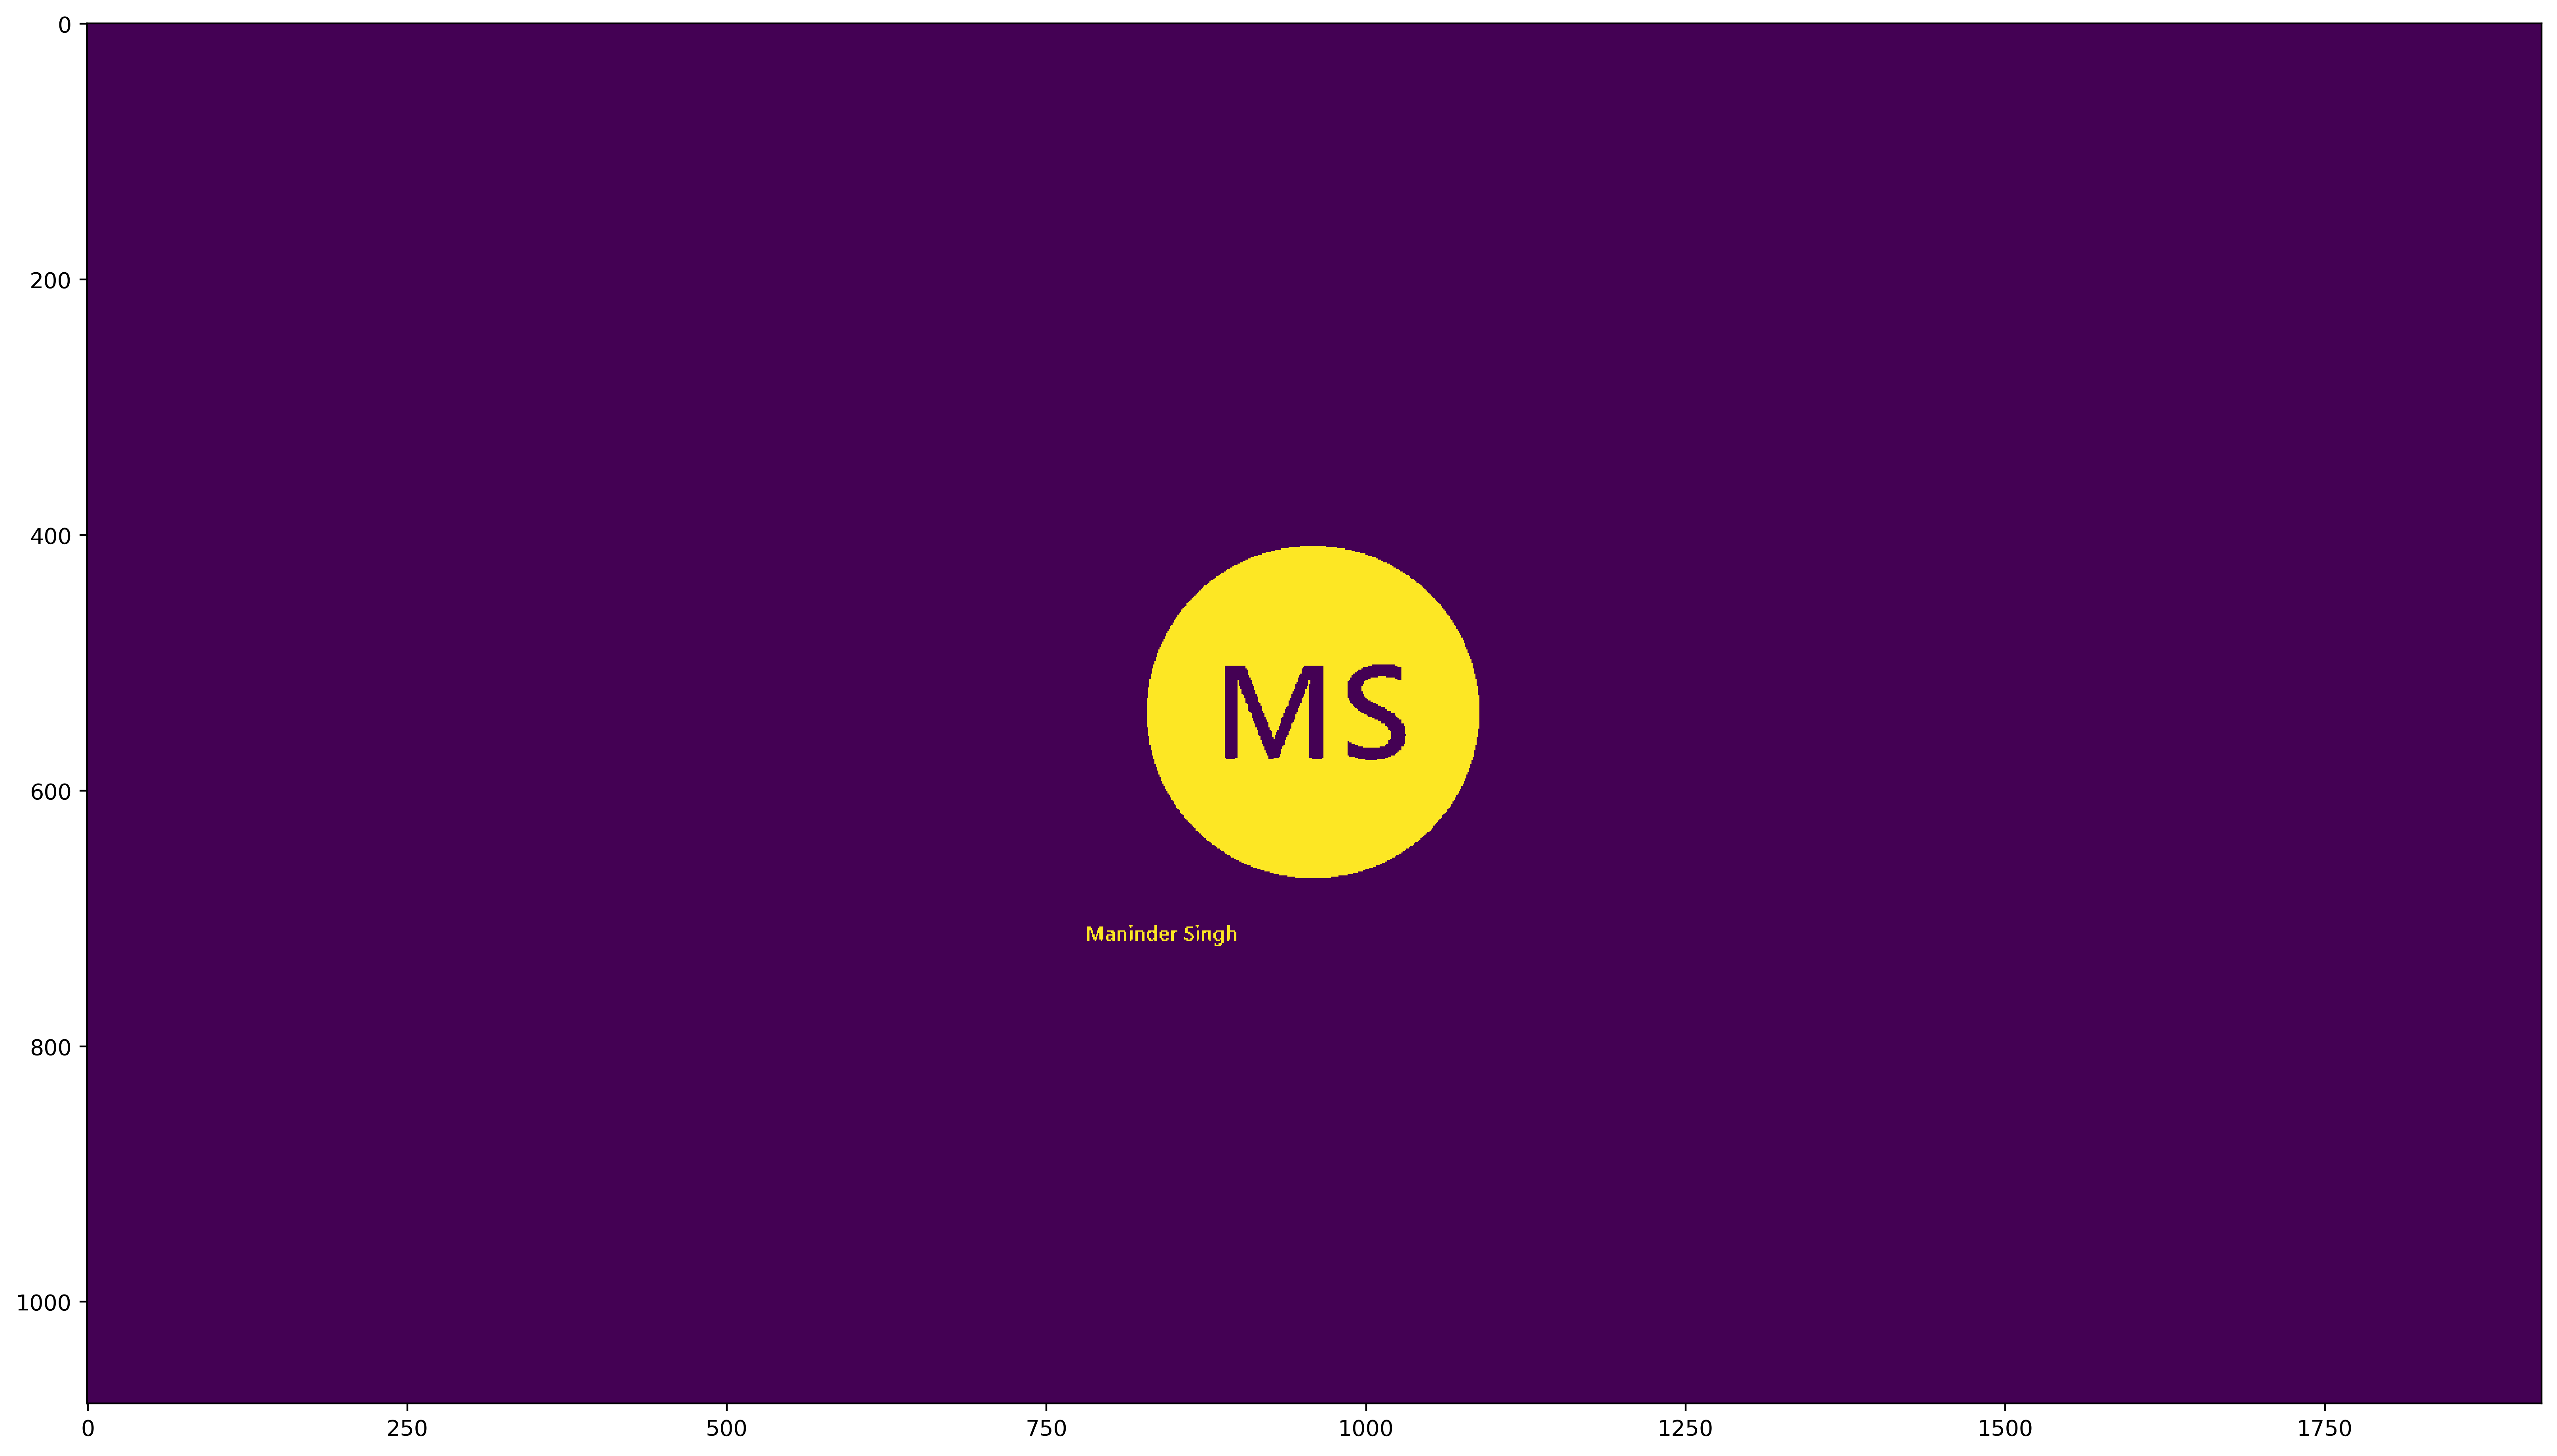

frame mergeing number elseif: 33, 34  
Difference Percentage : 4.8225308641975306e-05<0.5:True
else-while


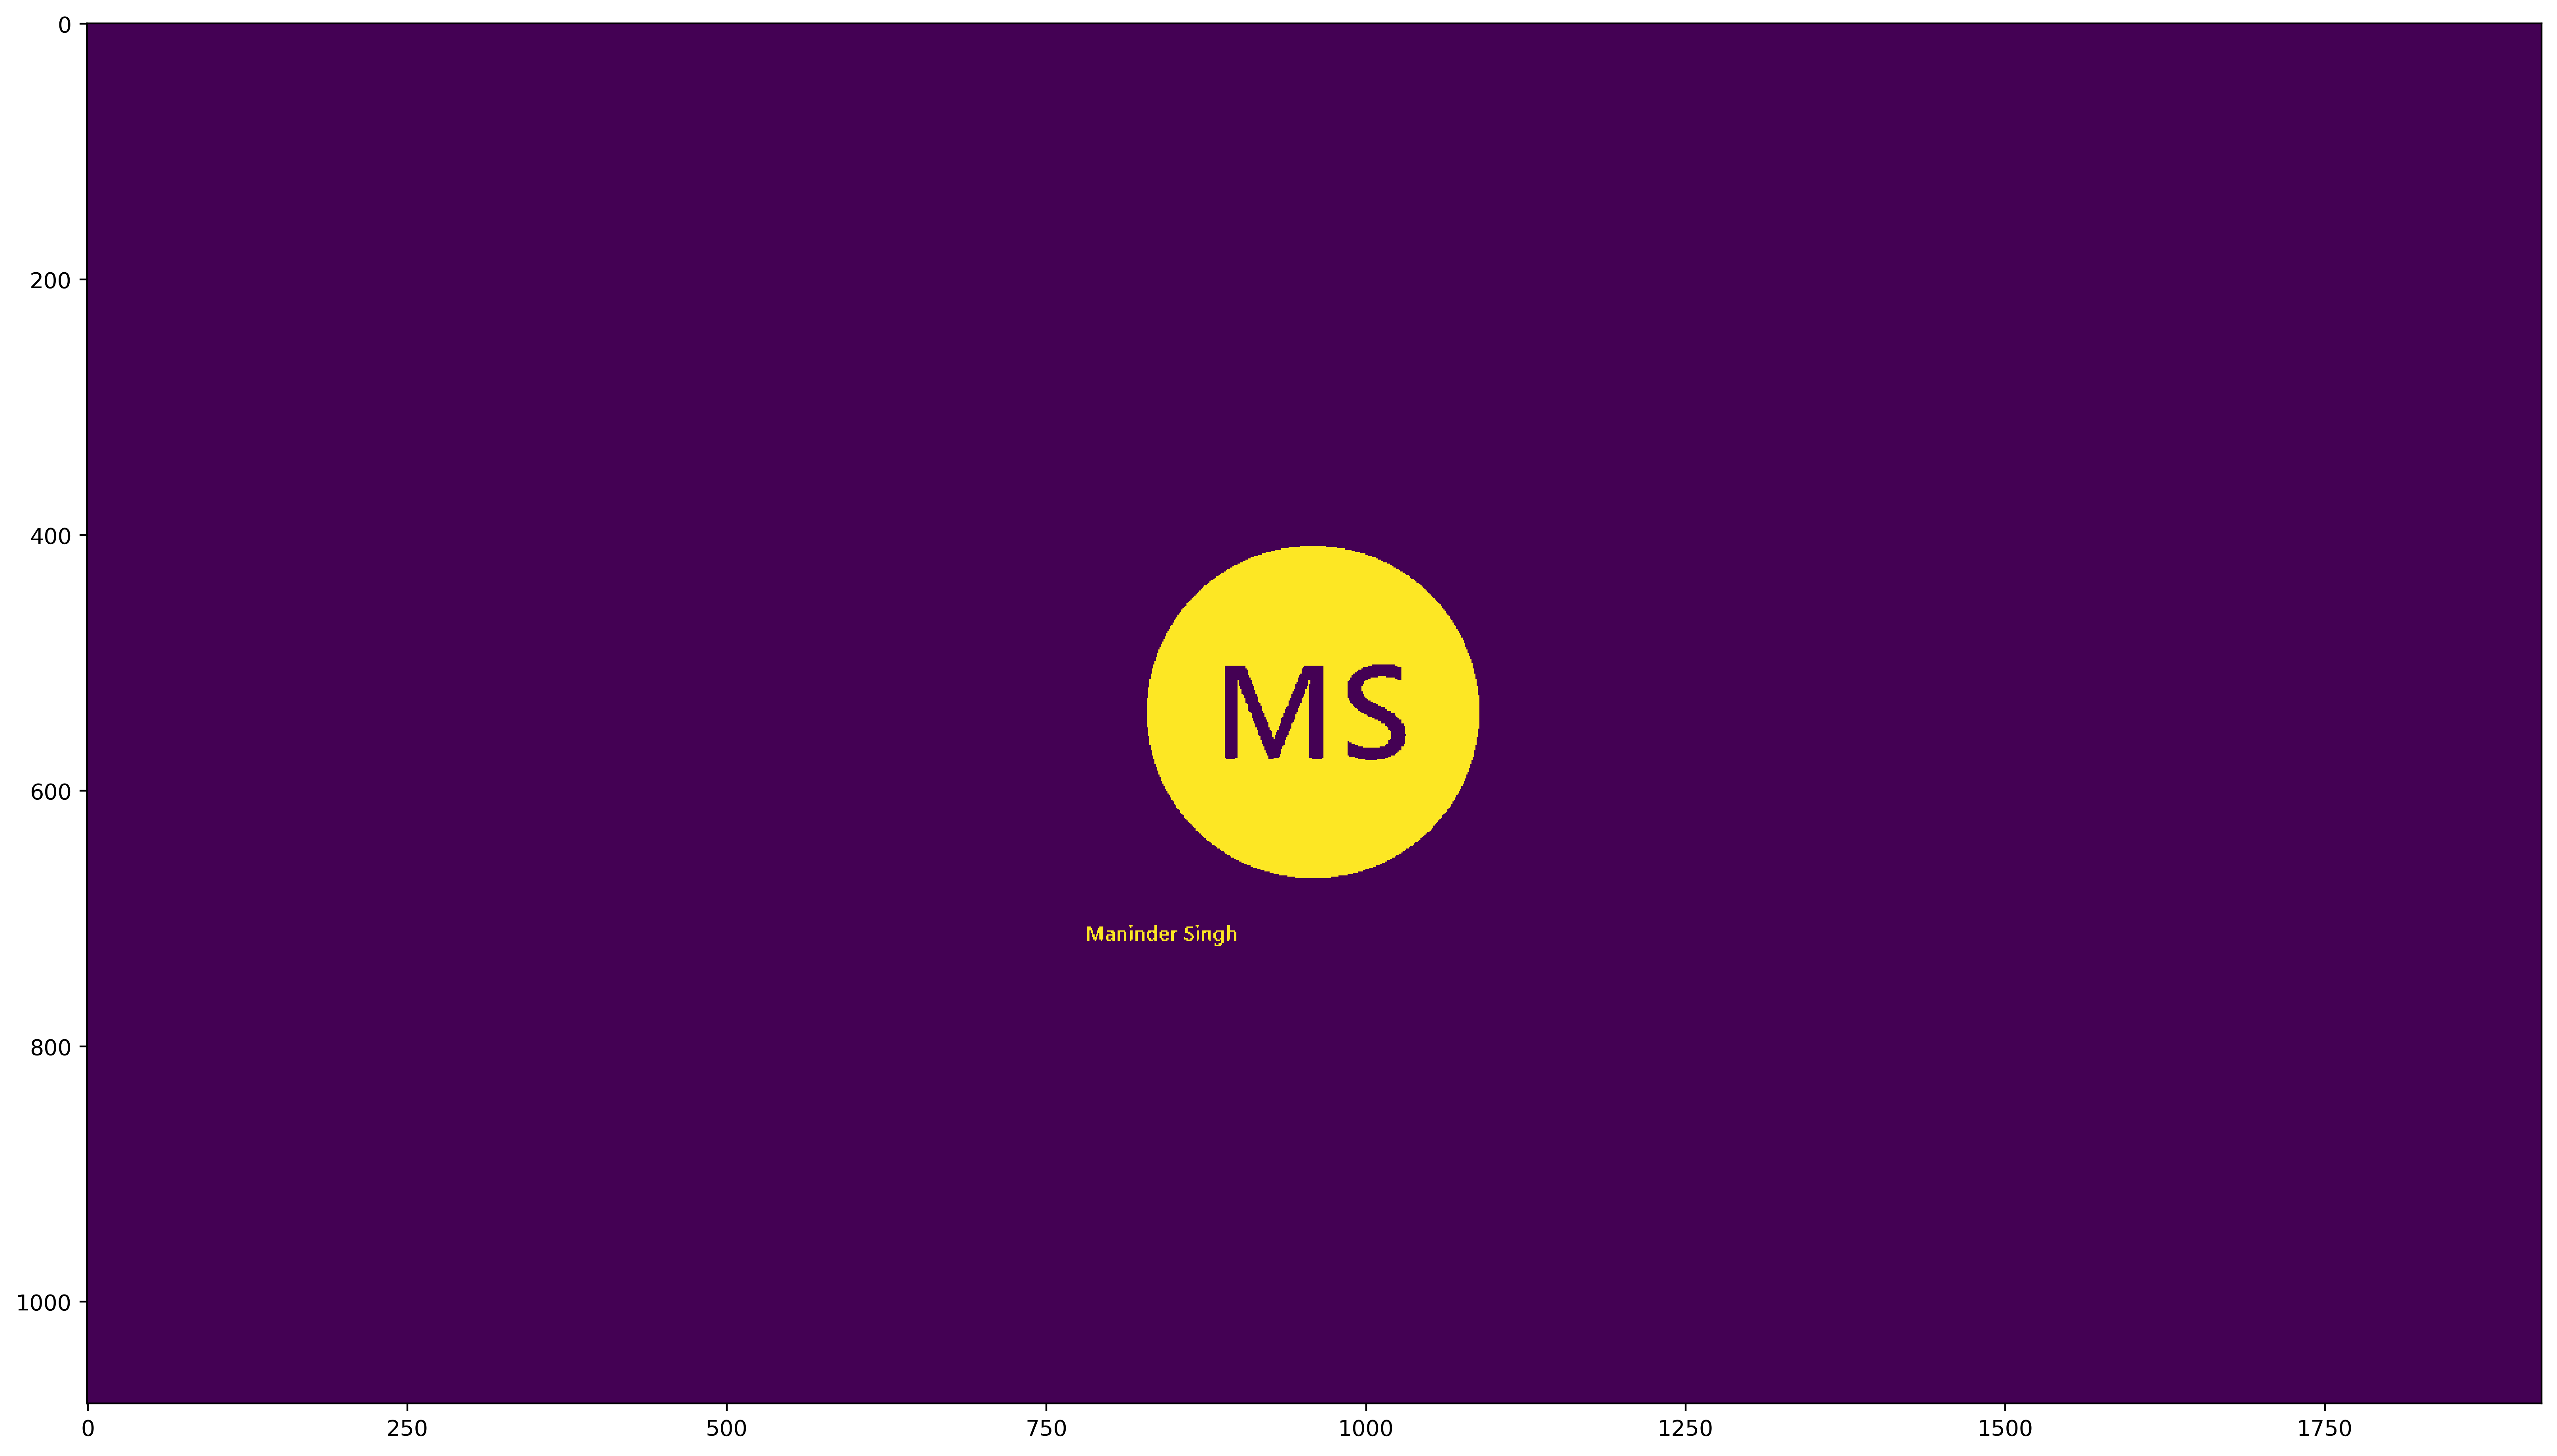

frame mergeing number elseif: 34, 35  
Difference Percentage : 0.0<0.5:True
else-while


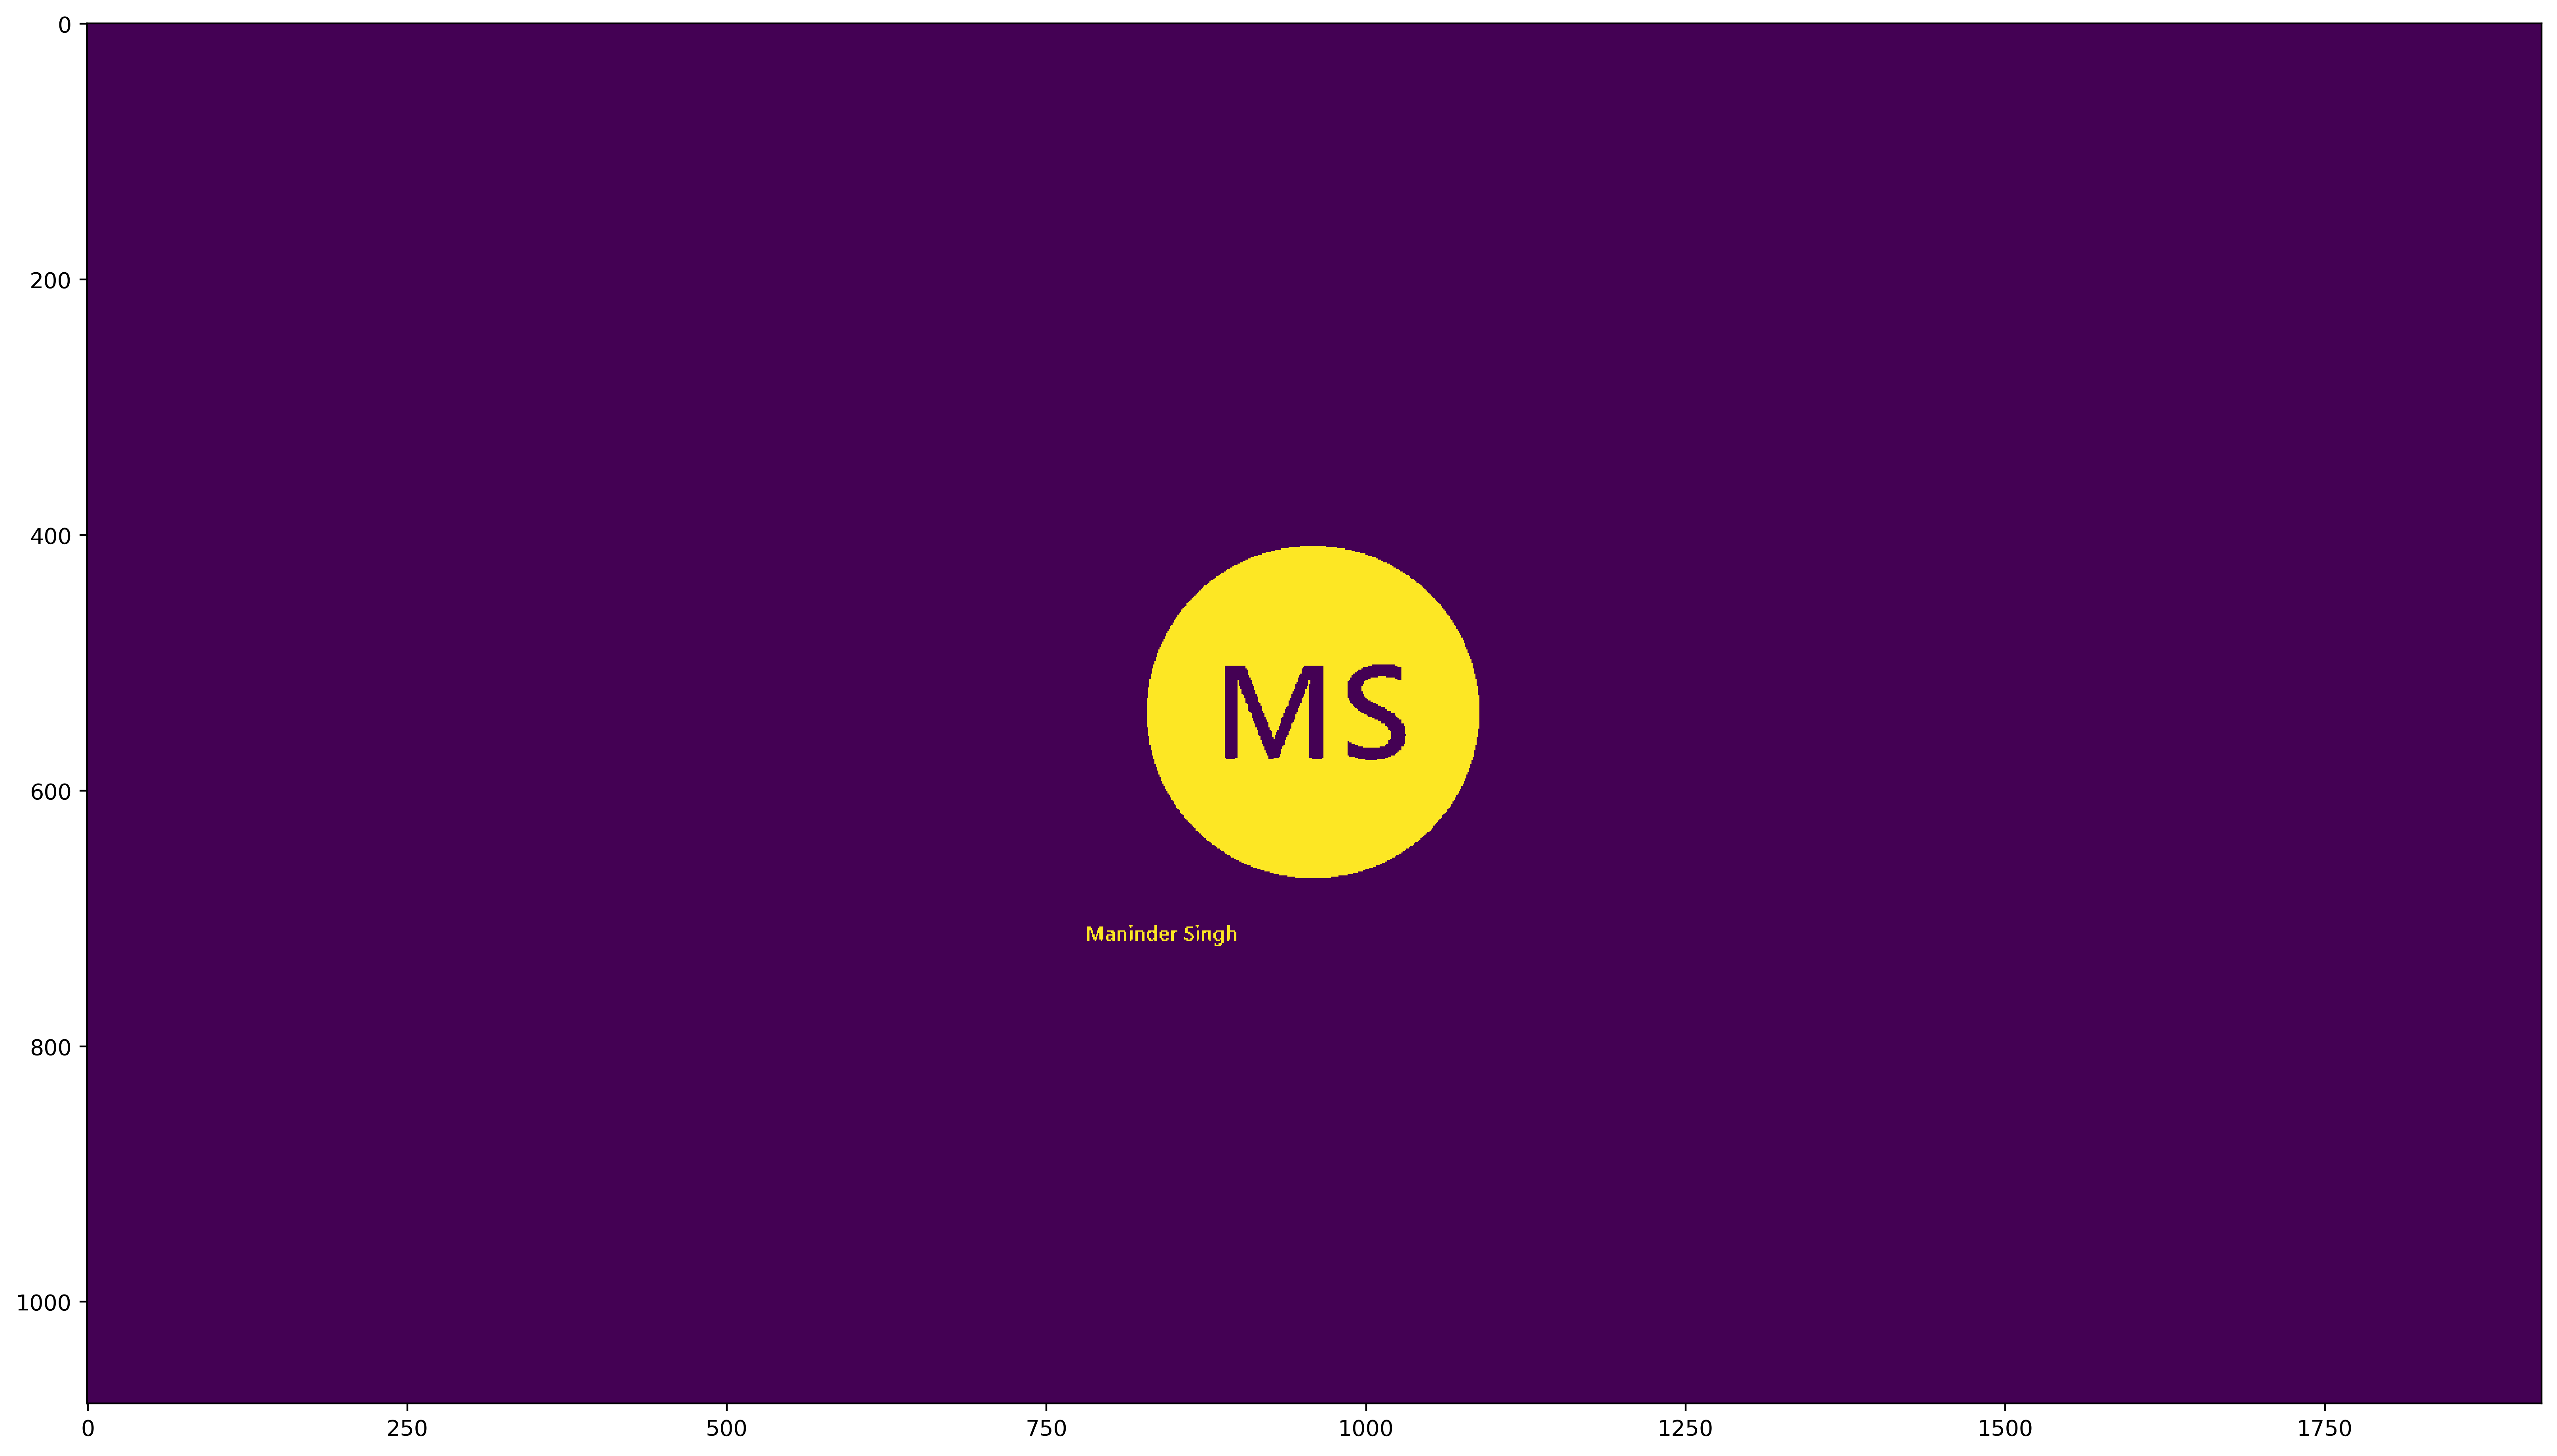

frame mergeing number elseif: 35, 36  
Difference Percentage : 0.0<0.5:True
else-while


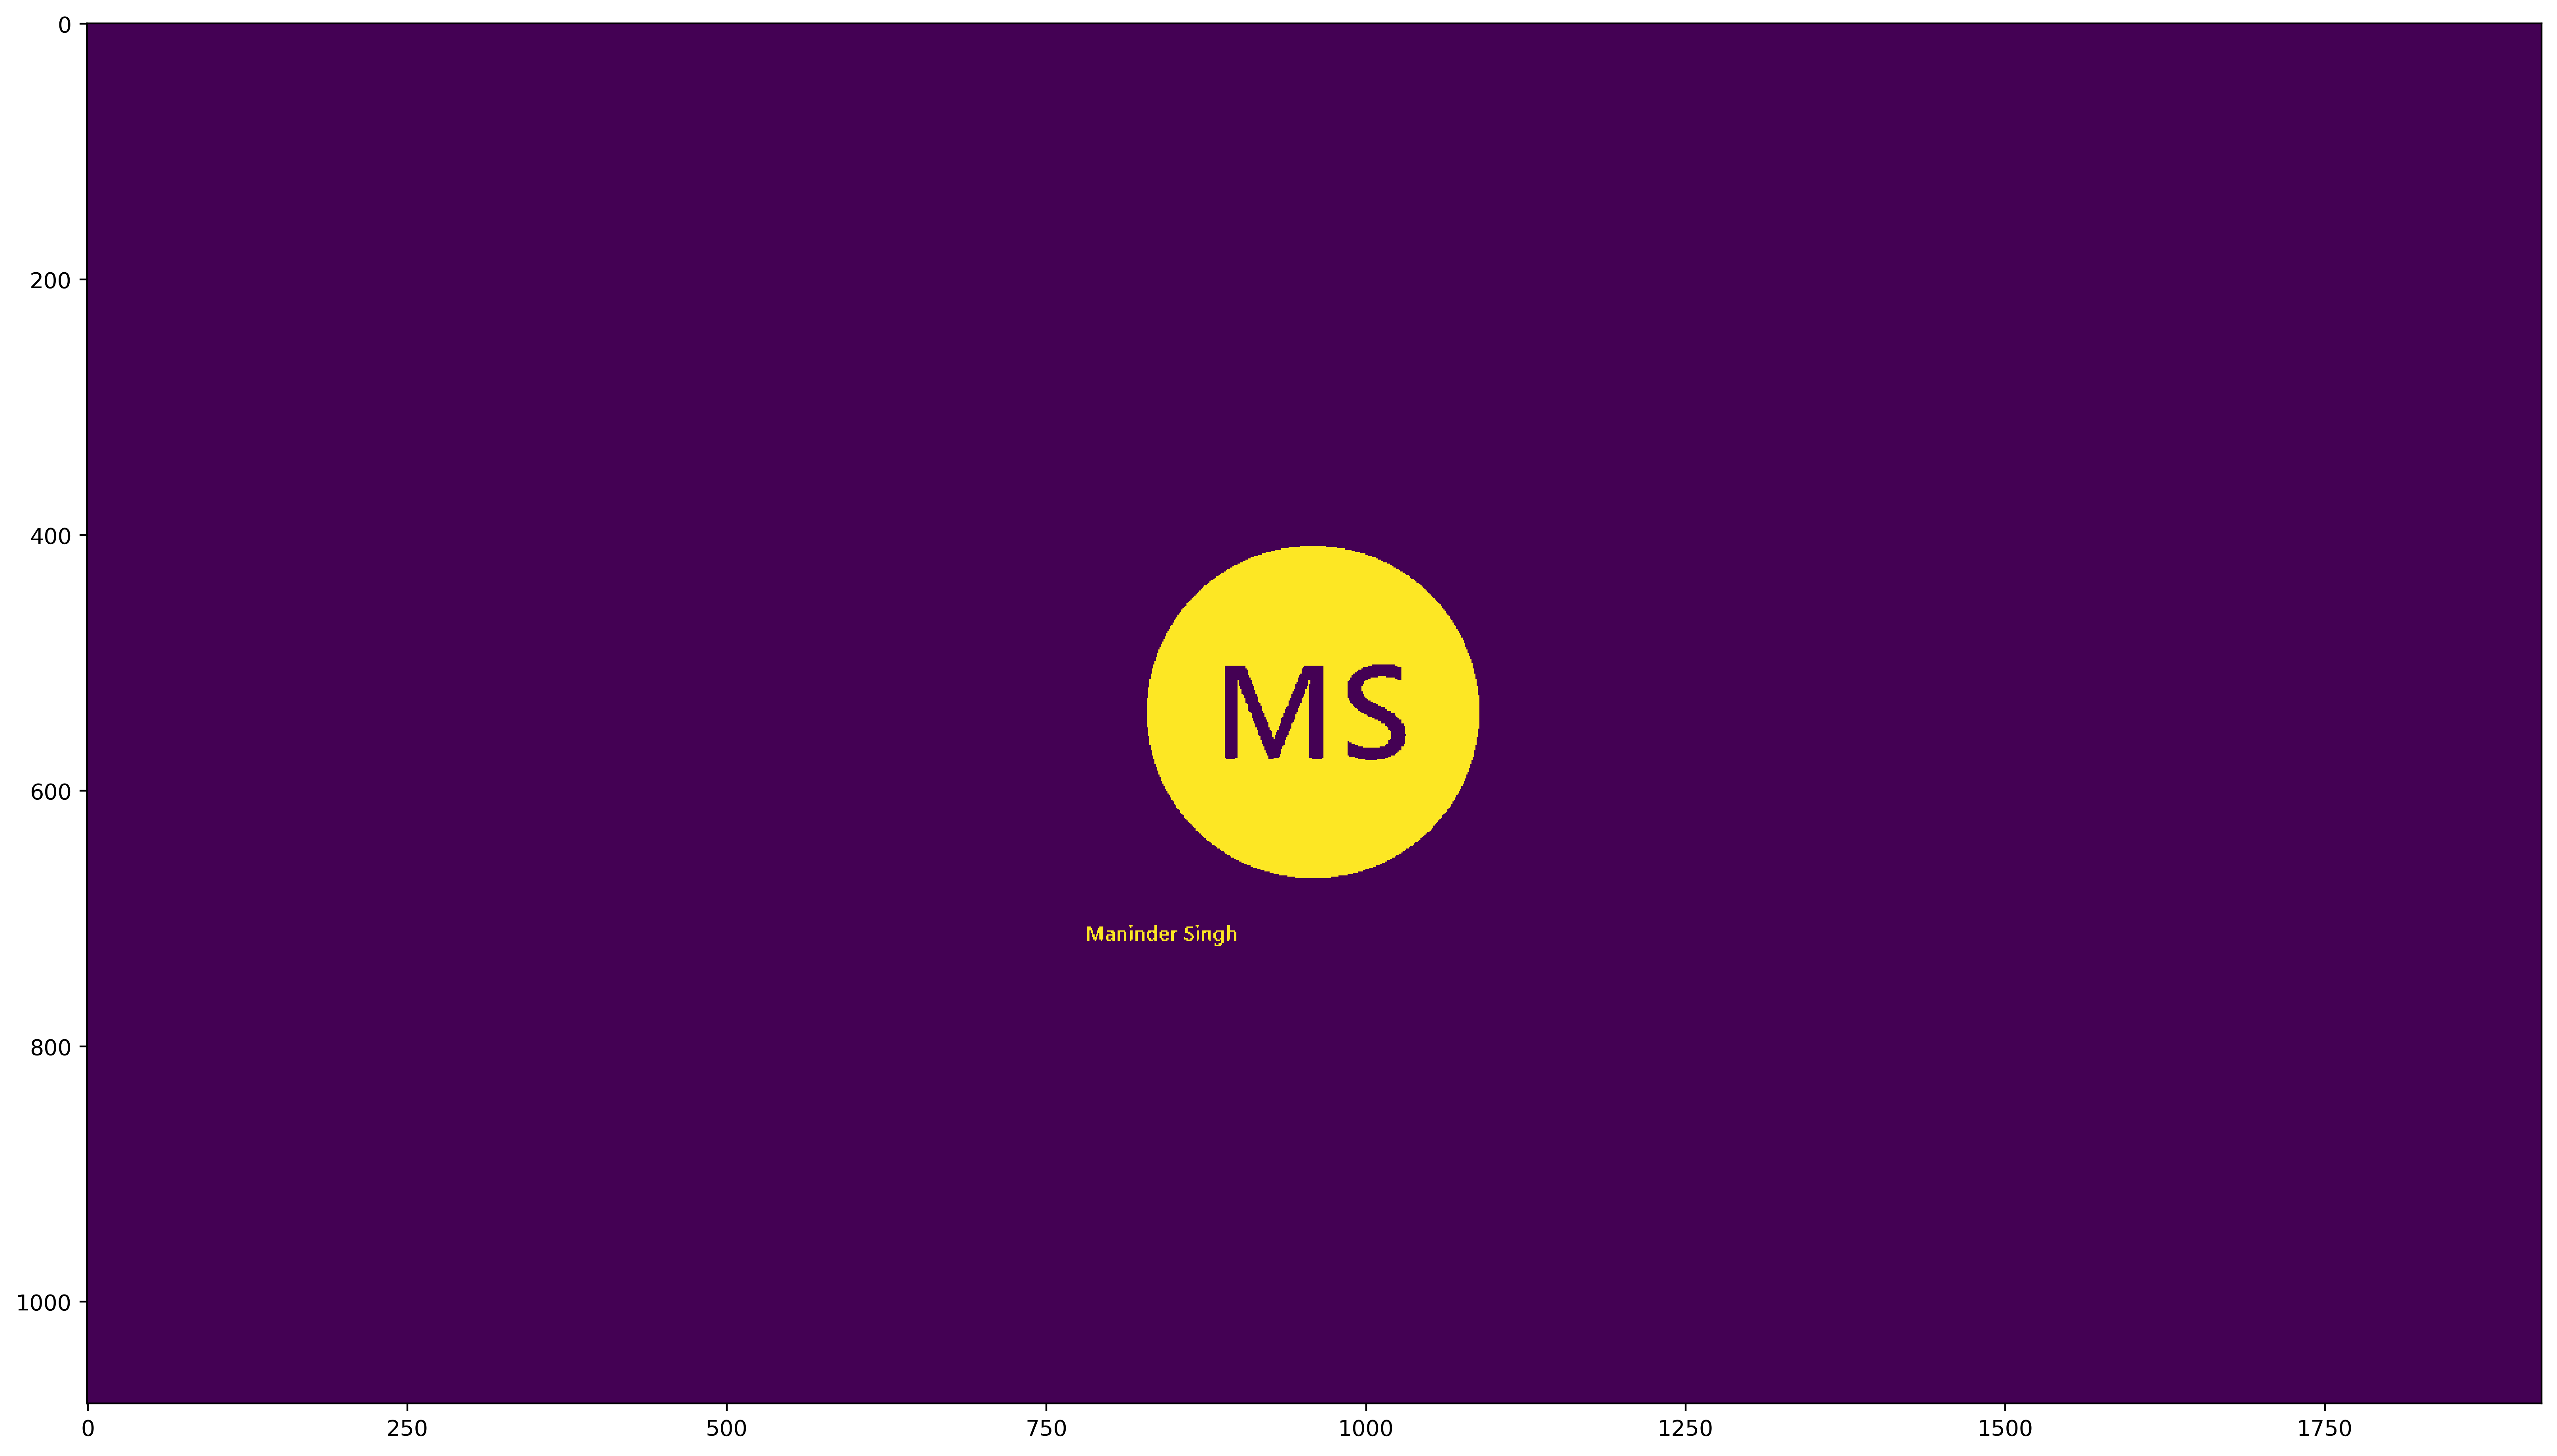

frame mergeing number elseif: 36, 37  
Difference Percentage : 0.0<0.5:True
else-while


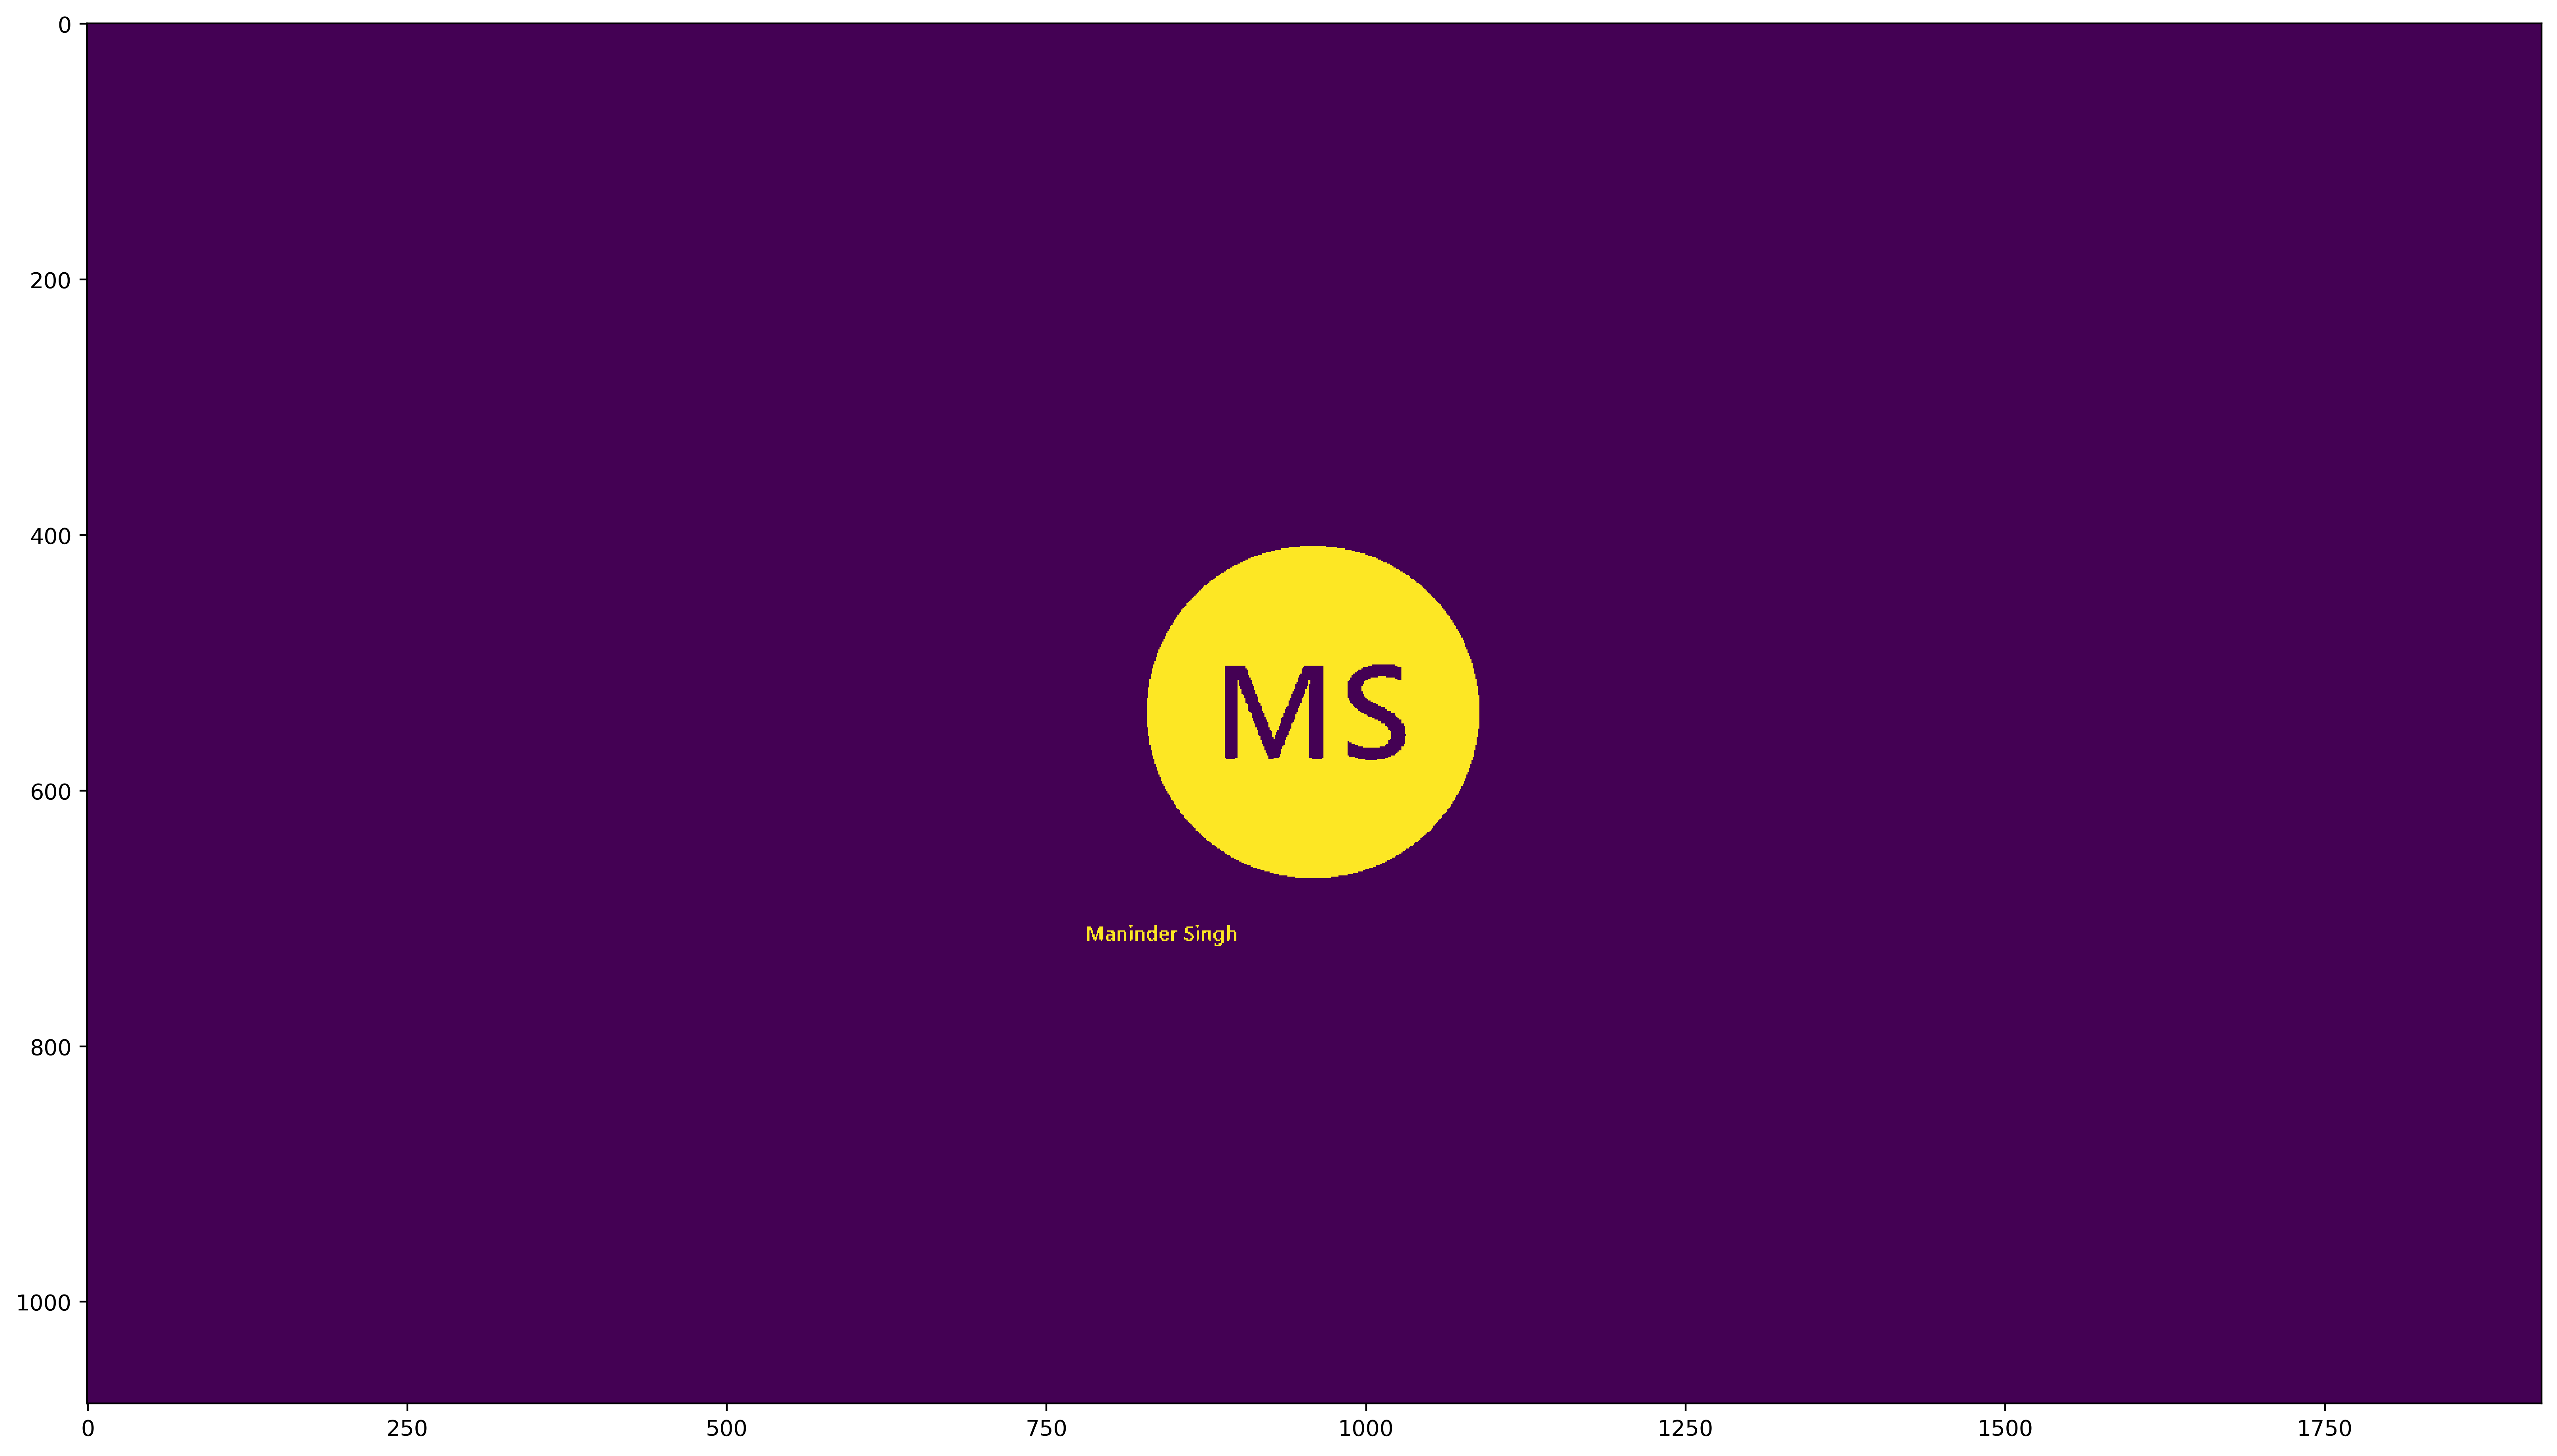

frame mergeing number elseif: 37, 38  
Difference Percentage : 0.0<0.5:True
else-while


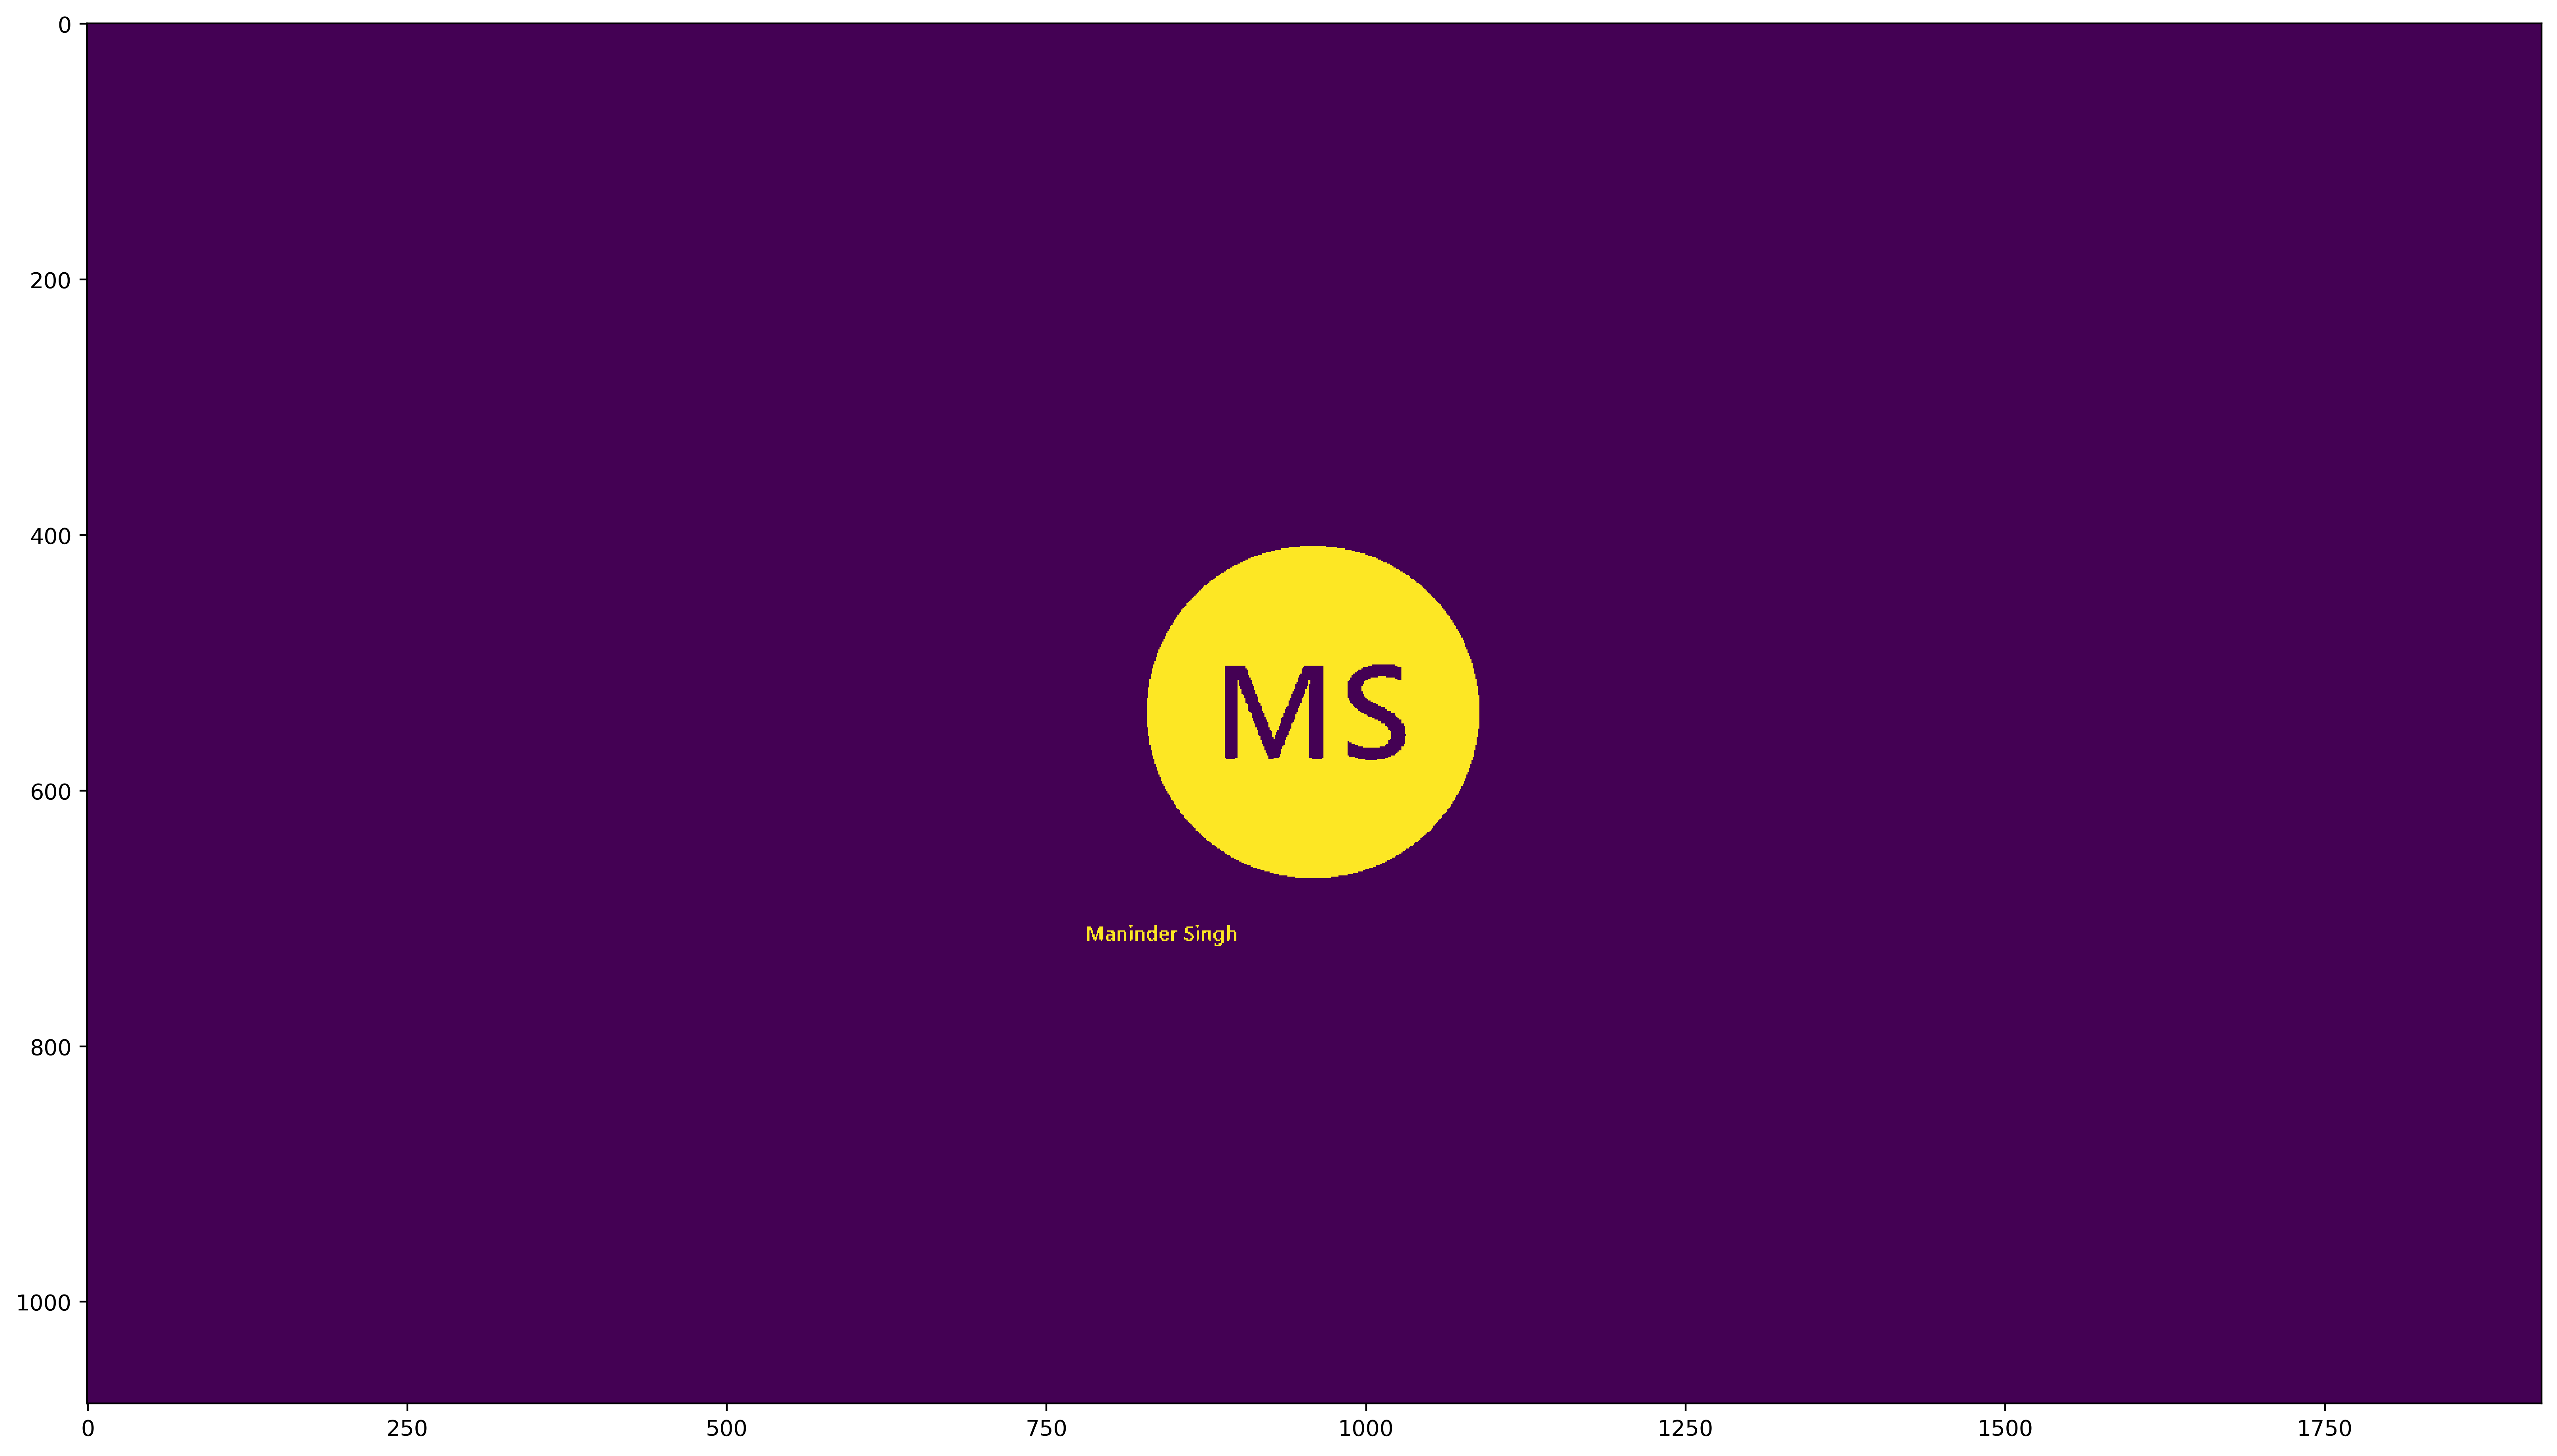

frame mergeing number elseif: 38, 39  
Difference Percentage : 4.8225308641975306e-05<0.5:True
else-while
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-


In [38]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def merge_similar_frames(frame_list):
    combined_frames = []
    index = 0
    

    while index < len(frame_list) - 1:
        print(index)
        current_frame = cv2.imread(frame_list[index])
        current_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        current_frame_bw = cv2.threshold(current_frame, 80, 255, cv2.THRESH_BINARY)[1]

        next_frame = cv2.imread(frame_list[index + 1])
        next_frame = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
        next_frame_bw = cv2.threshold(next_frame, 80, 255, cv2.THRESH_BINARY)[1]
        print(frame_list[index],frame_list[index + 1])

        
#         print(are_frames_similar(current_frame_bw, next_frame_bw))

        if not are_frames_similar(current_frame_bw, next_frame_bw):
            cv2.imwrite(f'{combined_frame_dir}/unmerged_frame_{index}.png',current_frame_bw)
#             combined_frames.append(current_frame)

#             print(f"Unmerged Independent Frame number : {index+3} ")
            index += 1
#         break
        else:
            try:
    #             print("inside else")
    #             print(f"frame mergeing number else : {index+3}, {index+1+3}  ")
                print("else:  ",frame_list[index],frame_list[index + 1])
                merged_frame = merge_frames(current_frame_bw, next_frame_bw)
                plt.figure(figsize=(20,20),dpi=400)
                plt.imshow(merged_frame)
                plt.show()
                temp_frame = next_frame_bw
                index += 1
                next_frame = cv2.imread(frame_list[index + 1])
                next_frame = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
                next_frame_bw = cv2.threshold(next_frame, 80, 255, cv2.THRESH_BINARY)[1]


                if index < len(frame_list) - 1 and are_frames_similar(temp_frame, next_frame_bw):
                    while index < len(frame_list) - 1 and are_frames_similar(temp_frame, next_frame_bw):
                        print("else-while")
#                         print("else-if-while:  ",frame_list[index],frame_list[index + 1])
#                         print("LKJG:LKSDJGL:S",are_frames_similar(temp_frame, next_frame_bw))
                        merged_frame = merge_frames(merged_frame, next_frame_bw)
                        index += 1
                        temp_frame = next_frame_bw
                        next_frame = cv2.imread(frame_list[index + 1])
                        next_frame = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
                        next_frame_bw = cv2.threshold(next_frame, 80, 255, cv2.THRESH_BINARY)[1]
                        plt.figure(figsize=(20,20),dpi=400)
                        plt.imshow(merged_frame)
                        plt.show()
                        print(f"frame mergeing number elseif: {index}, {index+1}  ")


    #                 print("BYE BYE WHILE")
                cv2.imwrite(f'{combined_frame_dir}/combined_frame_elseif_saving{index}_{index+1}.png',merged_frame)
        
            except IndexError:
                cv2.imwrite(f'{combined_frame_dir}/combined_frame_elseif_saving{index}_{index+1}.png',merged_frame)
                               
            
            combined_frames.append(merged_frame)
            print('_-'*80)
#         index += 1

    return combined_frames

def are_frames_similar(frame1, frame2, threshold=0.50):
    # Implement your similarity comparison logic here
    # You might want to use techniques like structural similarity index (SSI) or others
    # For simplicity, let's assume frames are similar if absolute pixel-wise difference is below a threshold
    diff_percentage, _ = calculate_difference_percentage(frame1, frame2)
    
    print(f"Difference Percentage : {diff_percentage}<{threshold}:{diff_percentage<threshold}")
    return diff_percentage < threshold

def calculate_difference_percentage(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    res = diff.astype(np.uint8)
    diff_percentage = (np.count_nonzero(res) * 100) / res.size
    return diff_percentage,diff

def merge_frames(frame1, frame2):
    diff_per,diff = calculate_difference_percentage(frame1, frame2)
#     print(diff_per)
#     print(frame1.shape)
#     print(frame2.shape)

    _, thresholded = cv2.threshold(diff, 105, 255, cv2.THRESH_BINARY)
#         _,thresholded = cv2.threshold(diff,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    mask = np.zeros_like(frame1)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255))#,thickness=cv2.FILLED)

    # Combine the frames using the mask
    result_frame = cv2.addWeighted(frame1, 1, mask, 1.0, 0)
    return result_frame

# Example usage:
image_frames_dir = './image_frames/'  # Replace with the path to your image frames directory
frame_list = os.listdir(image_frames_dir)

frame_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
frame_list = [file for file in frame_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
frame_list = [image_frames_dir+file for file in frame_list]
# print(frame_list)
# frame_list = sorted([os.path.join(image_frames_dir, frame) for frame in os.listdir(image_frames_dir)])
# print(frame_list)

combined_frames = merge_similar_frames(frame_list)

# Display or save the resulting frames as needed
combined_frame_dir = './combined_frames/'
# for i, frame in enumerate(combined_frames):
#     cv2.imwrite(f'{combined_frame_dir}/combined_frame_{i}.png', frame)


# Merge frame approach 2


In [ ]:
import cv2

# Open the video
video_file = 'meeting sample.mp4'
cap = cv2.VideoCapture(video_file)
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

    
frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate (frames per second)
frame_interval = int(frame_rate)

# frame_rate = cap.get(5)  # Get the frame rate (frames per second)
print(frame_rate)
# frame_interval = int(1 / frame_rate)
print(frame_interval)

# Load the template image (screenshot of command prompt or PowerShell)
template = cv2.imread('command prompt sample.JPG')
template = cv2.resize(template, (1920, 1080))  # Replace 'width' and 'height' with the desired size
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2.imwrite('todelete.jpg',template)

# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(template, None)
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    if frame_count % frame_interval == 0:
#         print("inside if")

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Find the keypoints and descriptors with ORB in the frame
        kp2, des2 = orb.detectAndCompute(gray_frame, None)

        # BFMatcher (Brute Force Matcher) with default params
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        # If enough good matches are found, consider the frame as a match
        if len(good_matches) > 10:
            # Frame contains the command prompt or PowerShell
    #         cv2.imshow('Frame with Command Prompt', frame)
                # Noise reduction
#             kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

            # Sharpening
#             sharpened_frame = cv2.filter2D(gray_frame, -1, kernel)
#             frame = cv2.threshold(frame, 80, 255, cv2.THRESH_BINARY)[1]
            
            frame_filename = './image_frames/'+str(int(frame_count / frame_rate)) +'.png'
            cv2.imwrite(frame_filename, frame)
    #         cv2.waitKey(0)  # Press any key to see the next frame
    frame_count += 1

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def merge_similar_frames(frame_list):
    combined_frames = []
    index = 0
    combined_frame_dir = './combined_frames/'
    

    while index < len(frame_list) - 1:
        print(index)
        current_frame = cv2.imread(frame_list[index])
        current_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        current_frame_bw = cv2.threshold(current_frame, 80, 255, cv2.THRESH_BINARY)[1]

        next_frame = cv2.imread(frame_list[index + 1])
        next_frame = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
        next_frame_bw = cv2.threshold(next_frame, 80, 255, cv2.THRESH_BINARY)[1]
        print(frame_list[index],frame_list[index + 1])
        
        try:
        
            if not are_frames_similar(current_frame_bw, next_frame_bw):
                cv2.imwrite(f'{combined_frame_dir}/case2_{index}.png',current_frame_bw)
                index += 1
            else:
                current_frame_bw = next_frame_bw
                index += 1
                next_frame = cv2.imread(frame_list[index + 1])
                next_frame = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
                next_frame_bw = cv2.threshold(next_frame, 80, 255, cv2.THRESH_BINARY)[1]
        except IndexError:
            cv2.imwrite(f'{combined_frame_dir}/case2_{index}.png',current_frame_bw)
            

            
def are_frames_similar(frame1, frame2, threshold=0.50):
    # Implement your similarity comparison logic here
    # You might want to use techniques like structural similarity index (SSI) or others
    # For simplicity, let's assume frames are similar if absolute pixel-wise difference is below a threshold
    diff_percentage, _ = calculate_difference_percentage(frame1, frame2)

    print(f"Difference Percentage : {diff_percentage}<{threshold}:{diff_percentage<threshold}")
    return diff_percentage < threshold

def calculate_difference_percentage(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    res = diff.astype(np.uint8)
    diff_percentage = (np.count_nonzero(res) * 100) / res.size
    return diff_percentage,diff

        
# Example usage:
image_frames_dir = './image_frames/'  # Replace with the path to your image frames directory
frame_list = os.listdir(image_frames_dir)

frame_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
frame_list = [file for file in frame_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
frame_list = [image_frames_dir+file for file in frame_list]
# print(frame_list)
# frame_list = sorted([os.path.join(image_frames_dir, frame) for frame in os.listdir(image_frames_dir)])
# print(frame_list)

# combined_frames = merge_similar_frames(frame_list)

In [10]:

for item in os.listdir(combined_frame_dir):
    print(item)

case2_1.png
case2_18.png
case2_19.png
case2_20.png
case2_25.png
case2_28.png
case2_39.png


In [22]:
current_frame = 0
final_string = ''
# image_path ='sample_image_cmd4.JPG'
def break_tesseract_output_into_lines(tesseract_output):
    lines = tesseract_output.split('\n')
    cleaned_lines = [line.strip() for line in lines if line.strip()]
    return cleaned_lines
combined_frame_dir = './combined_frames/'
test = []
for image in os.listdir(combined_frame_dir):
    image_path = os.path.join(combined_frame_dir,image)
#     print(image_path)
    img = cv2.imread(image_path)
#     img = get_grayscale(img)
#     img = thresholding(img)
#     img = remove_noise(img)
    result = pytesseract.image_to_string(Image.open(image_path))


    # Use regular expression to find the command
    text_lines = break_tesseract_output_into_lines(result)

    for x in text_lines:
        #         r'[A-Z]:\\[^>]+>\s*([^\n]+)'
        command_match = re.search(r'[A-Z]:\\[^>]+>\s*([^\n]+)', x)

        if command_match:
            command = command_match.group(1)
            if command not in test:
                test.append(command)
#             print("Command entered:", command)
            print(command)
#         else:
#             print("No command found.")
print('_-'*30)
print(test)

git add .
git commit -m "Prime Number Code"
git push origin main
git push
git status
git commit -m "Prime Number Code"
git push origin main
git push
git status
git push
git status
git status
git help,
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
['git add .', 'git commit -m "Prime Number Code"', 'git push origin main', 'git push', 'git status', 'git help,']


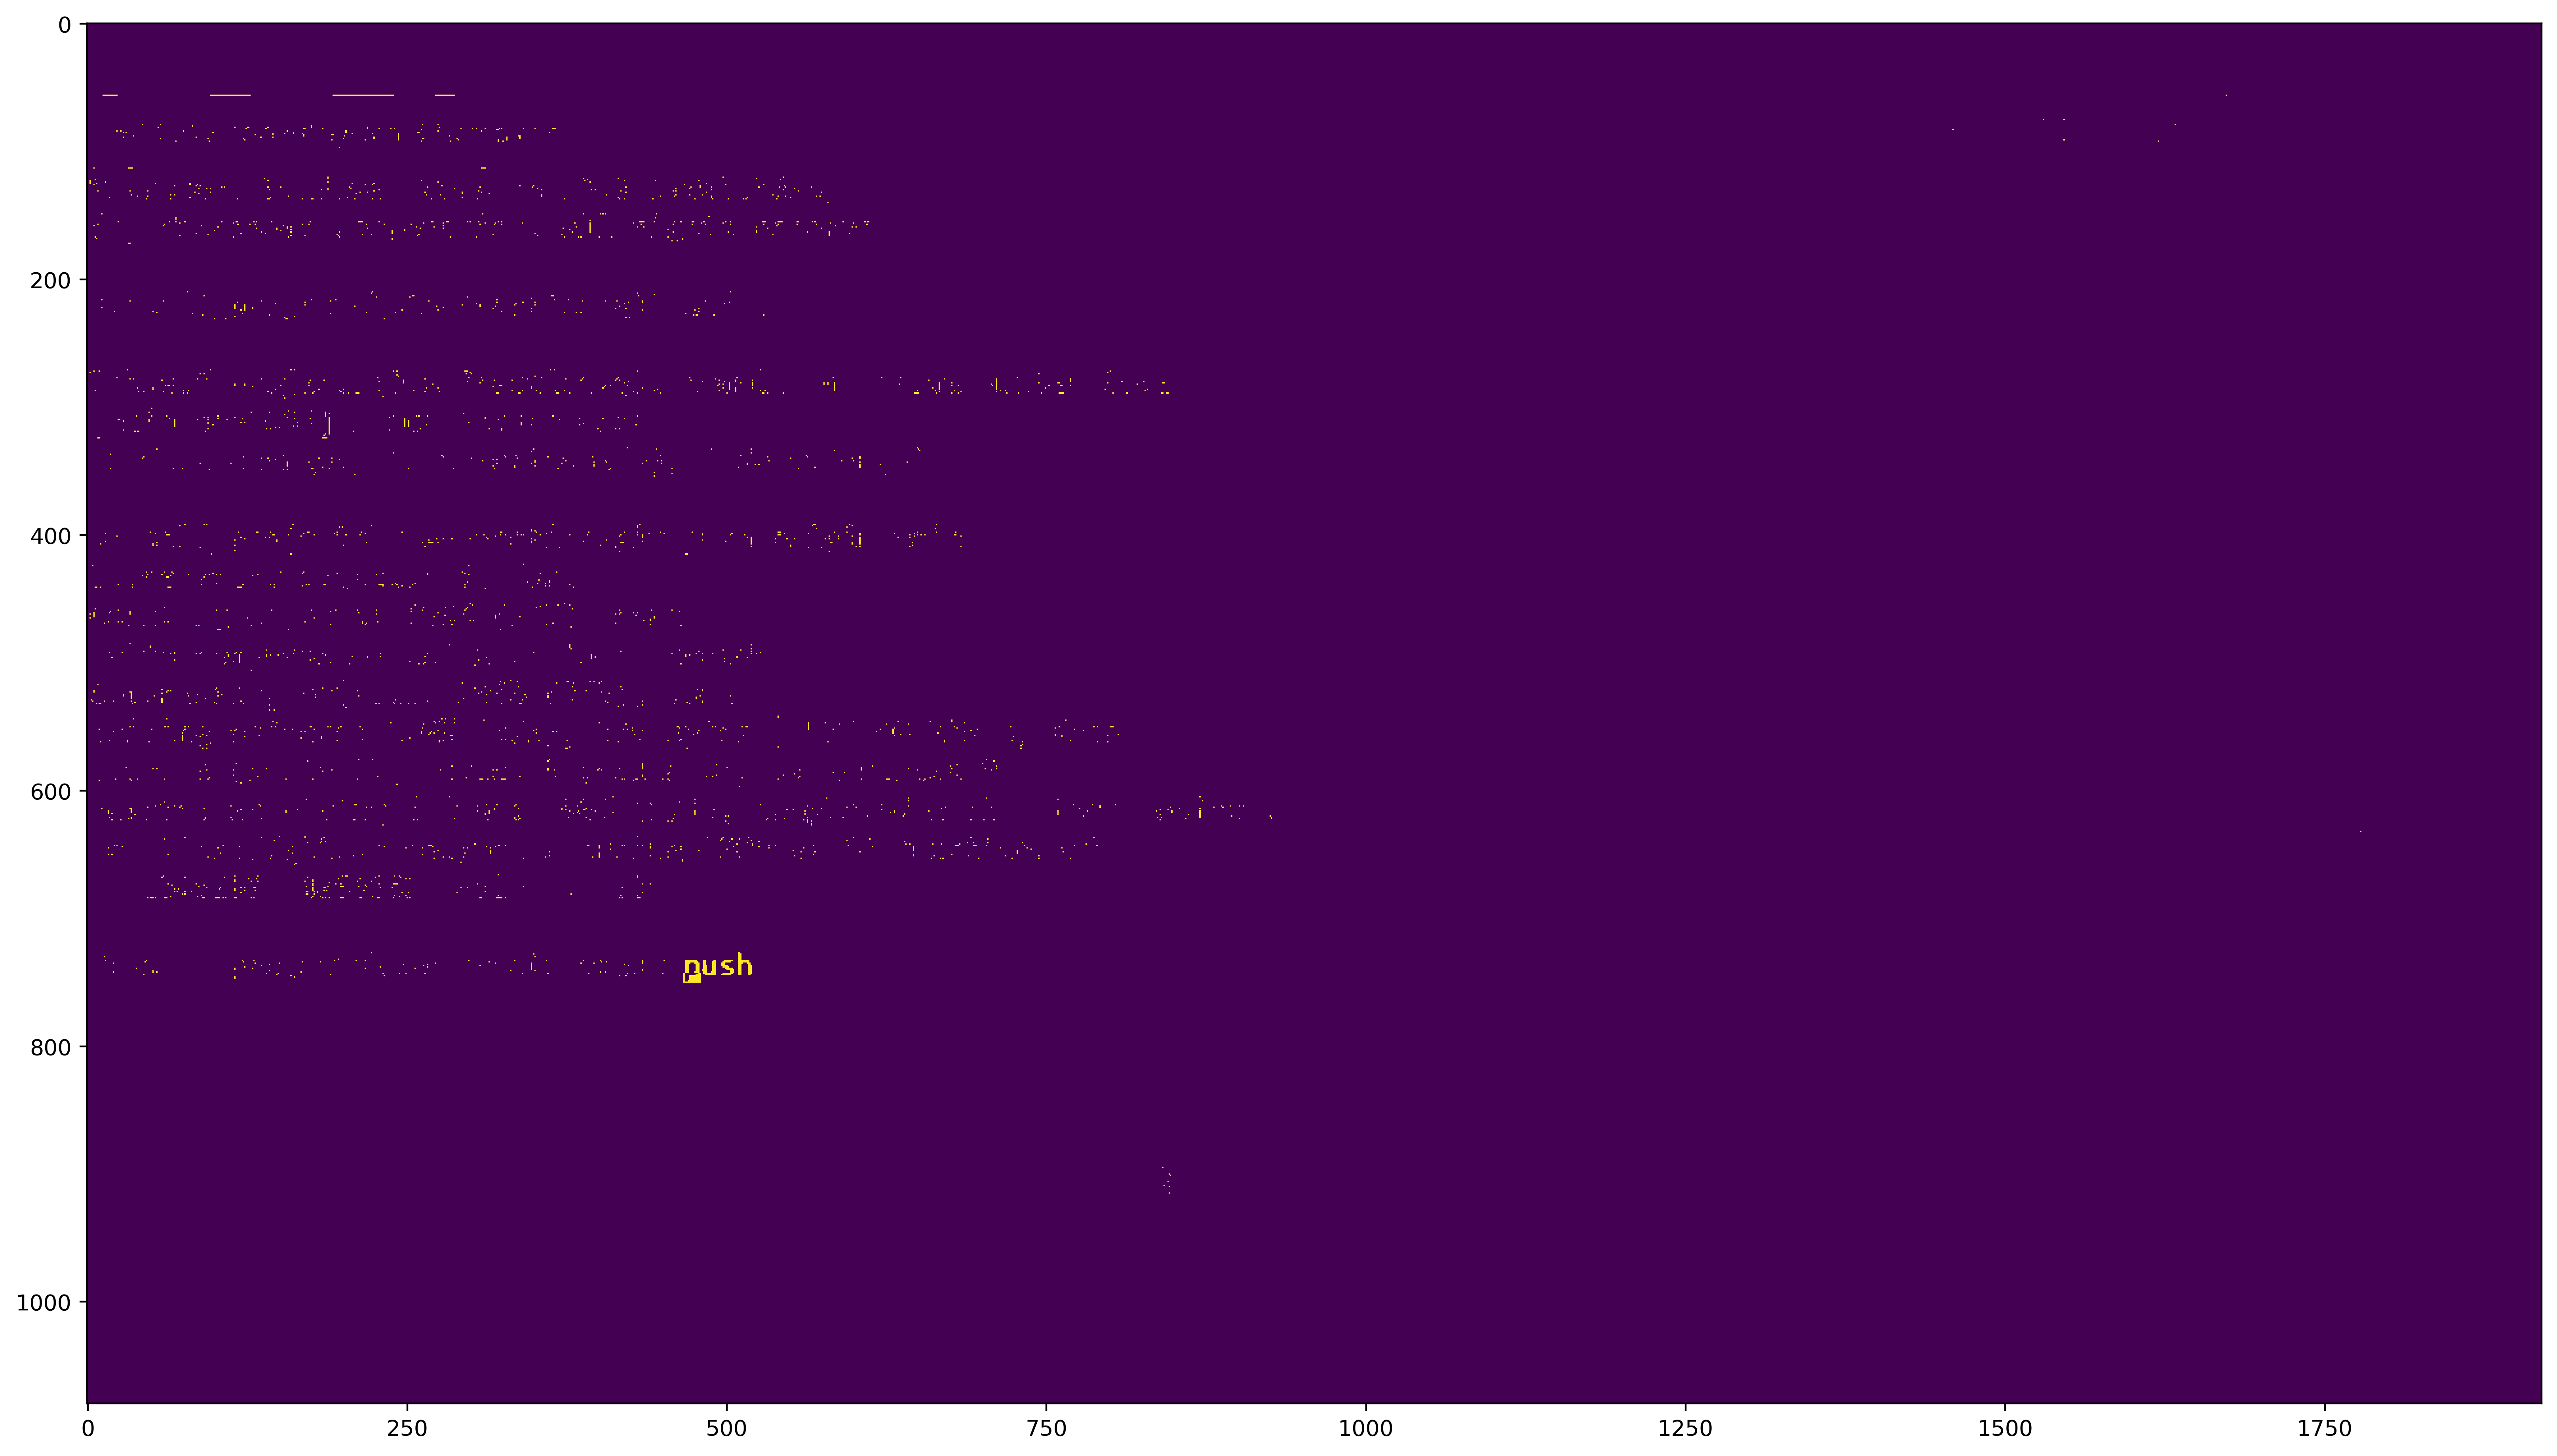

In [74]:
# current_frame = frame_list[3]
# current_image_path = os.path.join(image_frames,current_frame)
# img = cv2.imread(current_image_path)
# img.shape
# current_img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# (thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# im_bw = cv2.threshold(current_img_gray, 80, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(20,20),dpi=400)
plt.imshow(diff)
# cv2.imwrite('todelete.jpg',im_bw)

In [19]:
gray1.shape

(1080, 1920)